# Sieć tramwajów we Wrocławiu

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

In [57]:
trams = {
    1: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Piastowska", "Prusa", "Wyszyńskiego", "Nowowiejska", "Słowiańska", "Dworzec Nadodrze", "Trzebnicka", "Broniewskiego", "Kamieńskiego", "Kępińska", "Wołowska", "Poświętne"],
    2: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Reja", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Pułaskiego", "Dworzec Główny", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    3: ["Księże Małe", "Głubczycka", "Karwińska", "Park Wschodni", "Armii Krajowej", "Krakowska (Centrum Handlowe)", "Krakowska", "Na Niskich Łąkach", "Pl. Zgody (Muzeum Etnograficzne)", "Pl. Wróblewskiego", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    4: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Hutmen", "Bzowa (Centrum Historii Zajezdnia)", "Pl. Srebrny", "Stalowa", "Pereca", "Grabiszyńska", "Kolejowa", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Główny", "Pułaskiego", "Kościuszki", "Komuny Paryskiej", "Pl. Wróblewskiego", "Urząd Wojewódzki (Impart)", "Most Grunwaldzki", "Pl. Grunwaldzki", "Kliniki - Politechnika Wrocławska", "Hala Stulecia", "Zoo", "Tramwajowa", "Chełmońskiego", "Piramowicza (Kampus Biskupin)", "Spółdzielcza", "Biskupin"],
    5: ["Księże Małe", "Głubczycka", "Karwińska", "Park Wschodni", "Armii Krajowej", "Krakowska (Centrum Handlowe)", "Krakowska", "Na Niskich Łąkach", "Pl. Zgody (Muzeum Etnograficzne)", "Pl. Wróblewskiego", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Narodowe Forum Muzyki", "Pl. Legionów", "Kolejowa", "Grabiszyńska", "Pereca", "Stalowa", "Pl. Srebrny", "Bzowa (Centrum Historii Zajezdnia)", "Hutmen", "FAT", "Fiołkowa", "Grabiszyńska (Cmentarz)"],
    6: ["Kromera", "Mosty Warszawskie", "Daszyńskiego", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Dubois", "Uniwersytet Wrocławski", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    7: ["Poświętne", "Wołowska", "Kępińska", "Kamieńskiego", "Broniewskiego", "Trzebnicka", "Dworzec Nadodrze", "Paulińska", "Dubois", "Uniwersytet Wrocławski", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki", "Radio I Telewizja", "Przyjaźni", "Braterska", "Sąsiedzka", "Klecina"],
    8: ["Karłowice", "Trzebnicka", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Hala Targowa", "Uniwersytet Wrocławski", "Rynek", "Zamkowa", "Świdnicka", "Park Staromiejski", "Bastion Sakwowy", "Dworzec Główny (Mdk)", "Dworzec Główny", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    9: ["Park Południowy", "Pułtuska", "Weigla (Szpital)", "Jaworowa", "Wiśniowa", "Uniwersytet Ekonomiczny", "Sanocka", "Dworzec Autobusowy", "Dworzec Główny", "Pułaskiego", "Kościuszki", "Komuny Paryskiej", "Pl. Wróblewskiego", "Urząd Wojewódzki (Muzeum Narodowe)", "Katedra", "Ogród Botaniczny", "Górnickiego", "Piastowska", "Grunwaldzka", "Kochanowskiego", "Chopina", "Karłowicza", "Stadion Olimpijski", "8 Maja", "Godebskiego (Awf Wrocław)", "Sępolno"],
    10: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Reja", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    11: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Hutmen", "Bzowa (Centrum Historii Zajezdnia)", "Pl. Srebrny", "Stalowa", "Pereca", "Grabiszyńska", "Kolejowa", "Pl. Legionów", "Narodowe Forum Muzyki", "Zamkowa", "Świdnicka", "Galeria Dominikańska", "Pl. Nowy Targ", "Hala Targowa", "Pl. Bema", "Na Szańcach", "Jedności Narodowej", "Nowowiejska", "Daszyńskiego", "Mosty Warszawskie", "Kromera"],
    12: ["Sępolno", "Godebskiego (Awf Wrocław)", "8 Maja", "Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Bujwida", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "Kolista", "Pilczycka (Anima)", "Modra", "Górnicza"],
    13: ["Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Bujwida", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Dolmed", "Śrubowa", "Wrocławski Park Przemysłowy", "Park Biznesu", "Babimojska", "Strzegomska 148", "Nowodworska", "Strzegomska (Krzyżówka)", "Rogowska (P+R)", "Rogowska (Ogrody Działkowe)", "Budziszyńska", "Zemska", "Park Tysiąclecia", "Wrocław Nowy Dwór (P+R)"],
    14: ["Osobowice", "Most Milenijny", "Osobowicka (Cmentarz)", "Osobowicka (Cmentarz II)", "Serbska (C.K. Agora)", "Most Osobowicki", "Kleczkowska", "Pl. Staszica", "Pomorska", "Kępa Mieszczańska", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Kolejowa", "Grabiszyńska", "Pereca", "Stalowa", "Pl. Srebrny", "Bzowa (Centrum Historii Zajezdnia)", "Hutmen", "FAT", "Aleja Pracy", "Ojca Beyzyma", "Mielecka", "Gajowicka", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    15: ["Poświętne", "Wołowska", "Kępińska", "Kamieńskiego", "Bałtycka", "Kleczkowska", "Pl. Staszica", "Pomorska", "Kępa Mieszczańska", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Autobusowy", "Sanocka", "Uniwersytet Ekonomiczny", "Wiśniowa", "Jaworowa", "Weigla (Szpital)", "Pułtuska", "Park Południowy"],
    16: ["Osobowice", "Most Milenijny", "Osobowicka (Cmentarz)", "Osobowicka (Cmentarz II)", "Serbska (C.K. Agora)", "Most Osobowicki", "Kleczkowska", "Pl. Staszica", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Wyszyńskiego", "Prusa", "Piastowska", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Hubska (Dawida)", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    17: ["Sępolno", "Godebskiego (Awf Wrocław)", "8 Maja", "Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Grunwaldzka", "Piastowska", "Górnickiego", "Ogród Botaniczny", "Pl. Bema", "Hala Targowa", "Pl. Nowy Targ", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki", "Radio I Telewizja", "Przyjaźni", "Braterska", "Sąsiedzka", "Klecina"],
    18: ["Tarczyński Arena (Królewiecka)", "Dworska", "Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Mosty Pomorskie", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Opera", "Park Staromiejski", "Bastion Sakwowy", "Dworzec Główny (Mdk)", "Dworzec Główny", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Krynicka", "Morwowa", "Świeradowska", "Gaj"],
    19: ["Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Dubois", "Pl. Bema", "Ogród Botaniczny", "Górnickiego", "Piastowska", "Pl. Grunwaldzki", "Kliniki - Politechnika Wrocławska", "Hala Stulecia", "Zoo"],
    20: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Aleja Pracy", "Ojca Beyzyma", "Mielecka", "Gajowicka", "Hallera", "Sztabowa", "Rondo", "Wielka", "Zaolziańska", "Arkady (Capitol)", "Renoma", "Pl. Orląt Lwowskich", "Dworzec Świebodzki", "Smolecka", "Śrubowa", "Dolmed", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    21: ["Tarczyński Arena (Królewiecka)", "Dworska", "Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Kwiska", "Małopanewska", "Niedźwiedzia", "Wrocław Mikołajów (Zachodnia)", "Pl. Strzegomski (Muzeum Współczesne)", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Krynicka", "Morwowa", "Świeradowska", "Gaj"],
    22: ["Pilczyce", "Metalowców", "Bajana", "Park Zachodni", "DH Astra", "Kwiska", "Małopanewska", "Niedźwiedzia", "Wrocław Mikołajów (Zachodnia)", "Pl. Strzegomski (Muzeum Współczesne)", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Główny", "Pułaskiego", "Hubska (Dawida)", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    23: ["Kowale", "Bociania", "Gęsia", "Kwidzyńska", "Kętrzyńska", "Kromera", "Mosty Warszawskie", "Daszyńskiego", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Ogród Botaniczny", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Pułaskiego", "Dworzec Główny", "Arkady (Capitol)", "Pl. Legionów", "Pl. Orląt Lwowskich", "Dworzec Świebodzki", "Smolecka", "Śrubowa", "Wrocławski Park Przemysłowy", "Park Biznesu", "Babimojska", "Strzegomska 148", "Nowodworska", "Strzegomska (Krzyżówka)", "Rogowska (P+R)", "Rogowska (Ogrody Działkowe)", "Budziszyńska", "Zemska", "Park Tysiąclecia", "Wrocław Nowy Dwór (P+R)"],
    24: ["Pilczyce", "Metalowców", "Bajana", "Park Zachodni", "DH Astra", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Pl. Staszica", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Daszyńskiego", "Mosty Warszawskie", "Kromera", "Kętrzyńska", "Kwidzyńska", "Gęsia", "Bociania", "Kowale"]
}

**Linie tymczasowe**: 2, 5, 8, 9, 17, 18, 23

Obliczamy wagi krawędzi

In [58]:
edge_weights = defaultdict(int)

for line, stops in trams.items():
    for i in range(len(stops) - 1):
        a, b = stops[i], stops[i+1]
        edge = tuple(sorted((a, b)))
        edge_weights[edge] += 1

In [59]:
G = nx.Graph()

for (a, b), weight in edge_weights.items():
    G.add_edge(a, b, weight=weight)

print(f"Liczba przystanków: {G.number_of_nodes()}")
print(f"Liczba połączeń: {G.number_of_edges()}")

Liczba przystanków: 197
Liczba połączeń: 225


In [60]:
print(G.nodes())

['Biskupin', 'Spółdzielcza', 'Piramowicza (Kampus Biskupin)', 'Chełmońskiego', 'Tramwajowa', 'Zoo', 'Hala Stulecia', 'Kliniki - Politechnika Wrocławska', 'Pl. Grunwaldzki', 'Piastowska', 'Prusa', 'Wyszyńskiego', 'Nowowiejska', 'Słowiańska', 'Dworzec Nadodrze', 'Trzebnicka', 'Broniewskiego', 'Kamieńskiego', 'Kępińska', 'Wołowska', 'Poświętne', 'Reja', 'Katedra', 'Urząd Wojewódzki (Muzeum Narodowe)', 'Pl. Wróblewskiego', 'Komuny Paryskiej', 'Kościuszki', 'Pułaskiego', 'Dworzec Główny', 'Arkady (Capitol)', 'Zaolziańska', 'Wielka', 'Rondo', 'Sztabowa', 'Hallera', 'Jastrzębia', 'Orla', 'Krzyki', 'Głubczycka', 'Księże Małe', 'Karwińska', 'Park Wschodni', 'Armii Krajowej', 'Krakowska (Centrum Handlowe)', 'Krakowska', 'Na Niskich Łąkach', 'Pl. Zgody (Muzeum Etnograficzne)', 'Galeria Dominikańska', 'Świdnicka', 'Zamkowa', 'Rynek', 'Pl. Jana Pawła II', 'Młodych Techników Akademia Sztuk Teatralnych', 'Pl. Strzegomski (Muzeum Współczesne)', 'Wrocław Mikołajów (Zachodnia)', 'Niedźwiedzia', 'Małopan

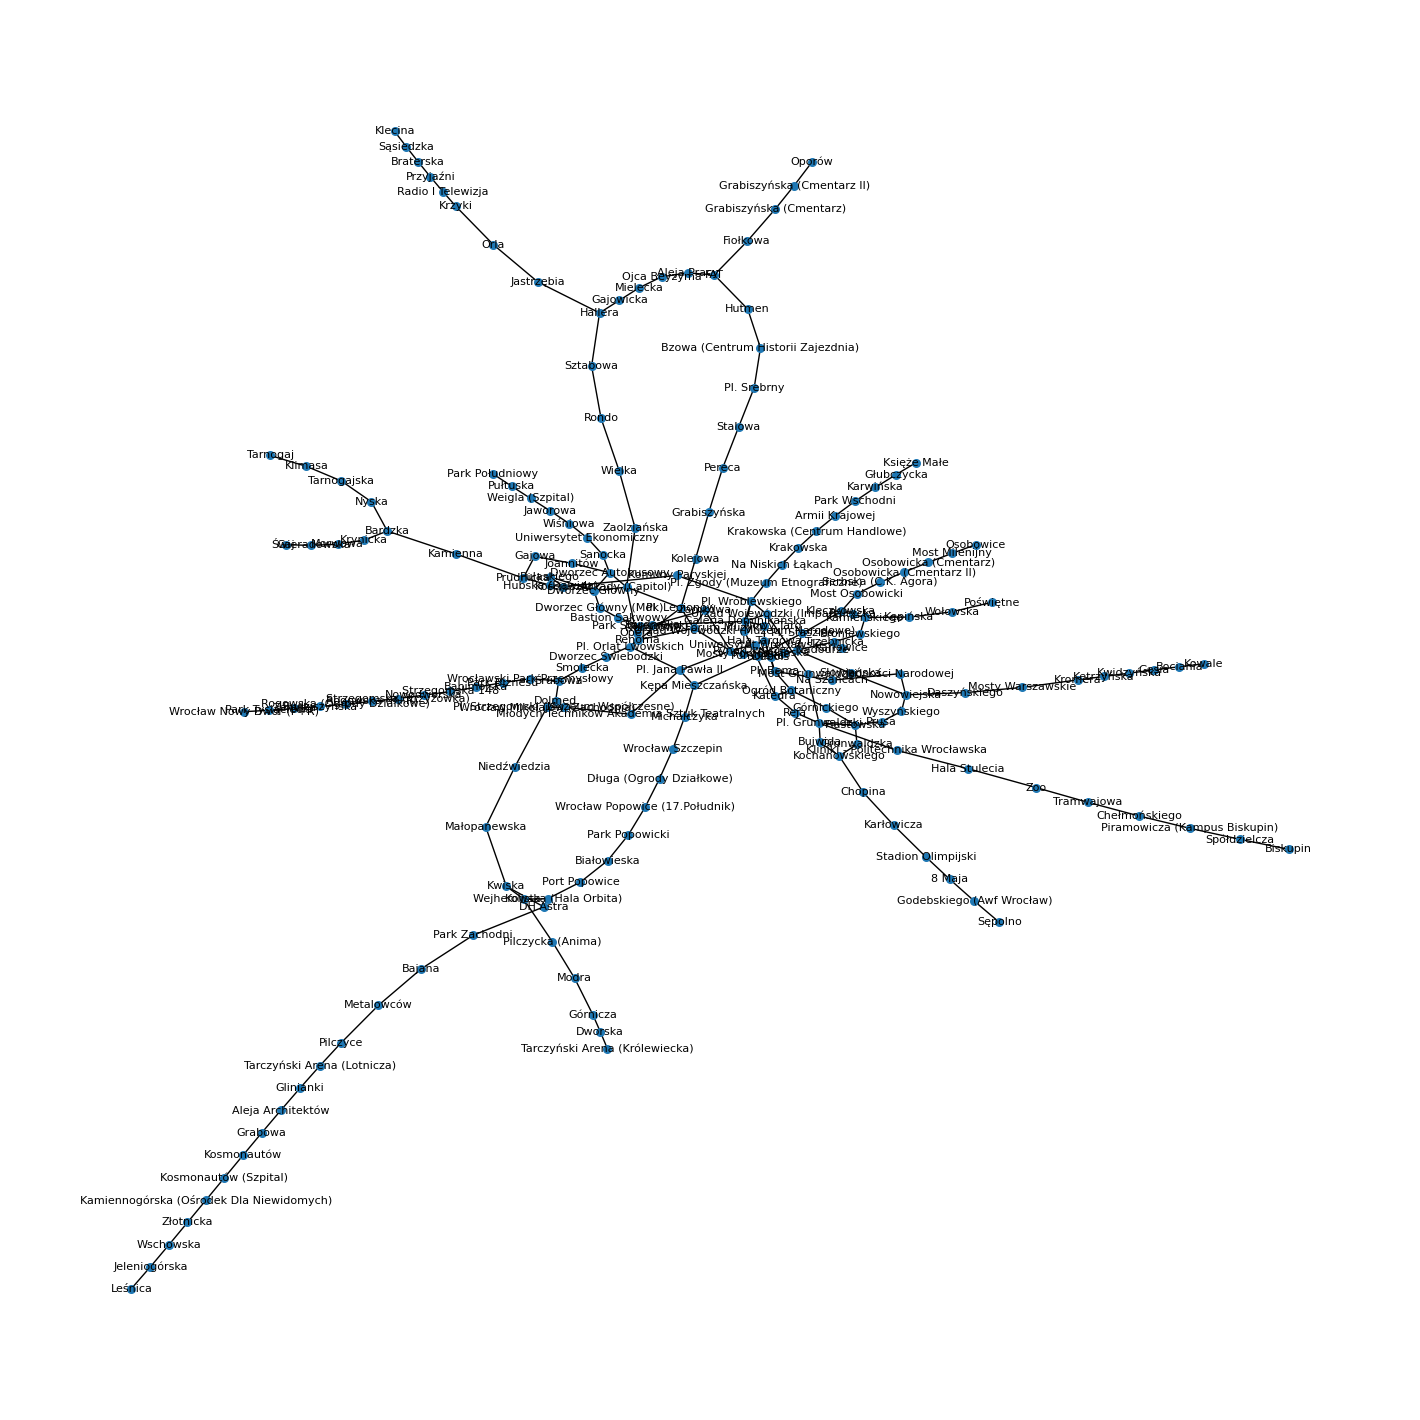

In [61]:
plt.figure(figsize=(14, 14))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=30, font_size=8)

plt.show()

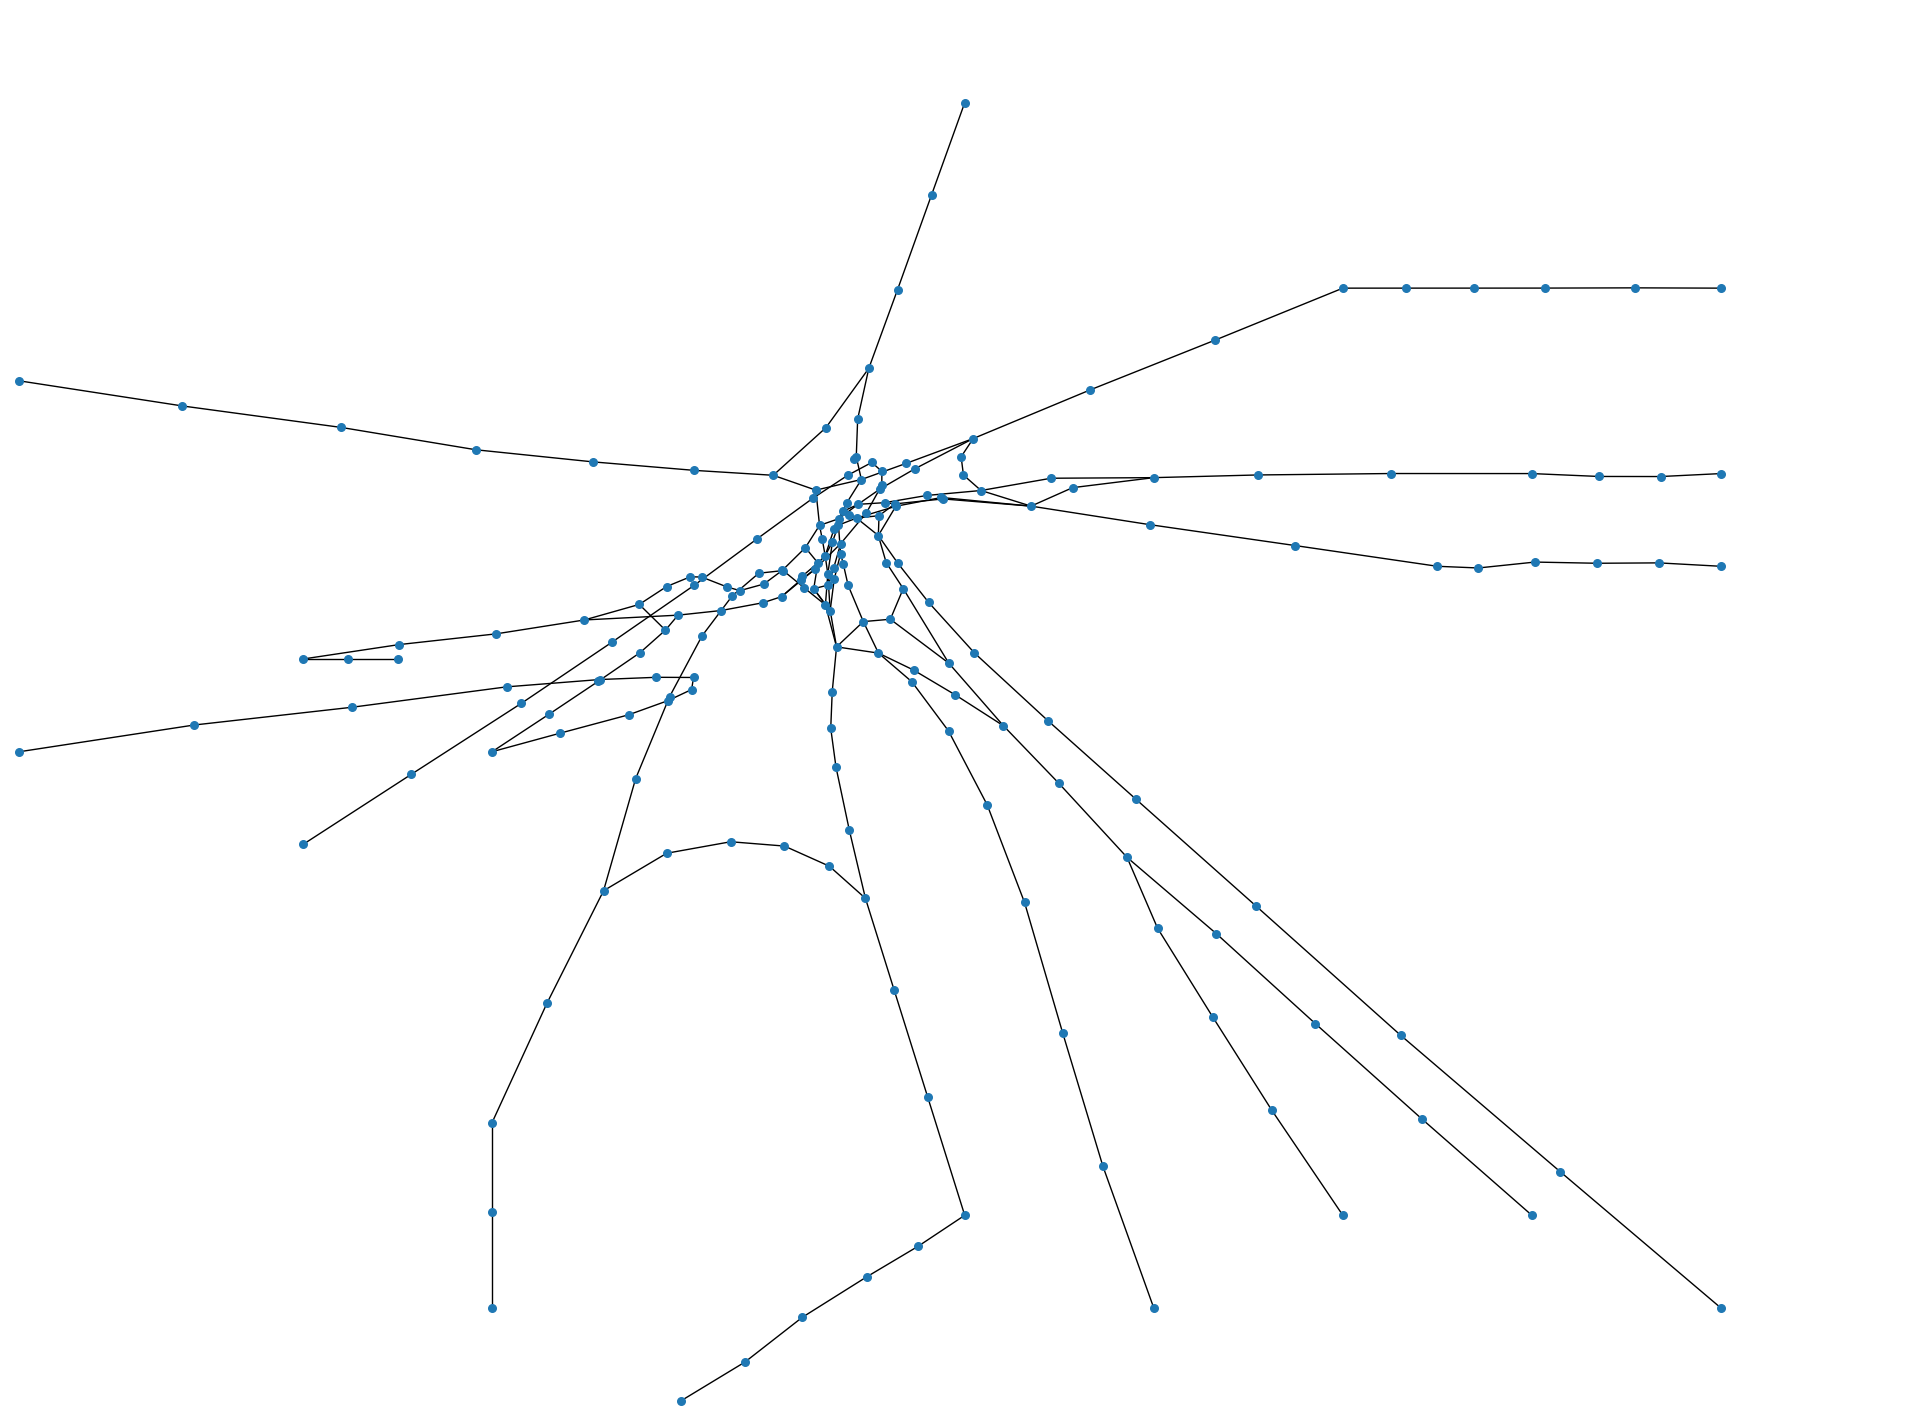

In [62]:
plt.figure(figsize=(19, 14))

fixed_positions = {'Poświętne': (100, 140), 'Kowale': (180, 120), 'Kromera': (140, 120), 'Sępolno': (180, 100), 'Stadion Olimpijski': (160, 100), 'Biskupin': (180, 90), 'Zoo': (150, 90), 'Księże Małe': (180, 10), 'Tarnogaj': (160, 20), 'Gaj': (140, 20), 'Park Południowy': (120, 10), 'Krzyki': (100, 20), 'Klecina': (70, 0), 'Oporów': (50, 10), 'Grabiszyńska (Cmentarz)': (50, 30), 'Wrocław Nowy Dwór (P+R)': (30, 60), 'Leśnica': (0, 70), 'Pilczyce': (50, 70), 'Tarczyński Arena (Królewiecka)': (40, 80), 'Górnicza': (30, 80), 'Dokerska': (30, 90), 'Osobowice': (0, 110)}

pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_positions.keys(), scale=5, k=0.001, )
nx.draw(G, pos, with_labels=False, node_size=30, font_size=8)
plt.xlim(-1, 200)  
plt.ylim(-1, 150)
plt.show()



# Teraz trzeba poprawić layout

# Analiza sieci

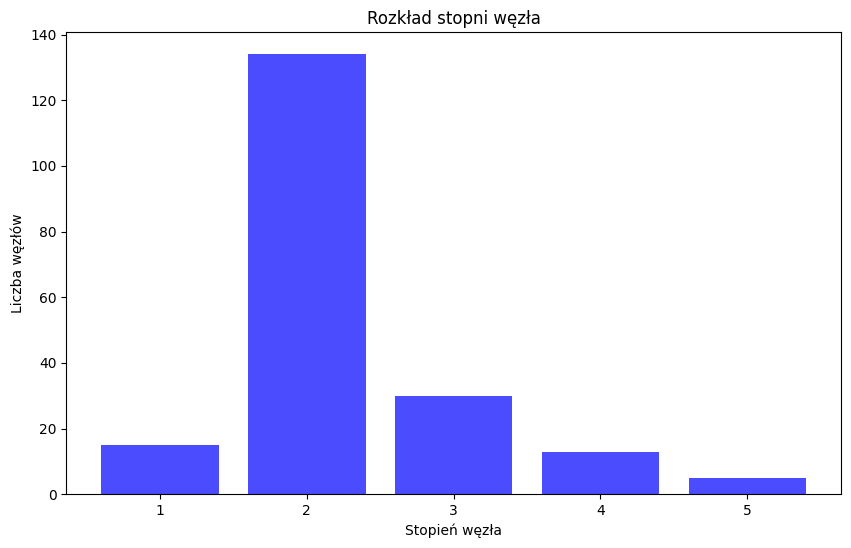

In [63]:
degrees = [deg for _, deg in G.degree()]
degree_counts = Counter(degrees)
plt.figure(figsize=(10, 6))
plt.bar(degree_counts.keys(), degree_counts.values(), color='blue', alpha=0.7)
plt.title("Rozkład stopni węzła")
plt.xlabel("Stopień węzła")
plt.ylabel("Liczba węzłów")
plt.show()


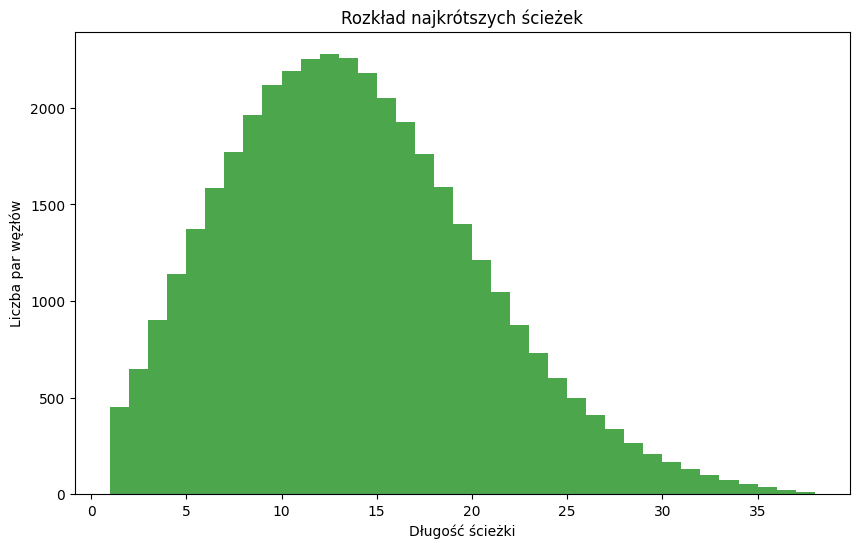

In [64]:
shortest_paths = dict(nx.shortest_path_length(G))
path_lengths = [length for target_dict in shortest_paths.values() for length in target_dict.values()]
plt.figure(figsize=(10, 6))
plt.hist(path_lengths, bins=range(1, max(path_lengths) + 1), color='green', alpha=0.7)
plt.title("Rozkład najkrótszych ścieżek")
plt.xlabel("Długość ścieżki")
plt.ylabel("Liczba par węzłów")
plt.show()

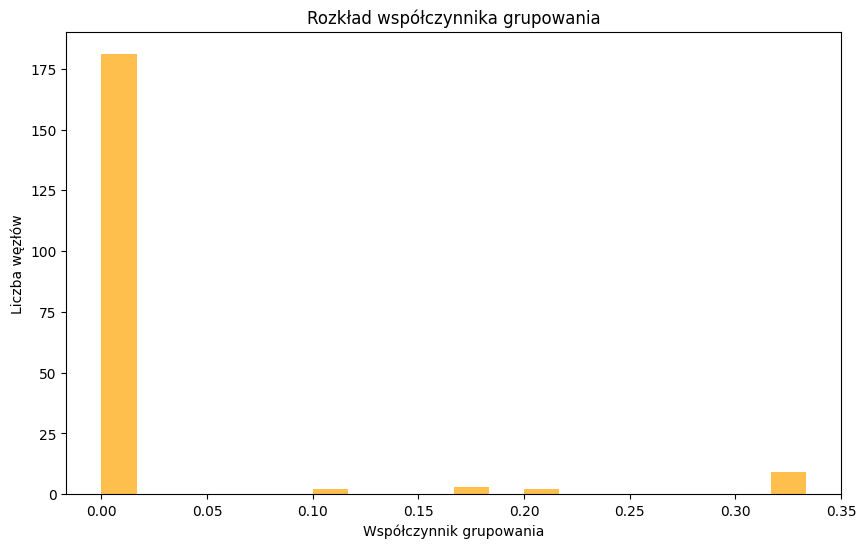

In [65]:
clustering_coeffs = nx.clustering(G)
plt.figure(figsize=(10, 6))
plt.hist(clustering_coeffs.values(), bins=20, color='orange', alpha=0.7)
plt.title("Rozkład współczynnika grupowania")
plt.xlabel("Współczynnik grupowania")
plt.ylabel("Liczba węzłów")
plt.show()

In [66]:
largest_component = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print(f"Średnica sieci: {diameter}")


Średnica sieci: 38


In [67]:
num_components = nx.number_connected_components(G)
print(f"Liczba komponentów: {num_components}")


Liczba komponentów: 1


In [68]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


In [69]:
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]


In [70]:
print("Top 5 węzłów według centralności stopnia:", top_degree)
print("Top 5 węzłów według centralności pośrednictwa:", top_betweenness)
print("Top 5 węzłów według centralności bliskości:", top_closeness)


Top 5 węzłów według centralności stopnia: [('Pl. Grunwaldzki', 0.02551020408163265), ('Pl. Wróblewskiego', 0.02551020408163265), ('Arkady (Capitol)', 0.02551020408163265), ('Galeria Dominikańska', 0.02551020408163265), ('Rynek', 0.02551020408163265)]
Top 5 węzłów według centralności pośrednictwa: [('Pl. Jana Pawła II', 0.3426174383788195), ('Arkady (Capitol)', 0.2847624837224522), ('Pl. Orląt Lwowskich', 0.24757653823587916), ('Młodych Techników Akademia Sztuk Teatralnych', 0.239606425320711), ('Pl. Strzegomski (Muzeum Współczesne)', 0.2339549339549339)]
Top 5 węzłów według centralności bliskości: [('Pl. Jana Pawła II', 0.12173913043478261), ('Rynek', 0.12166356300434512), ('Narodowe Forum Muzyki', 0.11995104039167687), ('Pl. Legionów', 0.1192214111922141), ('Pl. Orląt Lwowskich', 0.11871592973955179)]


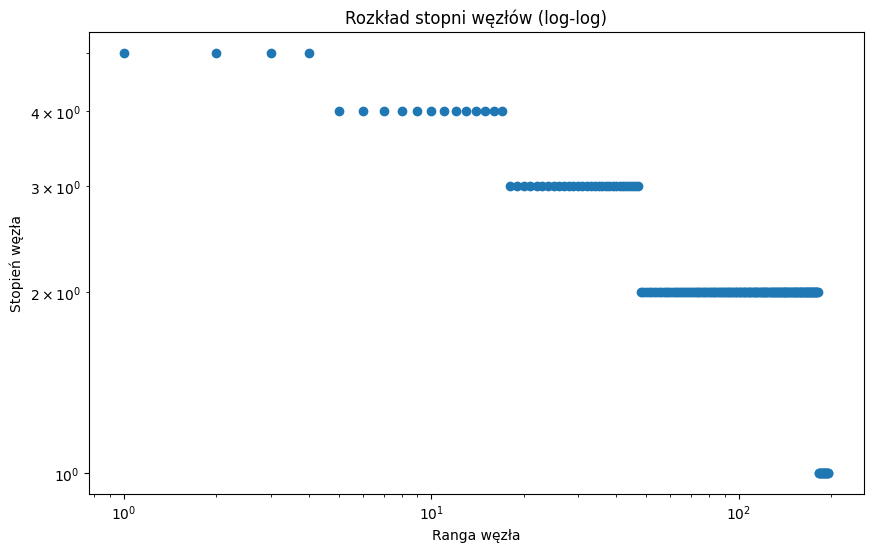

In [71]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(10, 6))
plt.loglog(degree_sequence, marker="o", linestyle="")
plt.title("Rozkład stopni węzłów (log-log)")
plt.xlabel("Ranga węzła")
plt.ylabel("Stopień węzła")
plt.show()

# Detekcja grup w sieci

In [72]:
from networkx.algorithms.community import louvain_communities, girvan_newman

# 1. Algorytm Louvaina
louvain_groups = louvain_communities(G)
print(f"Liczba grup (Louvain): {len(louvain_groups)}")
print("Wielkości grup (Louvain):", [len(group) for group in louvain_groups])


Liczba grup (Louvain): 15
Wielkości grup (Louvain): [20, 14, 13, 9, 12, 11, 16, 10, 7, 9, 6, 16, 22, 20, 12]


In [73]:
# 2. Algorytm Girvan-Newmana
gn_communities = next(girvan_newman(G)) 
gn_groups = [list(group) for group in gn_communities]
print(f"Liczba grup (Girvan-Newman): {len(gn_groups)}")
print("Wielkości grup (Girvan-Newman):", [len(group) for group in gn_groups])


Liczba grup (Girvan-Newman): 2
Wielkości grup (Girvan-Newman): [145, 52]


In [74]:
group_map = {node: idx for idx, group in enumerate(louvain_groups) for node in group}
inter_group_edges = [
    (u, v) for u, v in G.edges() if group_map[u] != group_map[v]
]
print(f"Liczba krawędzi między grupami (Louvain): {len(inter_group_edges)}")


Liczba krawędzi między grupami (Louvain): 35


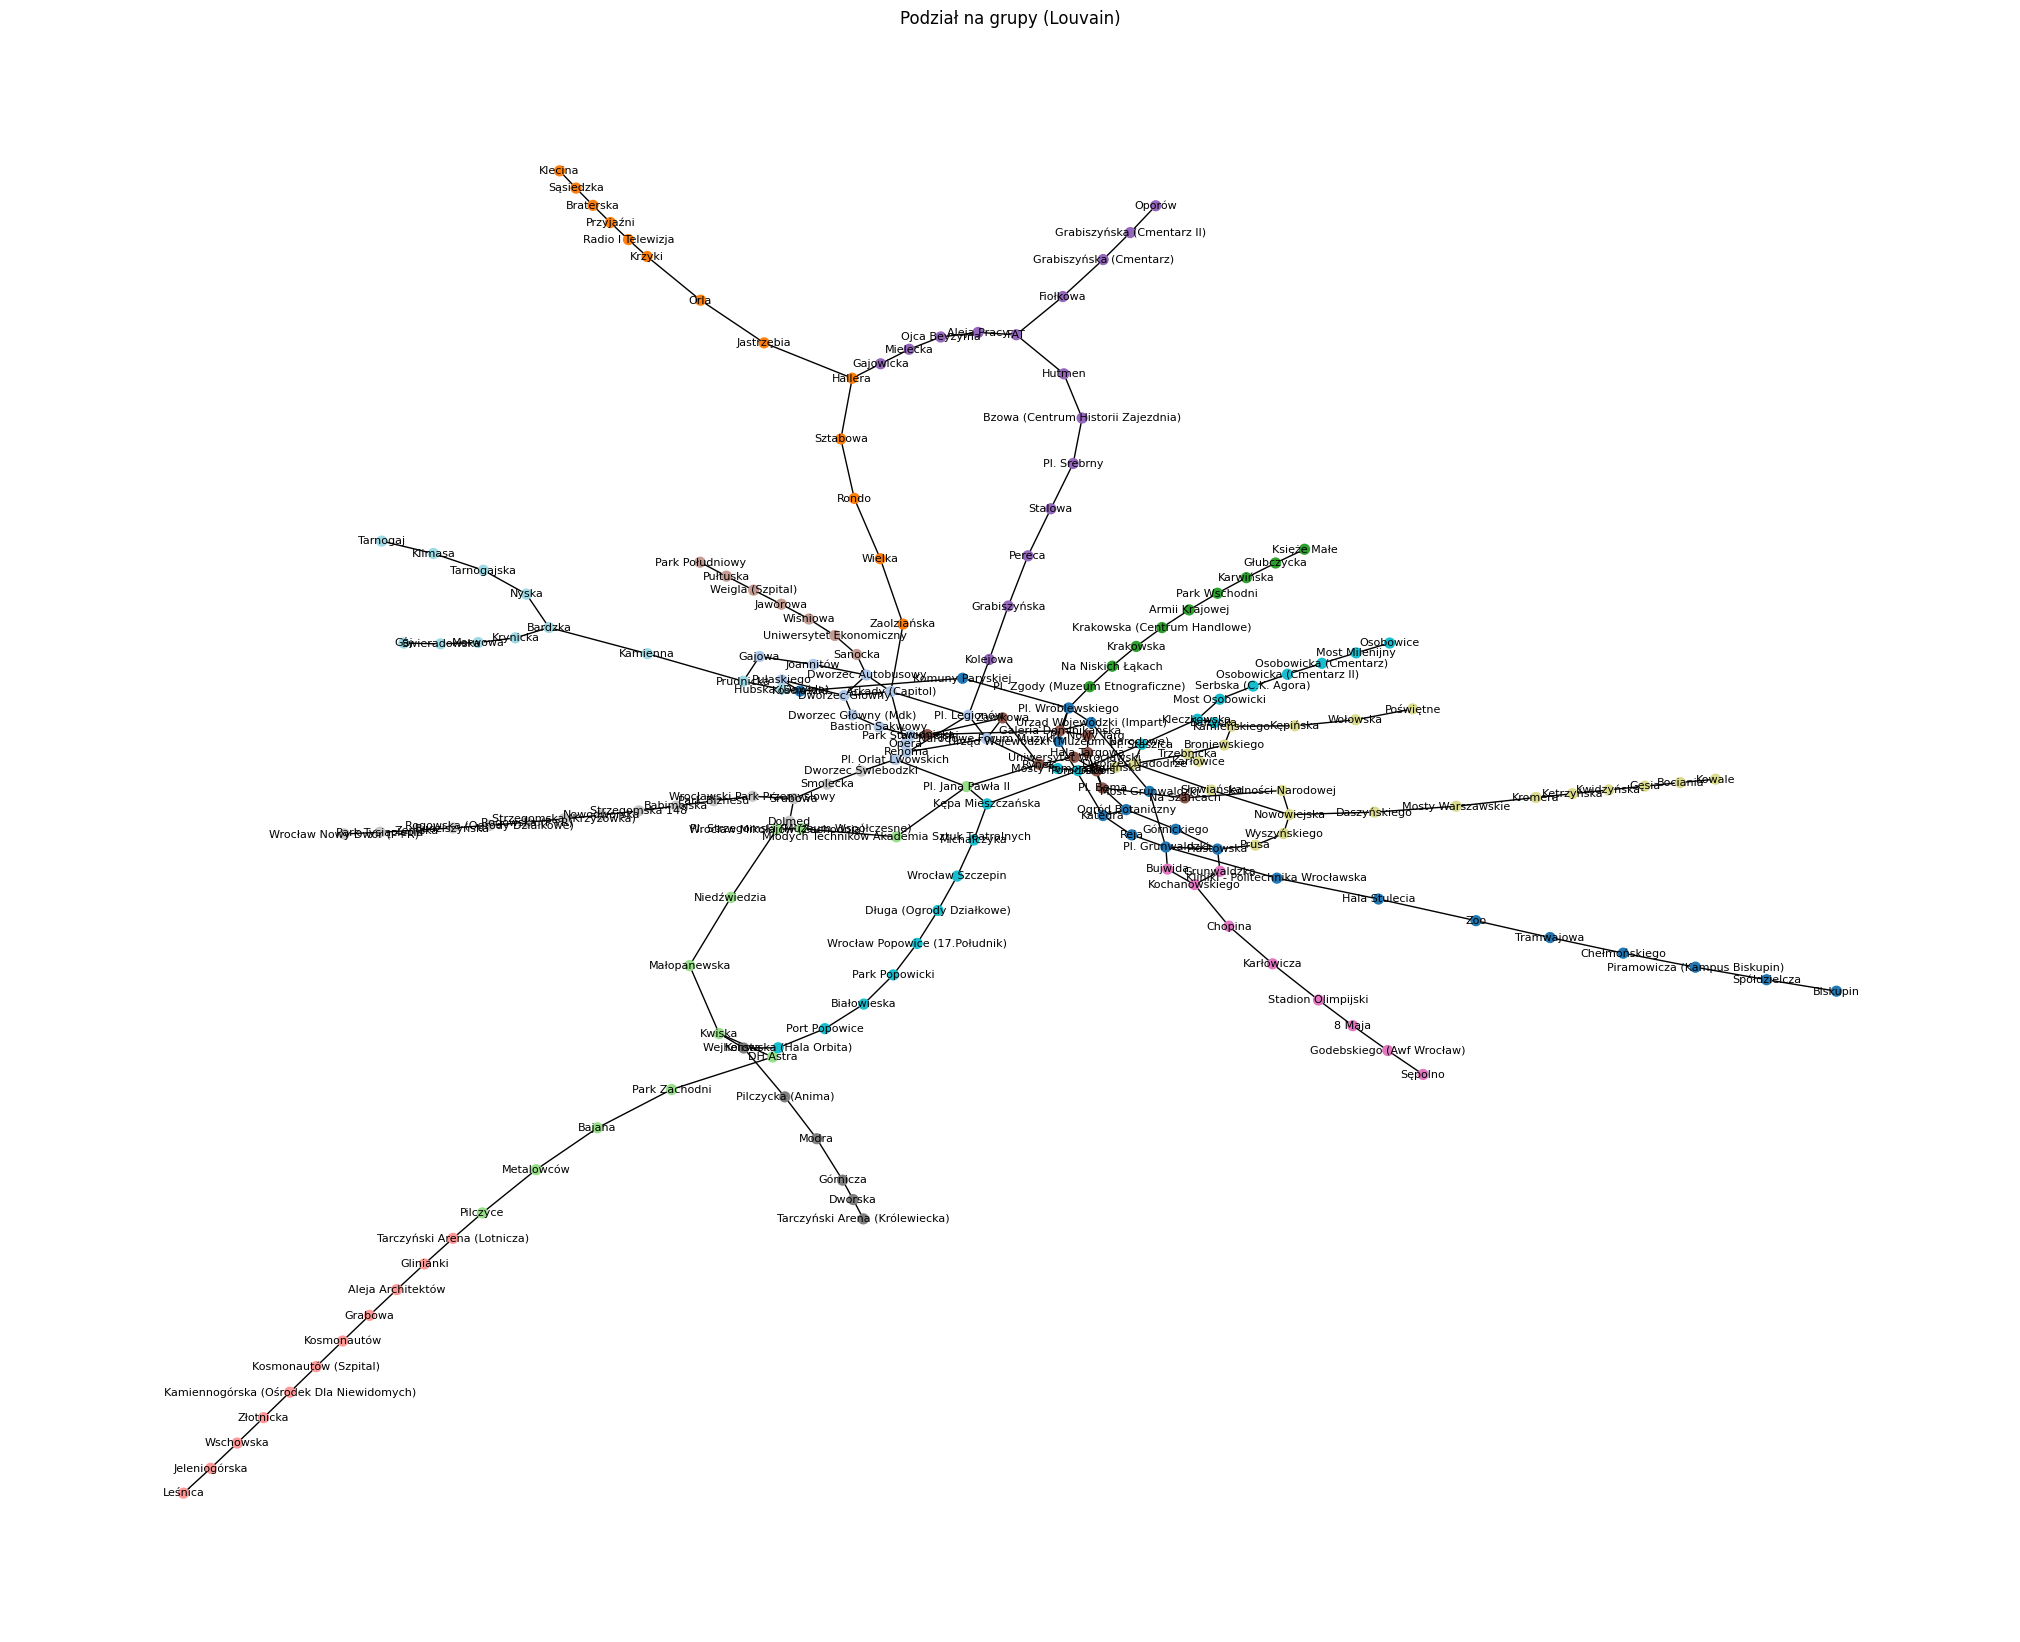

In [75]:
plt.figure(figsize=(20, 16))
pos = nx.kamada_kawai_layout(G, scale=4)
colors = [group_map[node] for node in G.nodes()]
nx.draw(
    G, pos, node_color=colors, with_labels=True, labels={node: node for node in G.nodes()},
    node_size=50, cmap=plt.cm.tab20, font_size=8,
)
plt.title("Podział na grupy (Louvain)")
plt.show()

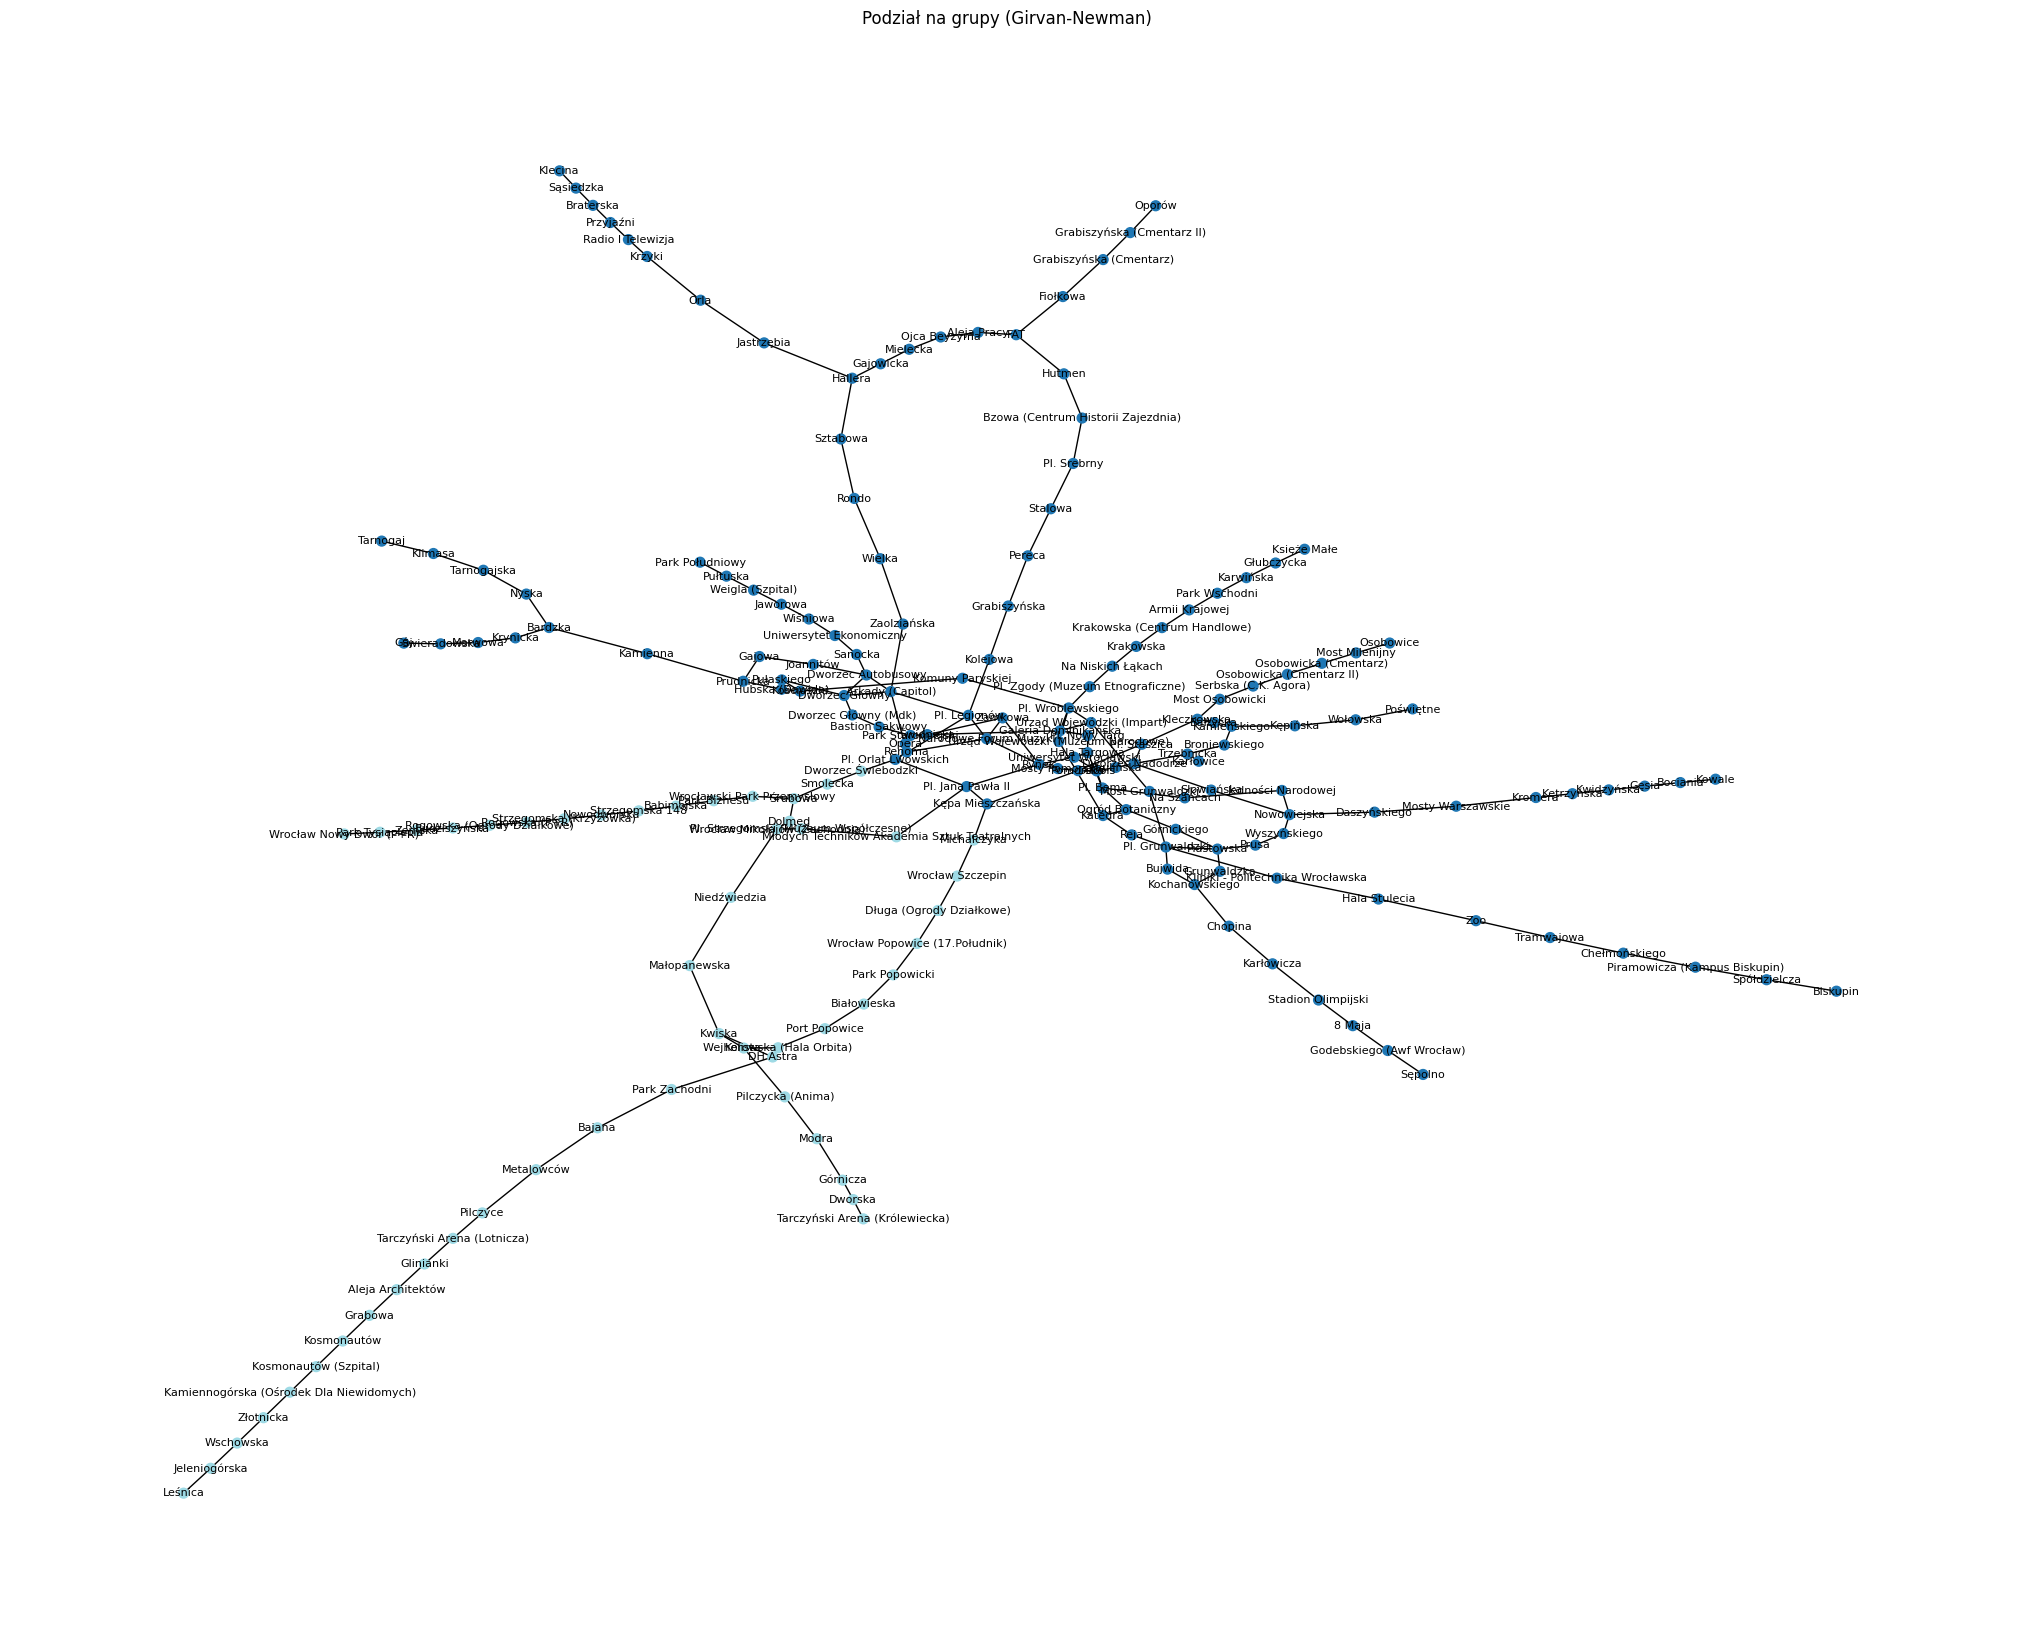

In [76]:
gn_group_map = {}
for idx, group in enumerate(gn_groups):
    for node in group:
        gn_group_map[node] = idx

plt.figure(figsize=(20, 16))
colors_gn = [gn_group_map[node] for node in G.nodes()]
nx.draw(
    G, pos, node_color=colors_gn, with_labels=True, labels={node: node for node in G.nodes()},
    node_size=50, cmap=plt.cm.tab20, font_size=8
)
plt.title("Podział na grupy (Girvan-Newman) ")
plt.show()

# Analiza wizualna sieci

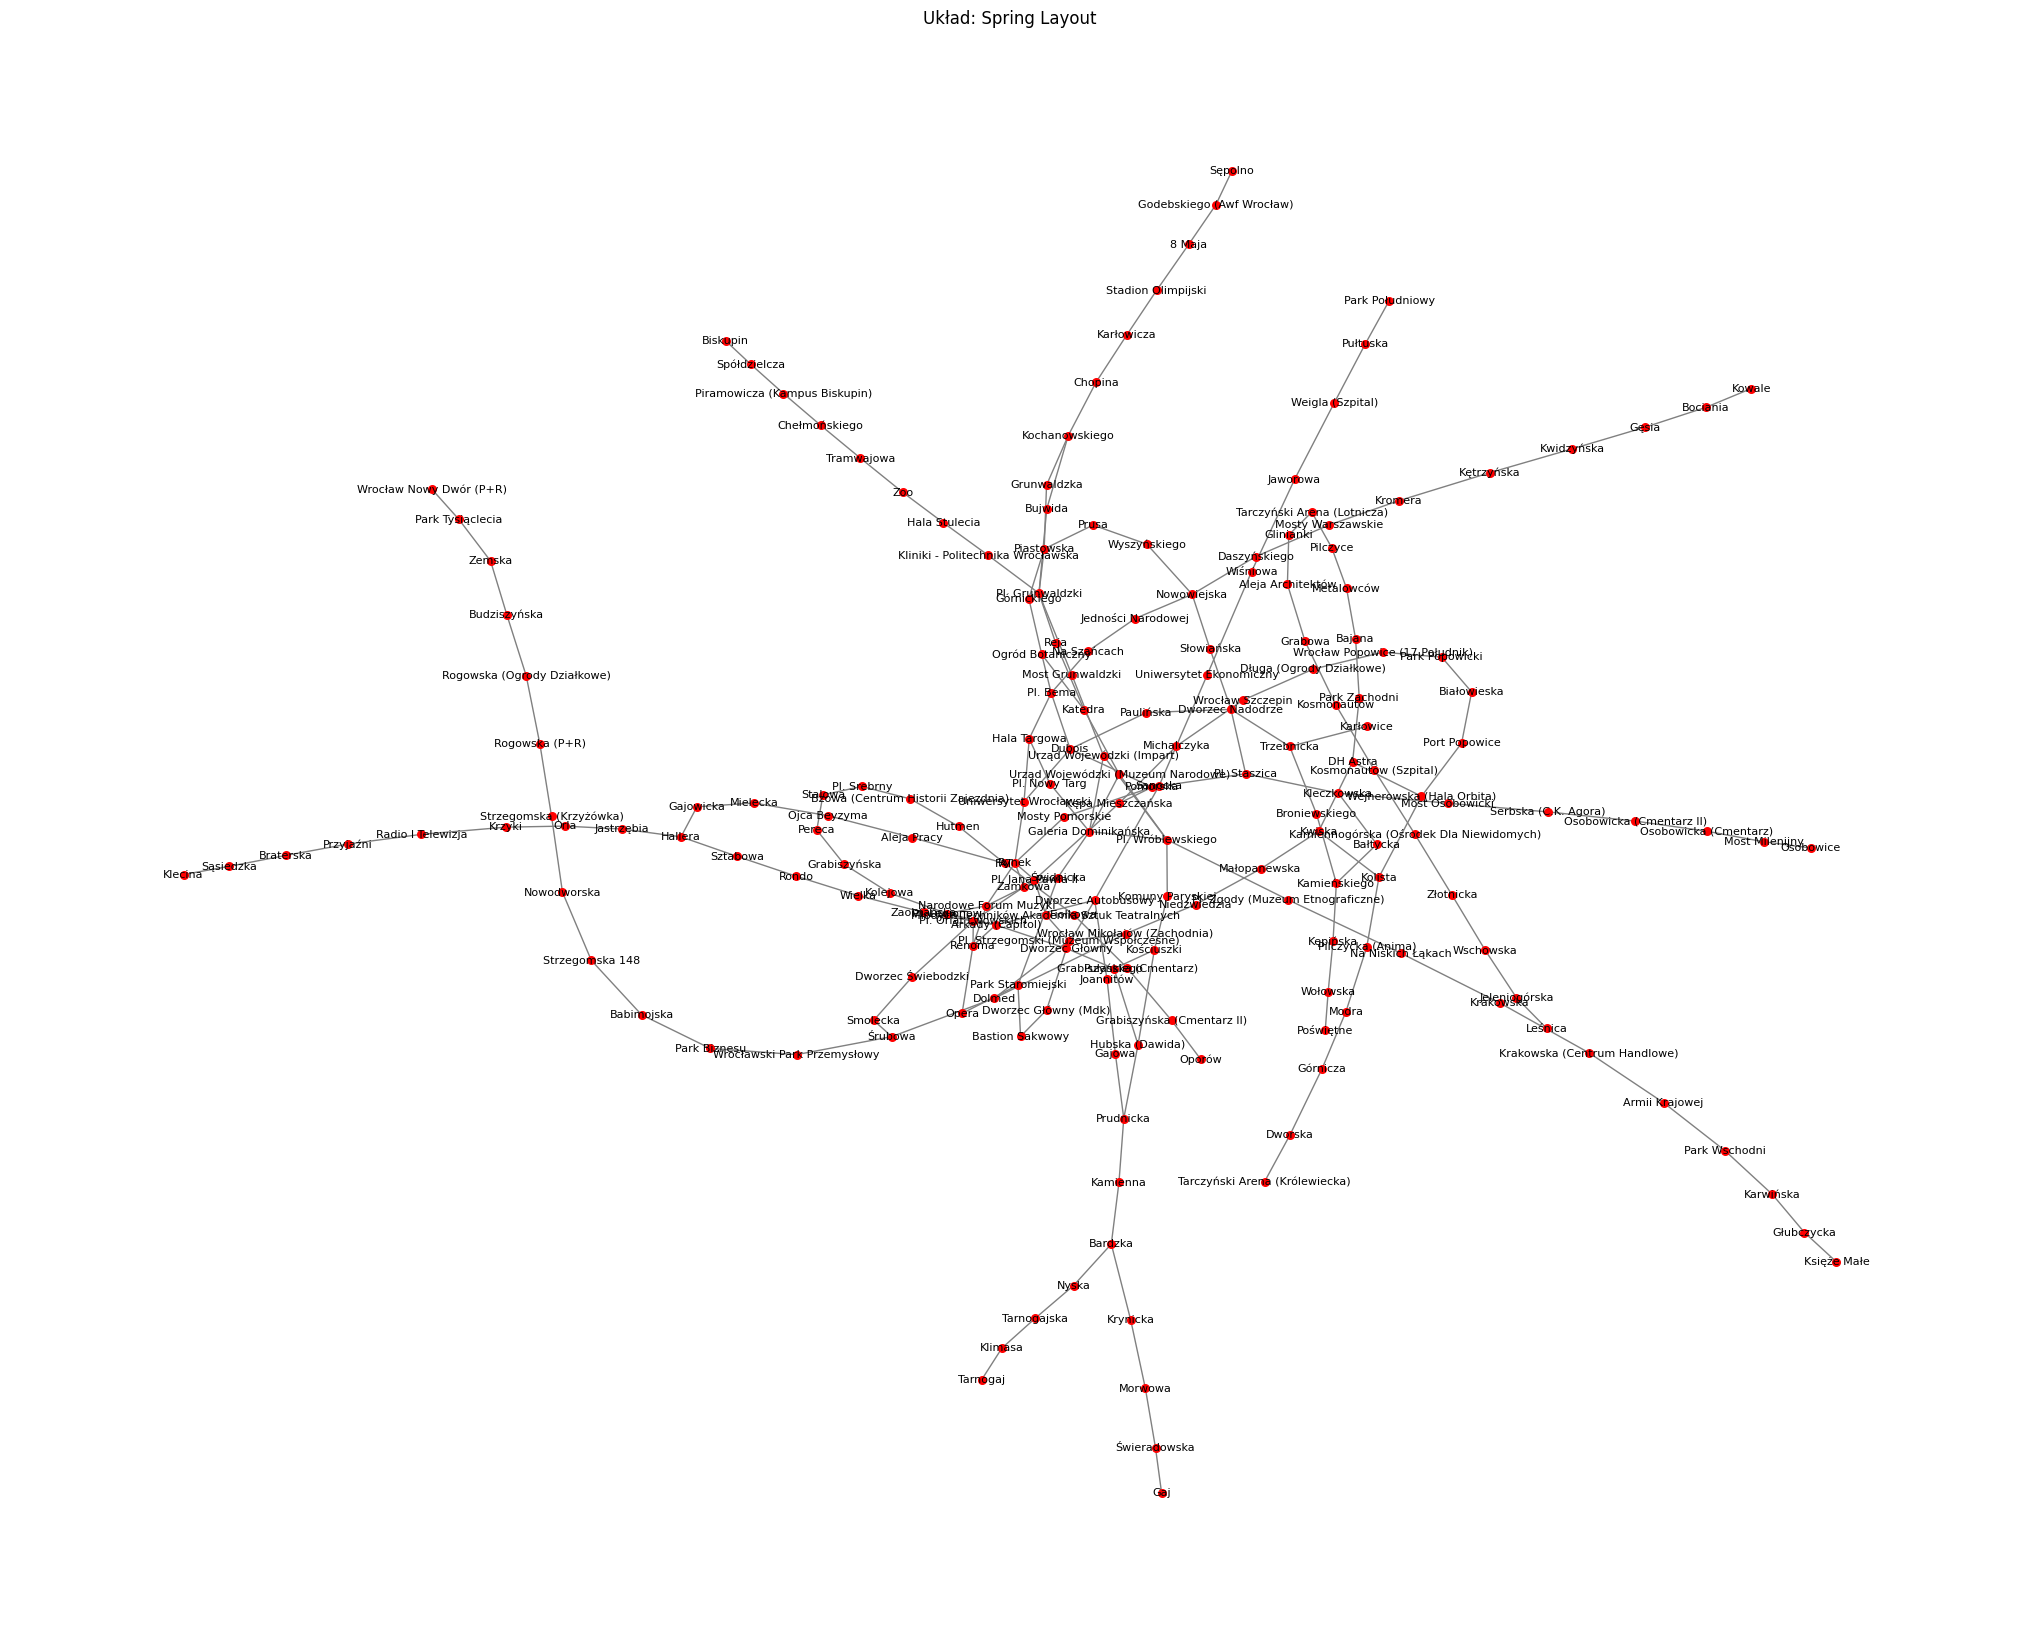

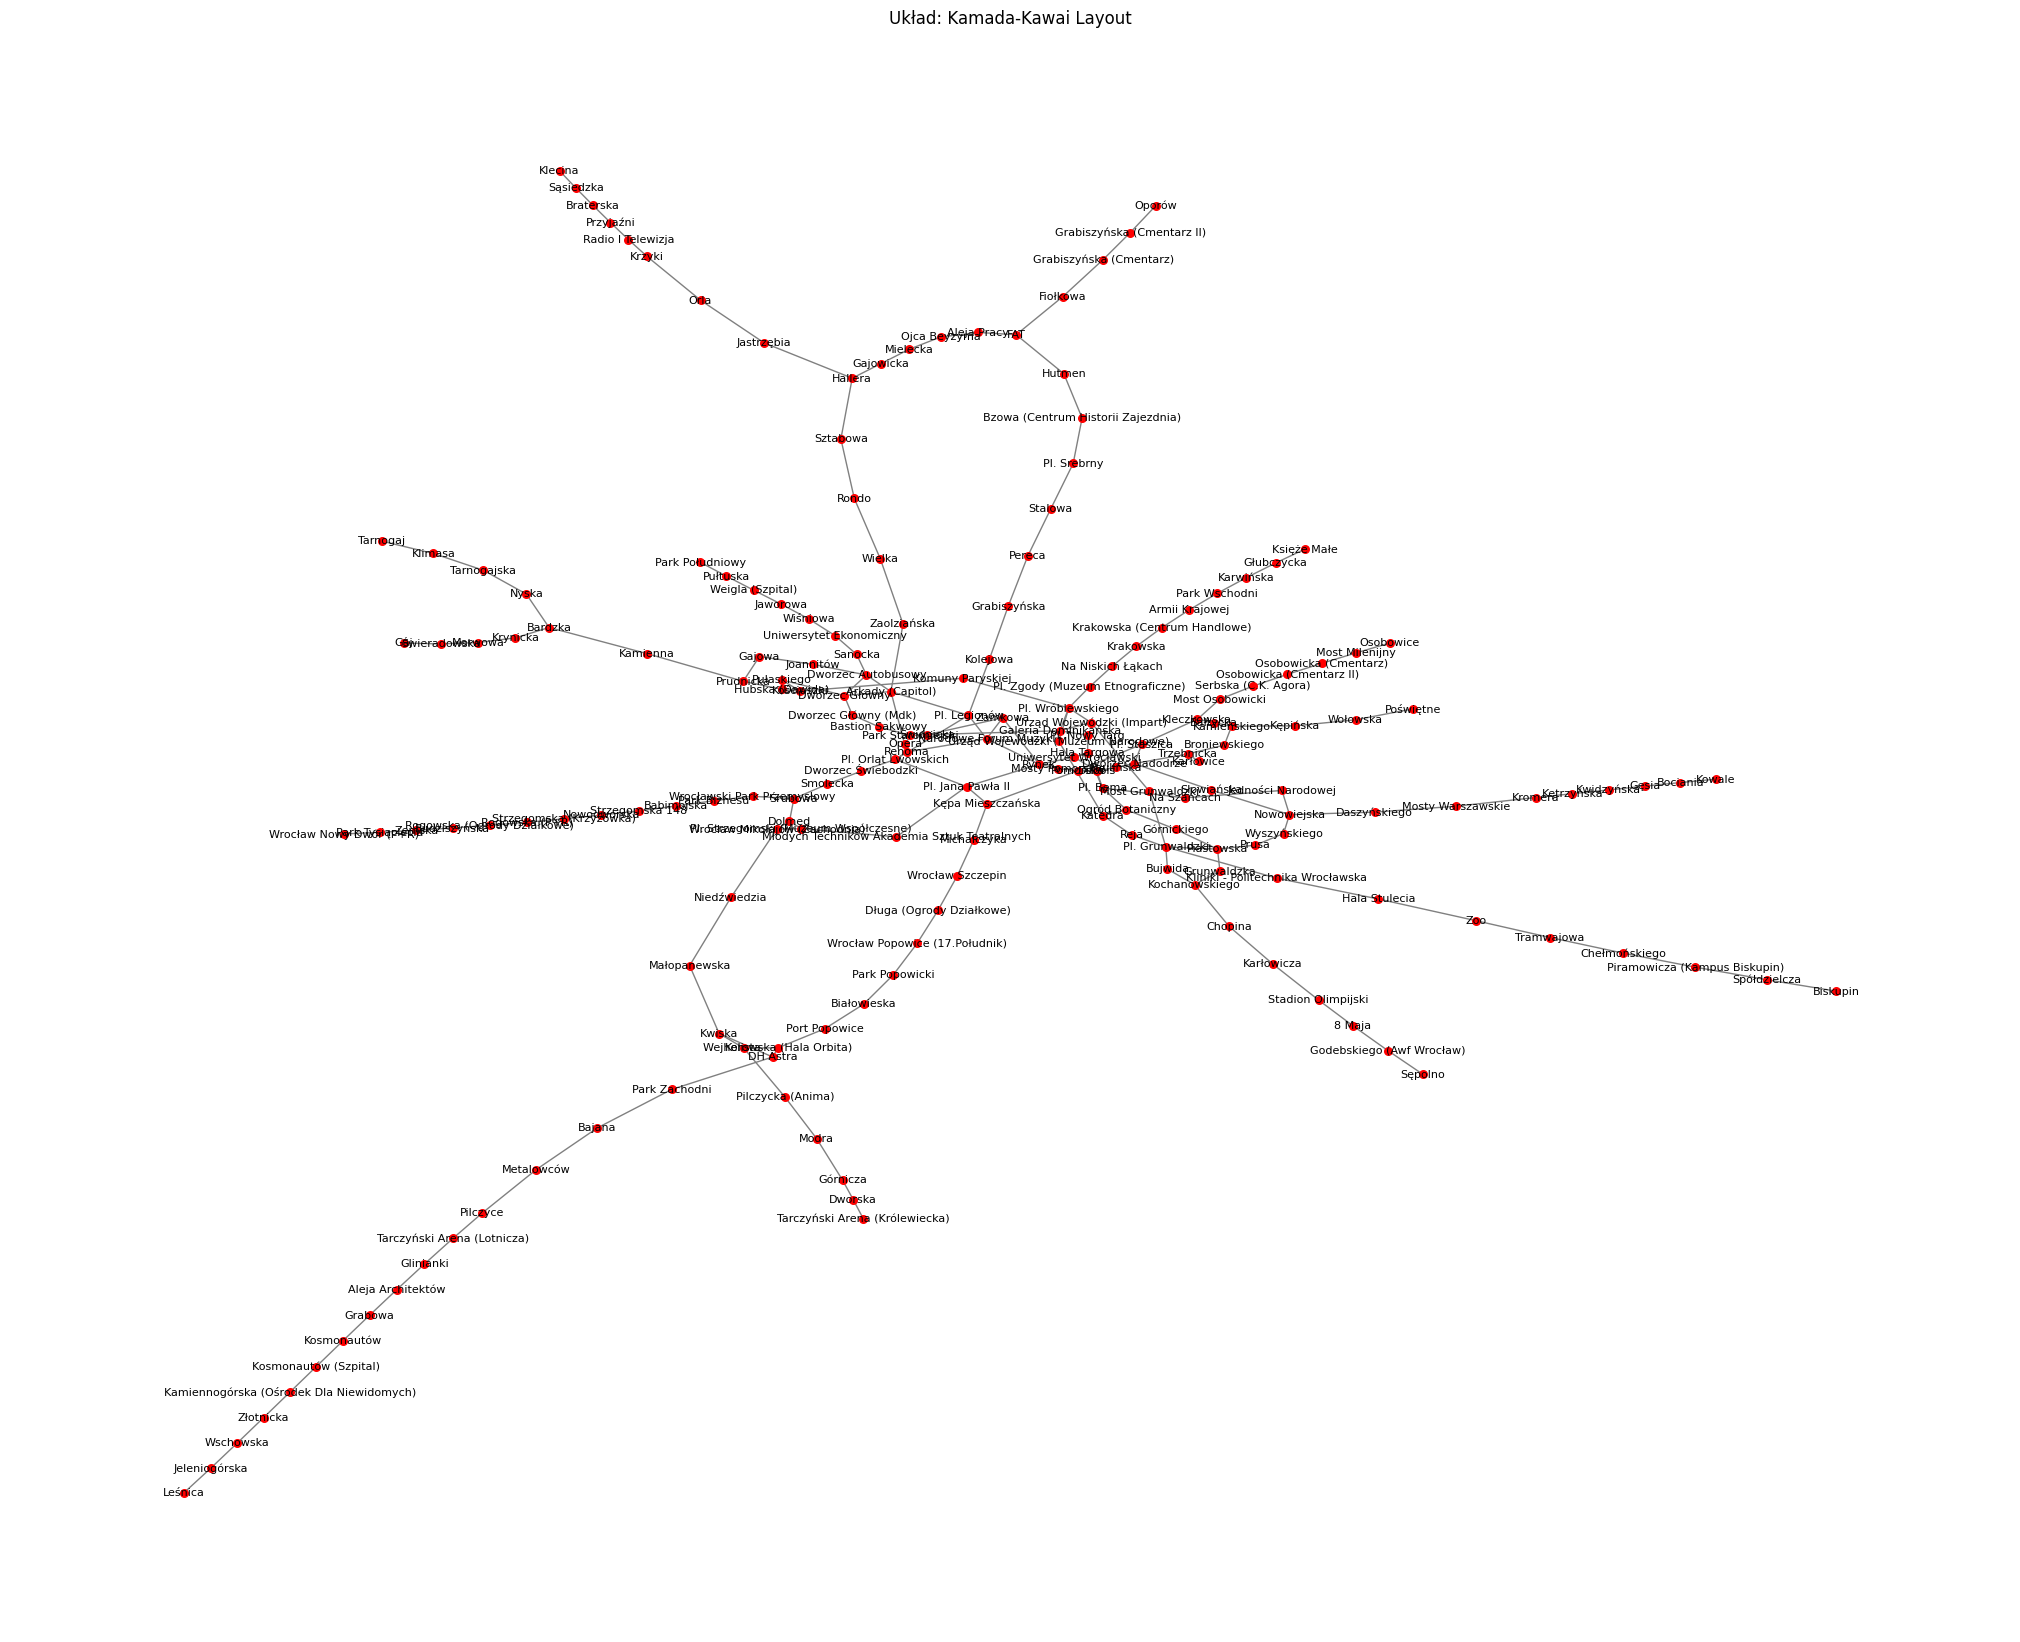

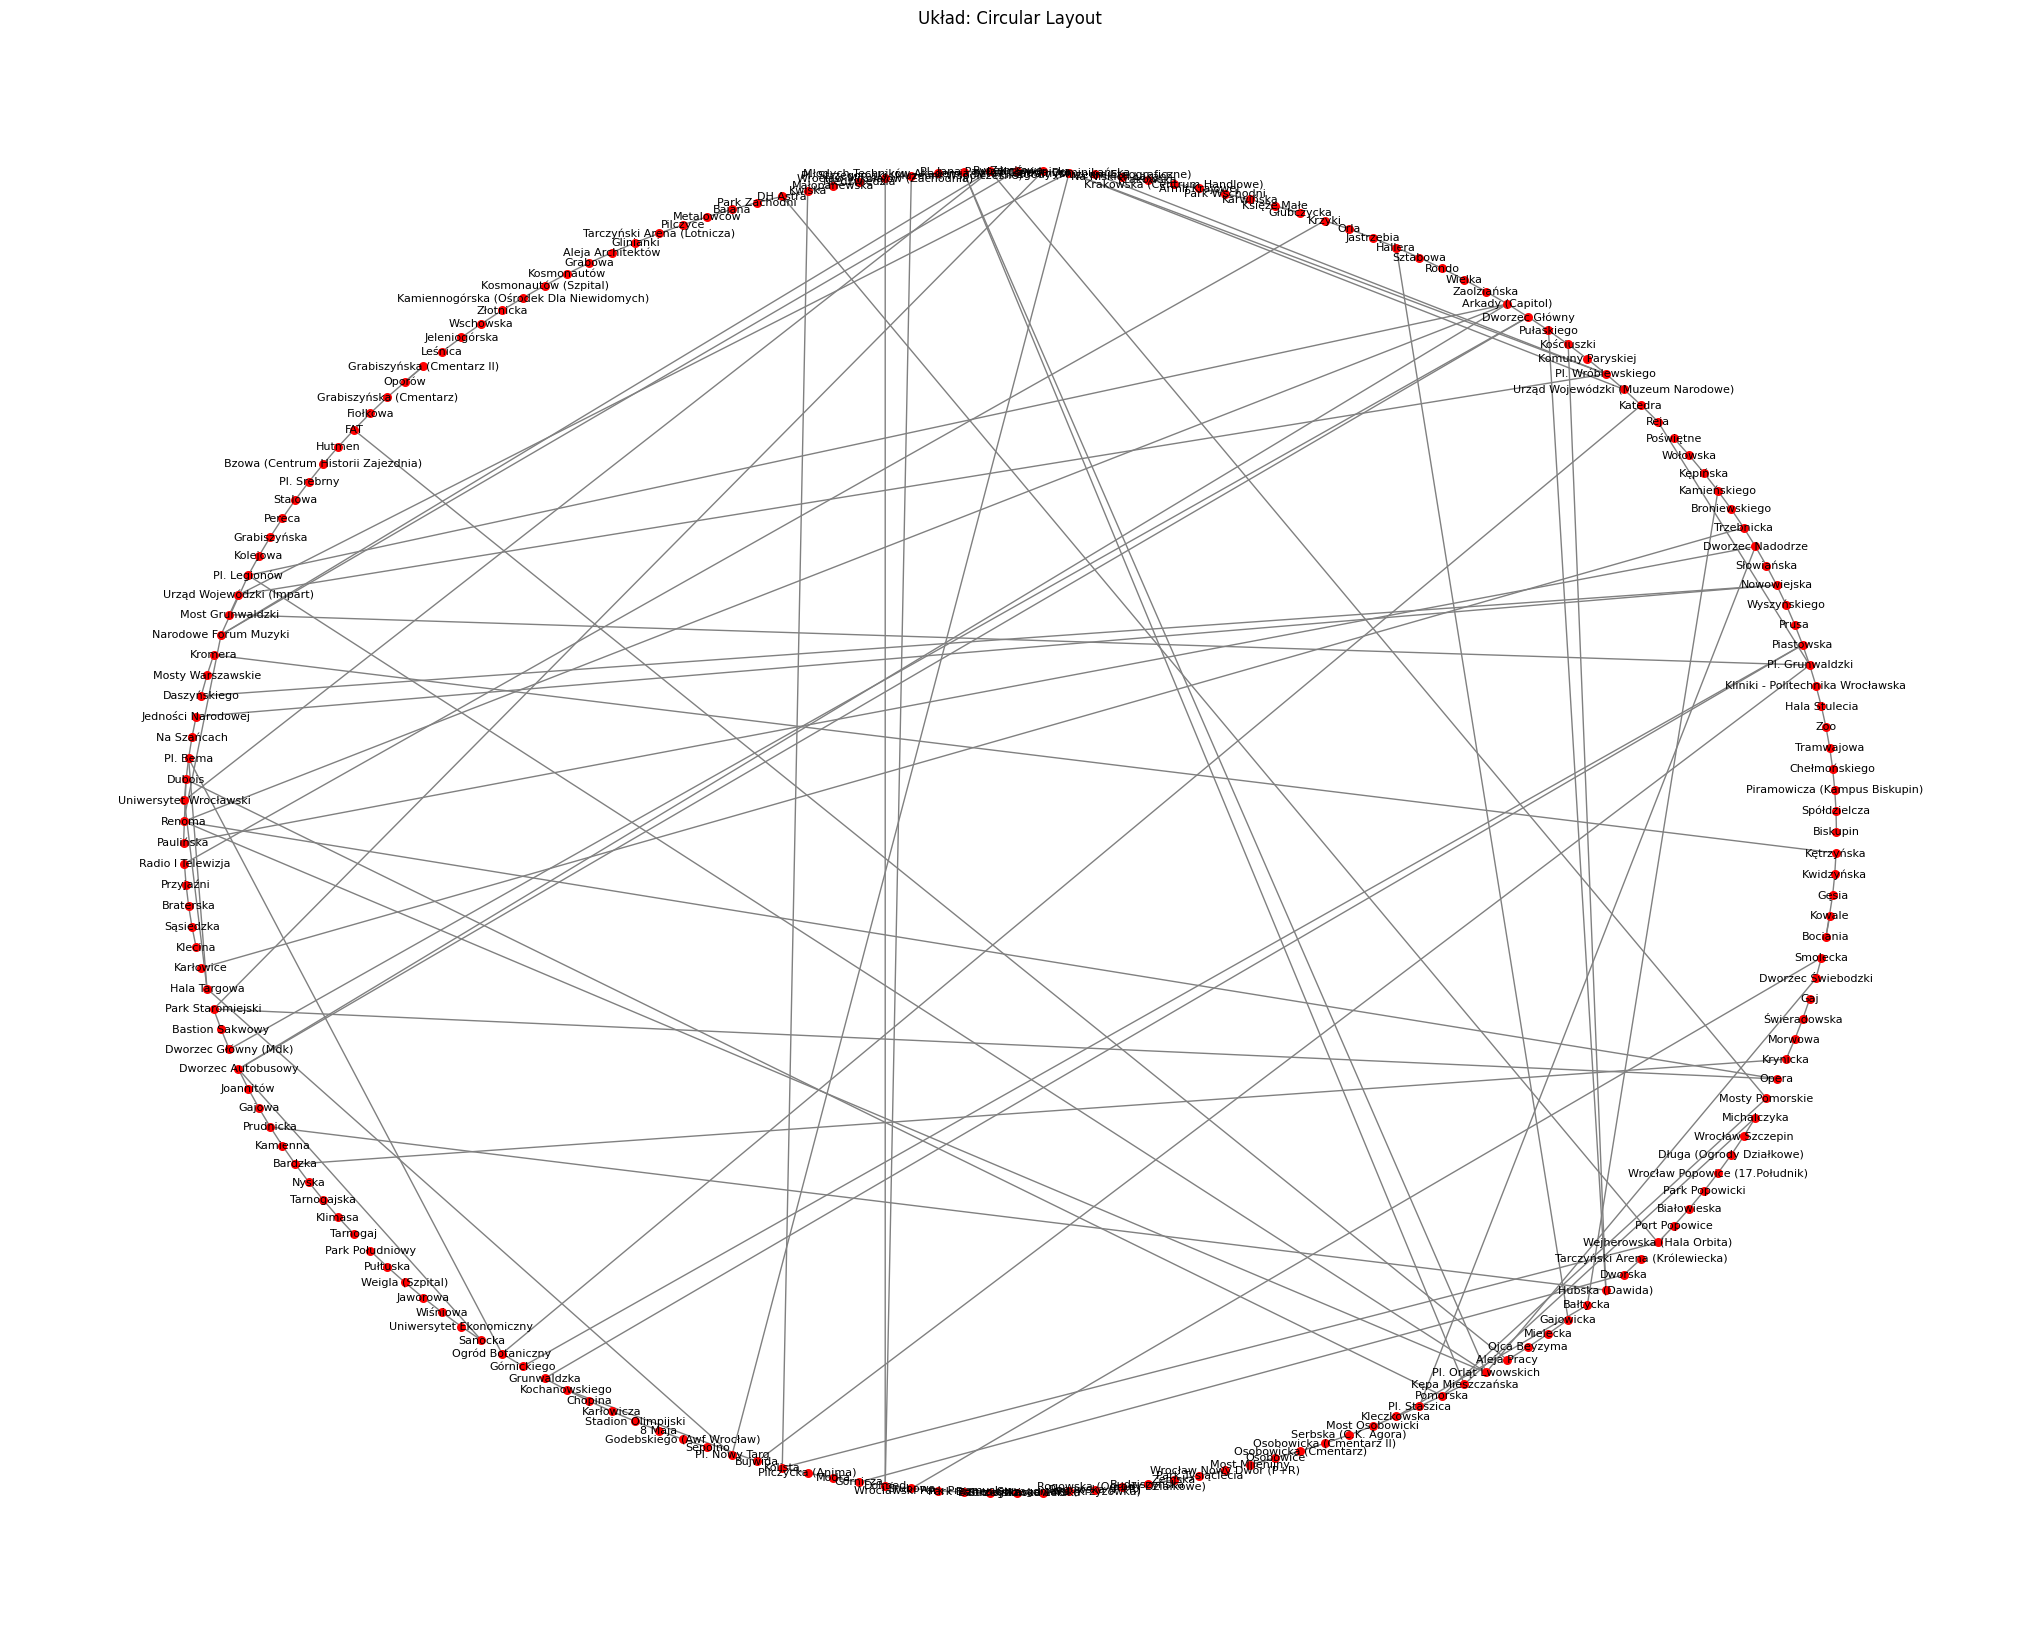

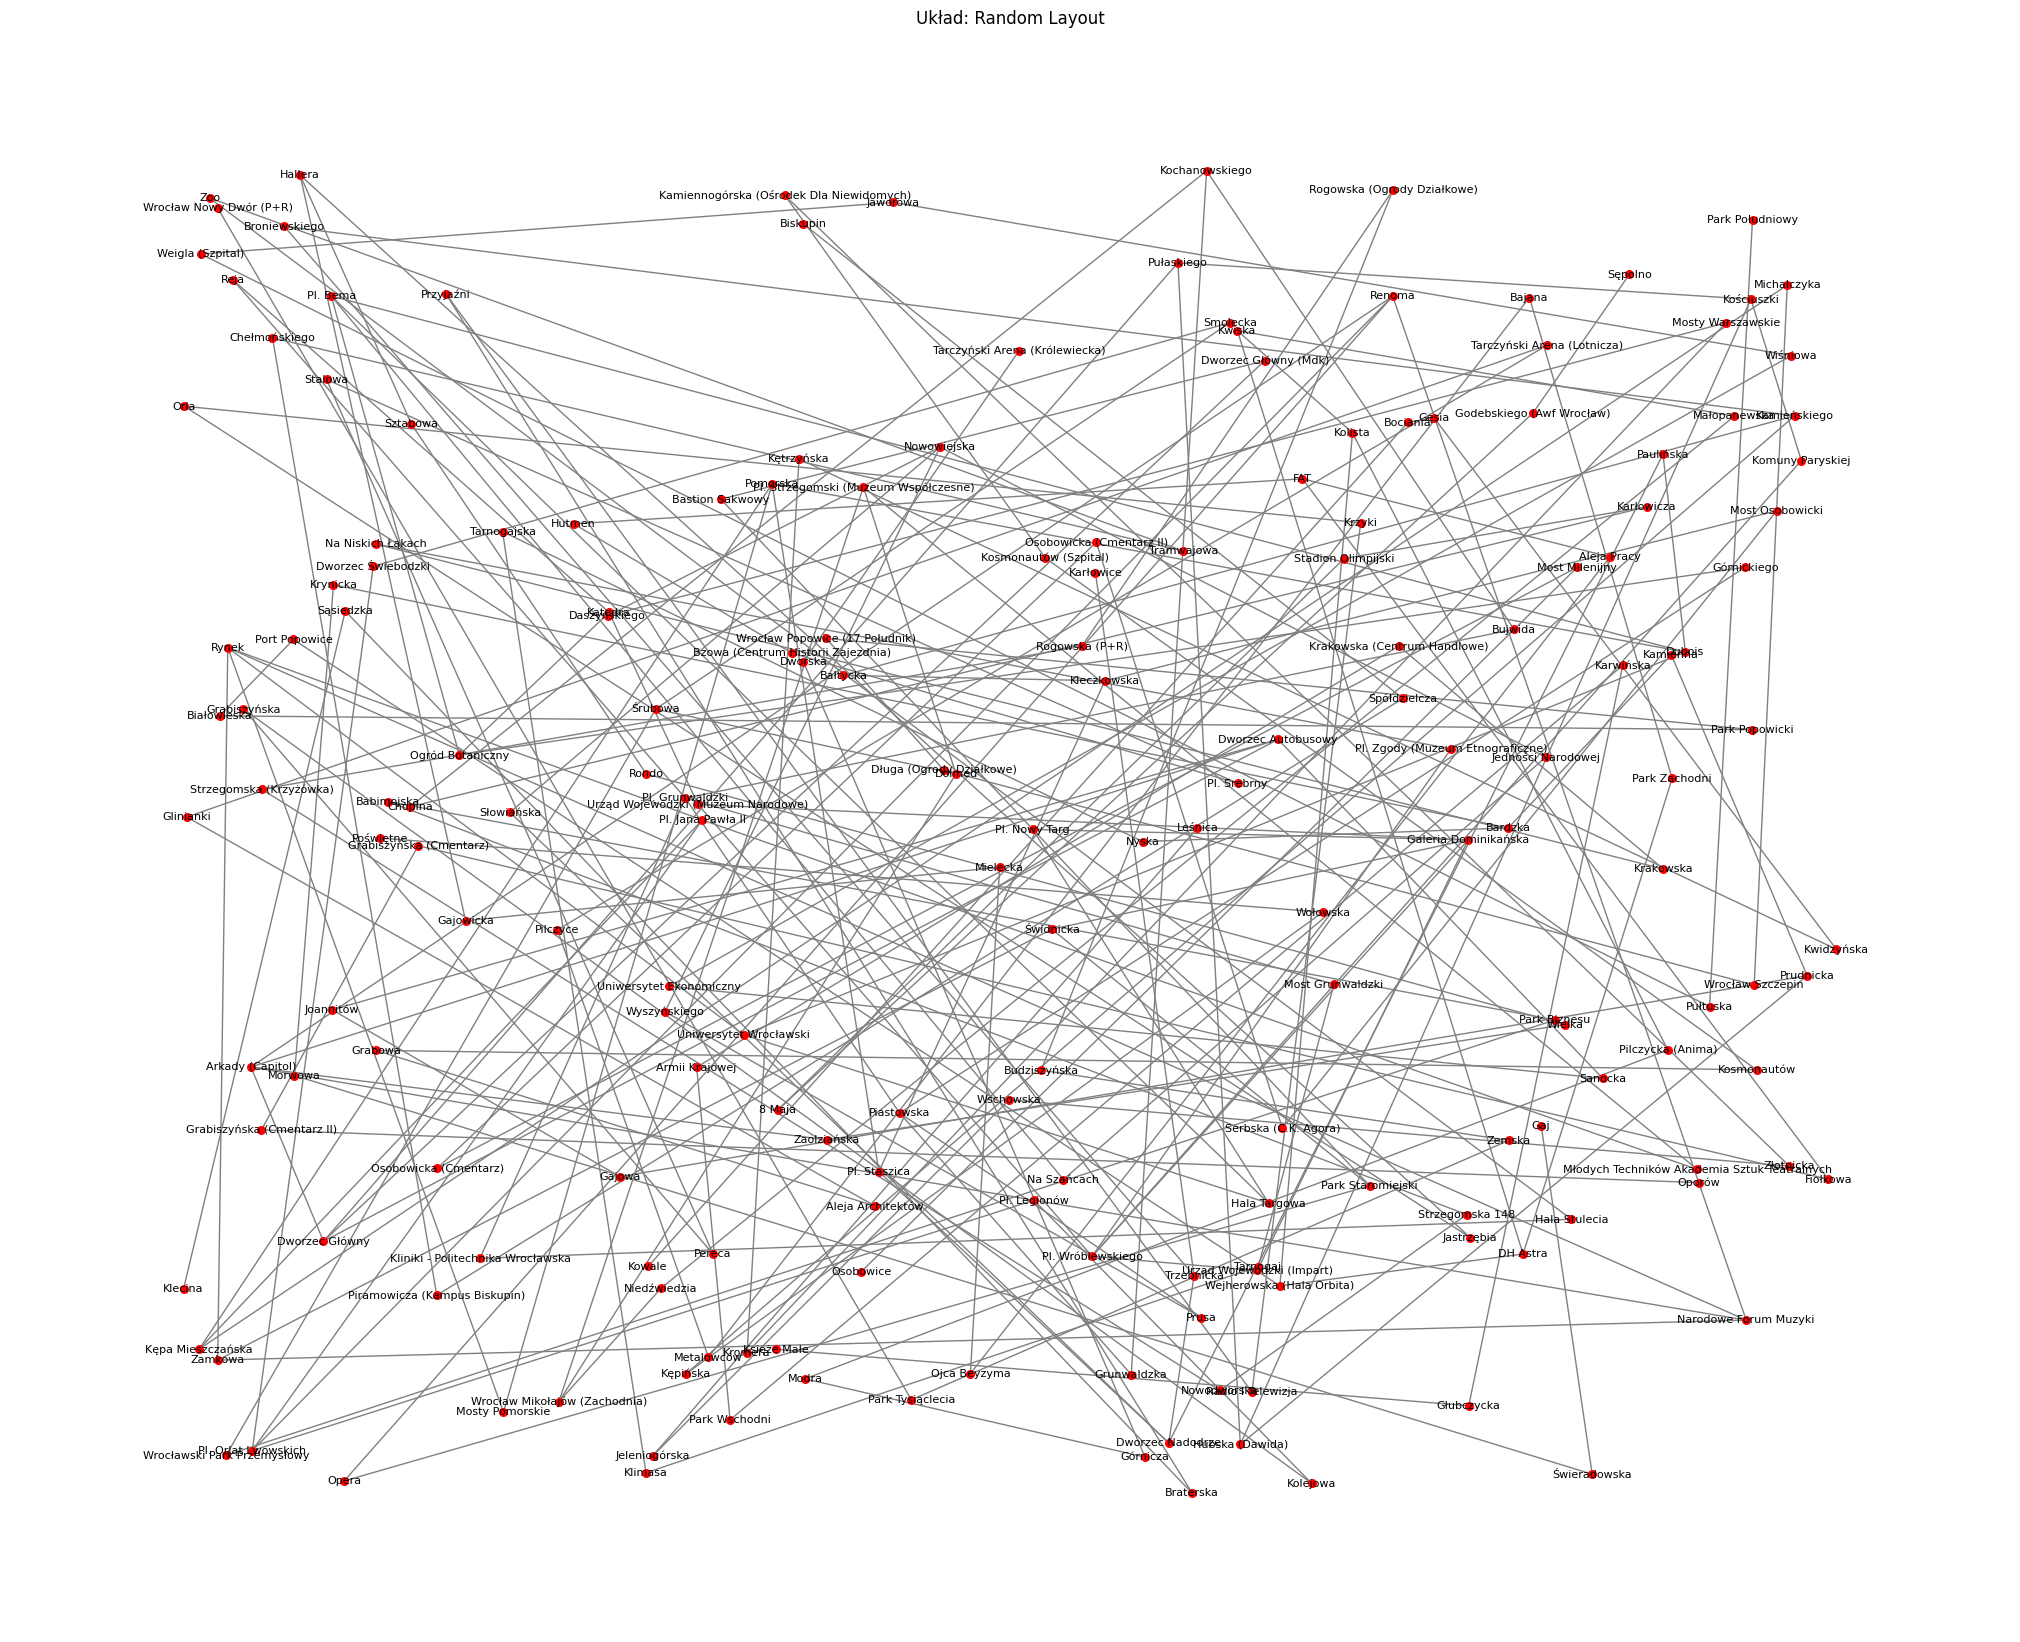

In [77]:
layouts = {
    "Spring Layout": nx.spring_layout(G, seed=42),
    "Kamada-Kawai Layout": nx.kamada_kawai_layout(G),
    "Circular Layout": nx.circular_layout(G),
    "Random Layout": nx.random_layout(G, seed=42),  
}

for layout_name, pos in layouts.items():
    plt.figure(figsize=(20, 16))
    nx.draw(
        G, 
        pos, 
        with_labels=True,
        labels={node: node for node in G.nodes()},  
        node_size=30, 
        font_size=8, 
        node_color="red", 
        edge_color="gray"
    )
    plt.title(f"Układ: {layout_name}")
    plt.show()

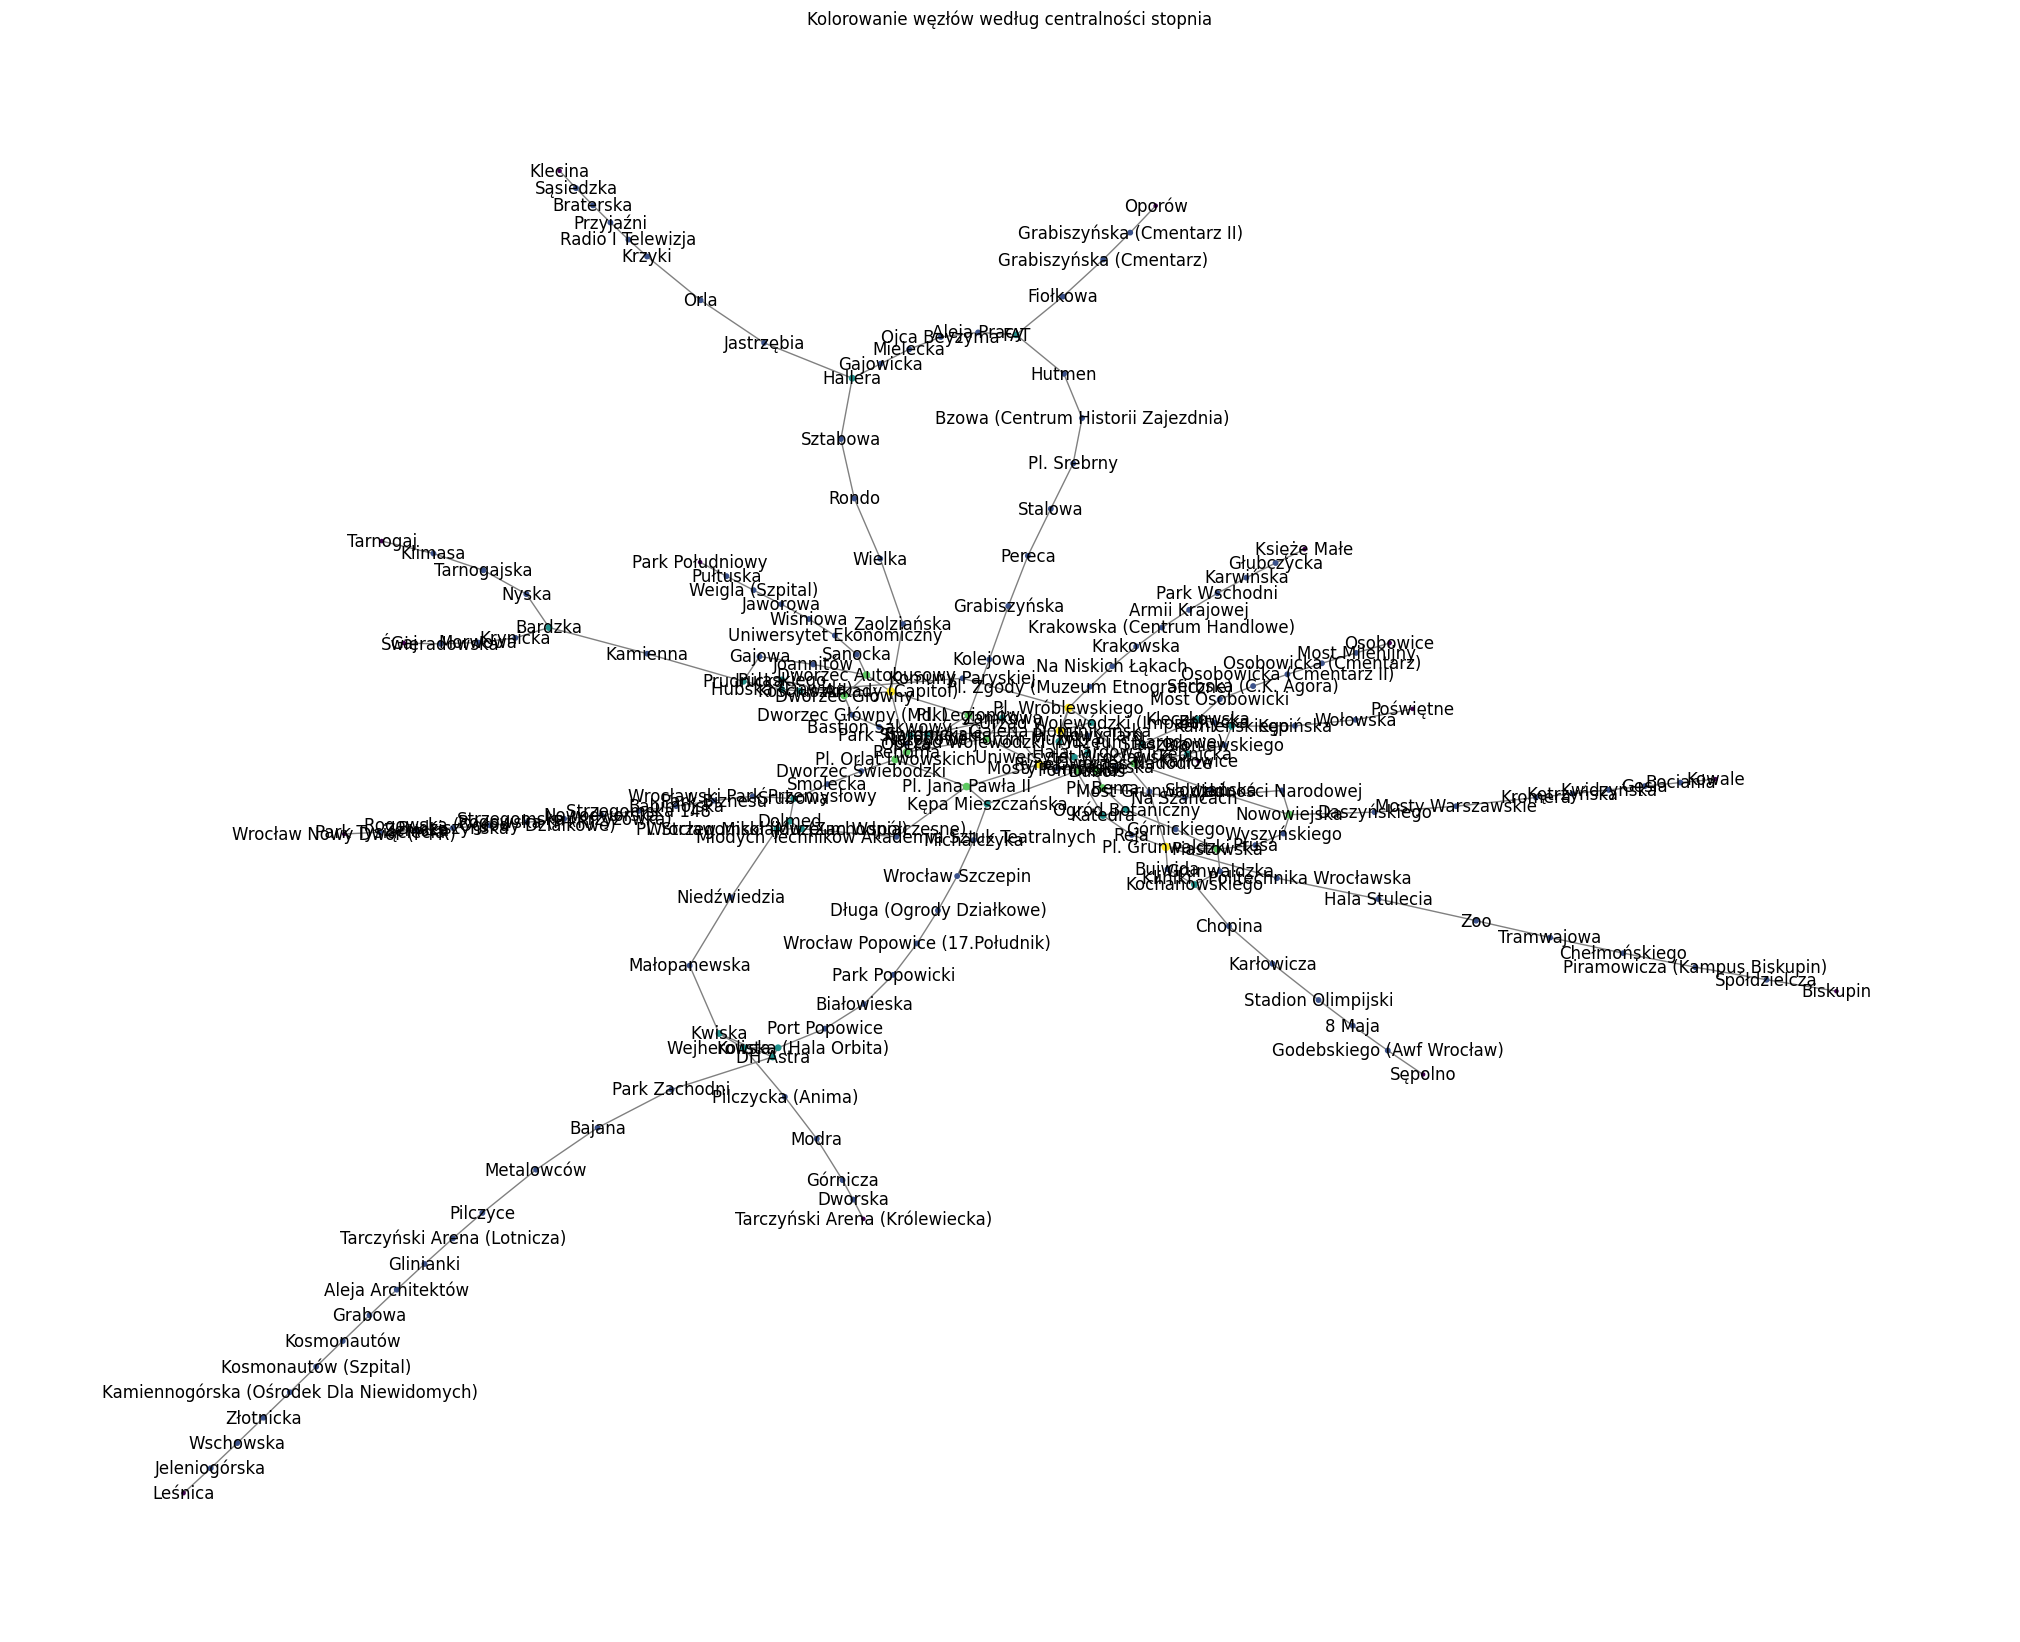

In [78]:
import matplotlib.cm as cm
import matplotlib.colors as colors

degree_centrality = nx.degree_centrality(G)
node_sizes = [v * 1000 for v in degree_centrality.values()]  
node_colors = list(degree_centrality.values()) 

plt.figure(figsize=(20, 16))
pos = nx.kamada_kawai_layout(G, scale=4)  
nx.draw(
    G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.viridis, with_labels=True, edge_color="gray"
)
plt.title("Kolorowanie węzłów według centralności stopnia")
plt.show()

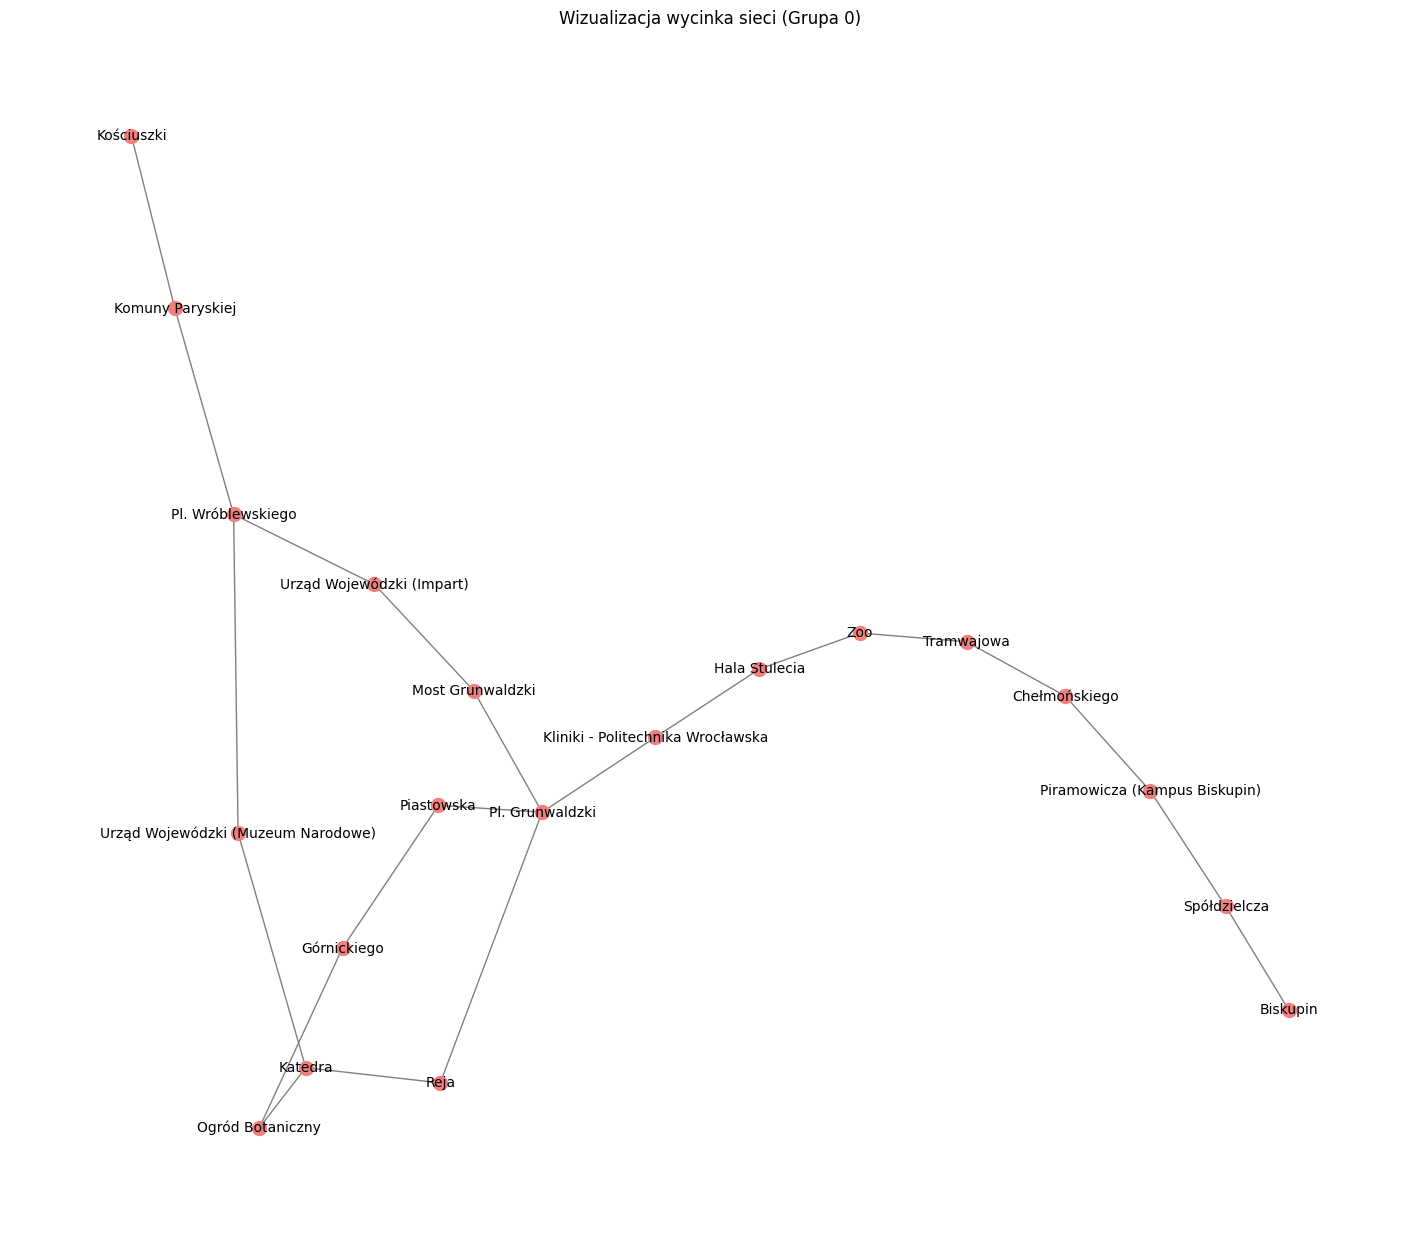

In [79]:
selected_group = 0 
subgraph_nodes = [node for node, group in group_map.items() if group == selected_group]
subgraph = G.subgraph(subgraph_nodes)

plt.figure(figsize=(14, 12))
subgraph_pos = nx.spring_layout(subgraph, seed=42)
nx.draw(
    subgraph, subgraph_pos, with_labels=True, node_size=100, font_size=10, node_color="lightcoral", edge_color="gray"
)
plt.title(f"Wizualizacja wycinka sieci (Grupa {selected_group})")
plt.show()

# Analiza rozprzestrzeniania w sieci

Aby przeprowadzić analizę rozprzestrzeniania w sieci tramwajowej, zakładając, że każdy tramwaj kursuje co 15 minut, możemy symulować przepływ informacji (lub pasażerów) w sieci. W tym celu można wykorzystać podejście oparte na modelu dyfuzji w grafie.

## Plan:

### Założenia:
1. Każdy tramwaj kursuje co 15 minut.
2. Informacja (lub pasażer) przemieszcza się między przystankami zgodnie z grafem.
3. Rozprzestrzenianie zaczyna się od jednego lub kilku węzłów (przystanków).
4. Średni czas przejazdu między przystankami wynosi **2 minuty**.

### Symulacja:
1. W każdej iteracji symulacji informacja przemieszcza się do sąsiednich węzłów.
2. Czas przejścia między węzłami zależy od wagi krawędzi (np. liczby linii tramwajowych łączących przystanki) lub jest stały (2 minuty w tym przypadku).

### Wynik:
1. Zbadamy, jak szybko informacja rozprzestrzenia się w sieci.
2. Zwizualizujemy liczbę przystanków, które zostały "zainfekowane" (osiągnięte) w czasie.
3. Wyświetlimy czas dotarcia do każdego przystanku w sieci.


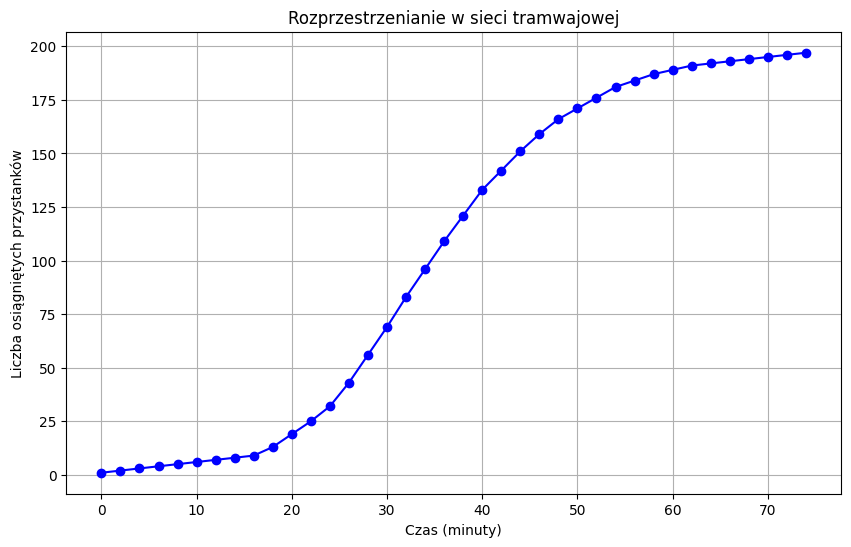

Liczba osiągniętych przystanków: 197
Czas dotarcia do przystanków:
Biskupin: 0.00 min
Spółdzielcza: 2.00 min
Piramowicza (Kampus Biskupin): 4.00 min
Chełmońskiego: 6.00 min
Tramwajowa: 8.00 min
Zoo: 10.00 min
Hala Stulecia: 12.00 min
Kliniki - Politechnika Wrocławska: 14.00 min
Pl. Grunwaldzki: 16.00 min
Piastowska: 18.00 min
Reja: 18.00 min
Most Grunwaldzki: 18.00 min
Bujwida: 18.00 min
Prusa: 20.00 min
Katedra: 20.00 min
Urząd Wojewódzki (Impart): 20.00 min
Górnickiego: 20.00 min
Grunwaldzka: 20.00 min
Kochanowskiego: 20.00 min
Wyszyńskiego: 22.00 min
Urząd Wojewódzki (Muzeum Narodowe): 22.00 min
Pl. Wróblewskiego: 22.00 min
Galeria Dominikańska: 22.00 min
Ogród Botaniczny: 22.00 min
Chopina: 22.00 min
Nowowiejska: 24.00 min
Komuny Paryskiej: 24.00 min
Pl. Zgody (Muzeum Etnograficzne): 24.00 min
Świdnicka: 24.00 min
Pl. Bema: 24.00 min
Karłowicza: 24.00 min
Pl. Nowy Targ: 24.00 min
Słowiańska: 26.00 min
Kościuszki: 26.00 min
Na Niskich Łąkach: 26.00 min
Zamkowa: 26.00 min
Daszyńskieg

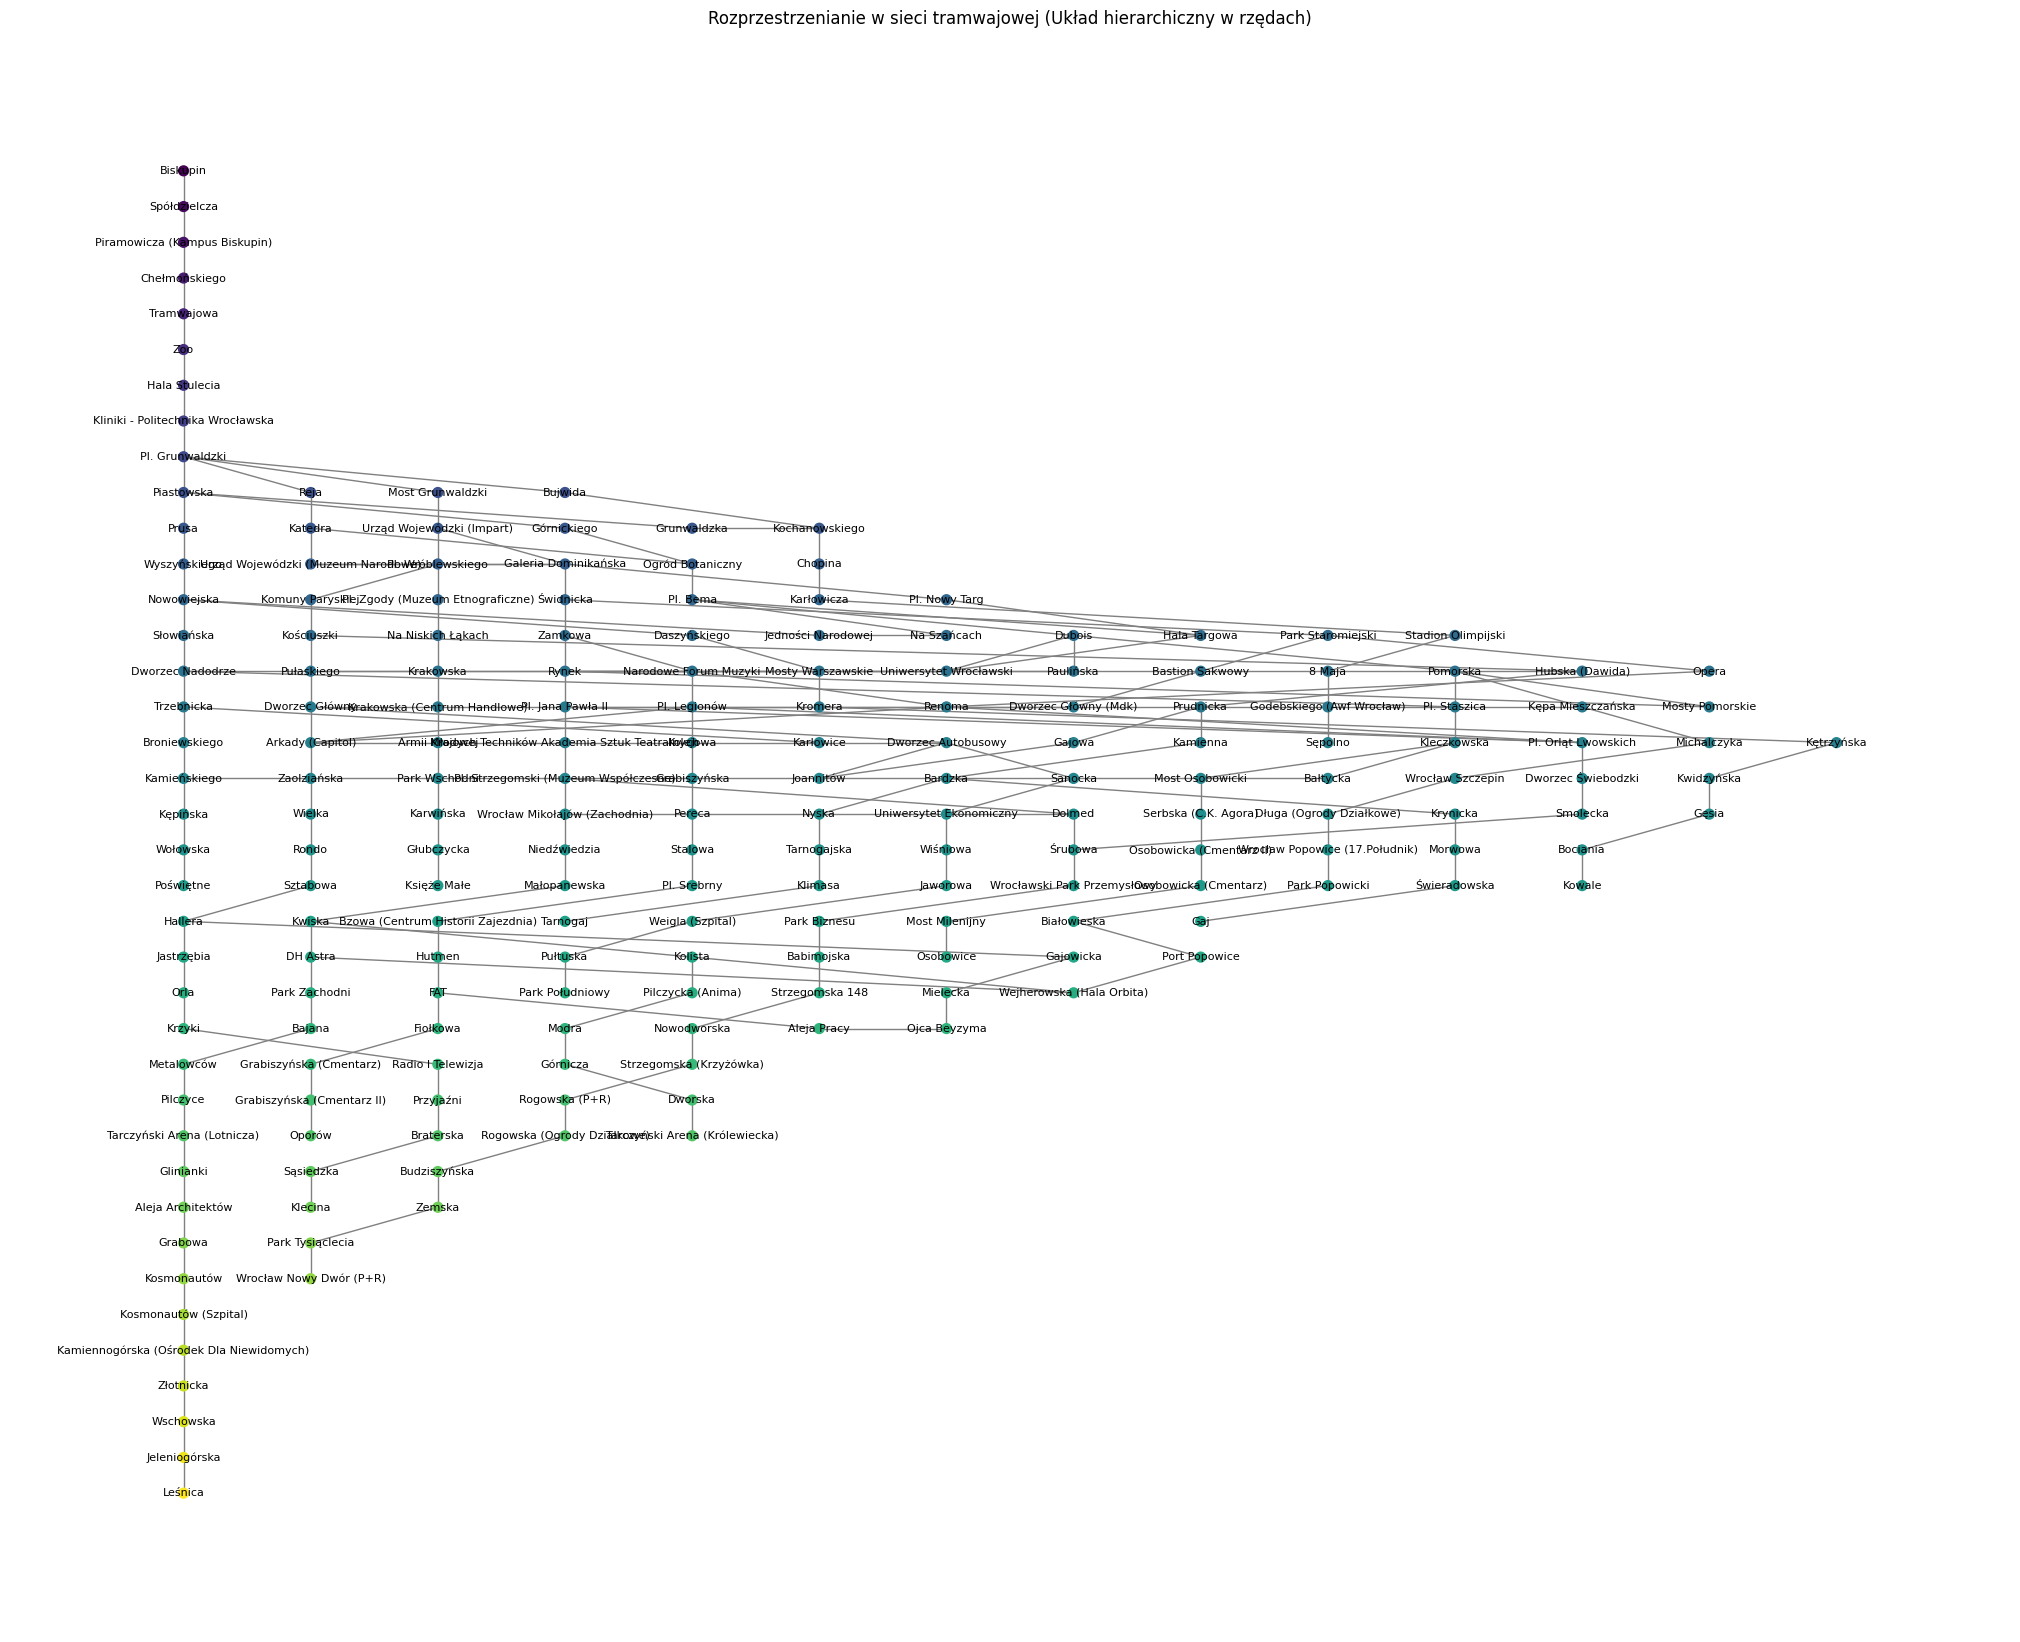

In [80]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

start_nodes = ["Biskupin"]  
time_per_stop = 2 
max_time = 120  

travel_time = {edge: time_per_stop for edge in G.edges()} 

def simulate_spread(G, start_nodes, travel_time, max_time):
    reached = set(start_nodes)  
    time_to_reach = {node: float('inf') for node in G.nodes()}  
    for node in start_nodes:
        time_to_reach[node] = 0

    queue = [(0, node) for node in start_nodes]

    while queue:
        queue.sort() 
        current_time, current_node = queue.pop(0)

        for neighbor in G.neighbors(current_node):
            edge = tuple(sorted((current_node, neighbor)))
            travel = travel_time.get(edge, time_per_stop) 
            new_time = current_time + travel

            if new_time < time_to_reach[neighbor] and new_time <= max_time:
                time_to_reach[neighbor] = new_time
                reached.add(neighbor)
                queue.append((new_time, neighbor))

    return time_to_reach, reached

time_to_reach, reached_nodes = simulate_spread(G, start_nodes, travel_time, max_time)

plt.figure(figsize=(10, 6))
times = sorted(set(time_to_reach.values()))
infected_counts = [sum(1 for t in time_to_reach.values() if t <= time) for time in times]

plt.plot(times, infected_counts, marker="o", color="blue")
plt.title("Rozprzestrzenianie w sieci tramwajowej")
plt.xlabel("Czas (minuty)")
plt.ylabel("Liczba osiągniętych przystanków")
plt.grid()
plt.show()

print(f"Liczba osiągniętych przystanków: {len(reached_nodes)}")
print("Czas dotarcia do przystanków:")
for node, time in sorted(time_to_reach.items(), key=lambda x: x[1]):
    print(f"{node}: {time:.2f} min")

plt.figure(figsize=(20, 16))

layers = defaultdict(list)
for node, time in time_to_reach.items():
    layers[time].append(node)

pos_hierarchic = {}
y_offset = 0  
for time, nodes in sorted(layers.items()):
    x_offset = 0 
    for node in nodes:
        pos_hierarchic[node] = (x_offset, -y_offset)  
        x_offset += 1  
    y_offset += 1  

nx.draw(
    G, pos=pos_hierarchic, with_labels=True, node_size=50, font_size=8,
    node_color=[time_to_reach[node] for node in G.nodes()],
    cmap=plt.cm.viridis, edge_color="gray"
)

plt.title("Rozprzestrzenianie w sieci tramwajowej (Układ hierarchiczny w rzędach)")
plt.show()

# Wplyw usuniecia przystankow na przepustowosc sieci
- Usunięcie najważniejszych przystanków (tzw. hubów) zidentyfikowanych przez miary centralności
- Losowe usunięcie tej samej liczby przystanków

In [81]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
def analyze_network_after_removal(G, removed_nodes):
    G_modified = G.copy()
    for node in removed_nodes:
        if node in G_modified:
            G_modified.remove_node(node)
    
    components = list(nx.connected_components(G_modified))
    largest_component = max(components, key=len)
    fraction_connected = len(largest_component) / (G.number_of_nodes() - len(removed_nodes))
    
    subgraph = G_modified.subgraph(largest_component)
    
    try:
        avg_path_length = nx.average_shortest_path_length(subgraph)
        diameter = nx.diameter(subgraph)
    except:
        avg_path_length = float('inf')
        diameter = float('inf')
    
    return {
        'nodes_remaining': G_modified.number_of_nodes(),
        'edges_remaining': G_modified.number_of_edges(),
        'components': len(components),
        'largest_component_size': len(largest_component),
        'fraction_connected': fraction_connected,
        'avg_path_length': avg_path_length,
        'diameter': diameter,
        'modified_graph': G_modified
    }

def simulate_travel_time_after_removal(G, start_node, removed_nodes, time_per_stop=2, max_time=120):
    time_to_reach = {node: float('inf') for node in G.nodes()}
    
    if start_node in removed_nodes:
        return {
            'reachable_fraction': 0,
            'avg_time': float('inf'),
            'max_time': float('inf'),
            'unreachable': G.number_of_nodes() - 1,
            'times': time_to_reach  
        }
    
    G_modified = G.copy()
    for node in removed_nodes:
        if node in G_modified:
            G_modified.remove_node(node)
    
    if start_node not in G_modified:
        return {
            'reachable_fraction': 0,
            'avg_time': float('inf'),
            'max_time': float('inf'),
            'unreachable': G.number_of_nodes() - 1,
            'times': time_to_reach  
        }
    
    travel_time = {edge: time_per_stop / G[edge[0]][edge[1]].get('weight', 1) for edge in G_modified.edges()}
    time_to_reach, reached_nodes = simulate_spread(G_modified, [start_node], travel_time, max_time)
    
    times = [t for t in time_to_reach.values() if t < float('inf') and t > 0]
    
    return {
        'reachable_fraction': len(reached_nodes) / (G_modified.number_of_nodes()),
        'avg_time': np.mean(times) if times else float('inf'),
        'max_time': max(times) if times else float('inf'),
        'unreachable': G.number_of_nodes() - len(reached_nodes),
        'times': time_to_reach
    }

In [ ]:
def compare_hub_vs_random_removal(G, centrality_measure, num_to_remove, num_trials=5, start_nodes=None):
    if start_nodes is None:
        start_nodes = [random.choice(list(G.nodes()))]
    
    sorted_nodes = sorted(centrality_measure.items(), key=lambda x: x[1], reverse=True)
    hub_nodes = [node for node, _ in sorted_nodes[:num_to_remove]]
    
    hub_network = analyze_network_after_removal(G, hub_nodes)
    
    hub_results = {
        'network': hub_network,
        'travel_times': []
    }
    
    for start in start_nodes:
        hub_results['travel_times'].append(
            simulate_travel_time_after_removal(G, start, hub_nodes)
        )
    
    random_results = {
        'network': [],
        'travel_times': [[] for _ in start_nodes]
    }
    
    for _ in range(num_trials):
        random_nodes = random.sample(list(G.nodes()), num_to_remove)
        random_network = analyze_network_after_removal(G, random_nodes)
        random_results['network'].append(random_network)
        
        for i, start in enumerate(start_nodes):
            random_results['travel_times'][i].append(
                simulate_travel_time_after_removal(G, start, random_nodes)
            )
    
    avg_random_network = {
        'components': np.mean([r['components'] for r in random_results['network']]),
        'fraction_connected': np.mean([r['fraction_connected'] for r in random_results['network']]),
        'avg_path_length': np.mean([r['avg_path_length'] for r in random_results['network'] if r['avg_path_length'] < float('inf')]),
    }
    
    avg_random_travel = []
    for i in range(len(start_nodes)):
        avg_random_travel.append({
            'reachable_fraction': np.mean([r['reachable_fraction'] for r in random_results['travel_times'][i]]),
            'avg_time': np.mean([r['avg_time'] for r in random_results['travel_times'][i] if r['avg_time'] < float('inf')]),
            'unreachable': np.mean([r['unreachable'] for r in random_results['travel_times'][i]]),
        })
    
    return {
        'hub_removal': hub_results,
        'random_removal': random_results,
        'avg_random': {
            'network': avg_random_network,
            'travel_times': avg_random_travel
        },
        'removed_hubs': hub_nodes
    }

In [ ]:
def plot_removal_comparison(removal_results, title="Porównanie usunięcia hubów vs losowych przystanków"):
    hub = removal_results['hub_removal']
    avg_random = removal_results['avg_random']
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].bar(['Huby', 'Losowe'], 
                [hub['network']['components'], avg_random['network']['components']], 
                color=['red', 'blue'], alpha=0.7)
    axes[0].set_ylabel('Liczba komponentów')
    axes[0].set_title('Fragmentacja sieci')
    
    axes[1].bar(['Huby', 'Losowe'], 
                [hub['network']['fraction_connected'], avg_random['network']['fraction_connected']], 
                color=['red', 'blue'], alpha=0.7)
    axes[1].set_ylabel('Frakcja węzłów w największym komponencie')
    axes[1].set_title('Spójność sieci')
    axes[1].set_ylim(0, 1)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    reachable_hub = [r['reachable_fraction'] for r in hub['travel_times']]
    reachable_random = [r['reachable_fraction'] for r in avg_random['travel_times']]
    
    axes[0].bar(['Huby', 'Losowe'], 
                [np.mean(reachable_hub), np.mean(reachable_random)], 
                color=['red', 'blue'], alpha=0.7)
    axes[0].set_ylabel('Średnia frakcja osiągalnych przystanków')
    axes[0].set_title('Dostępność sieci')
    axes[0].set_ylim(0, 1)
    
    avg_time_hub = [r['avg_time'] for r in hub['travel_times'] if r['avg_time'] < float('inf')]
    avg_time_random = [r['avg_time'] for r in avg_random['travel_times'] if r['avg_time'] < float('inf')]
    
    if avg_time_hub and avg_time_random:
        axes[1].bar(['Huby', 'Losowe'], 
                    [np.mean(avg_time_hub), np.mean(avg_time_random)], 
                    color=['red', 'blue'], alpha=0.7)
        axes[1].set_ylabel('Średni czas przejazdu (minuty)')
        axes[1].set_title('Efektywność sieci')
    
    plt.suptitle(f"Wpływ na dostępność i czas przejazdu")
    plt.tight_layout()
    plt.show()

Analizuję usunięcie 9 przystanków (5% sieci)...


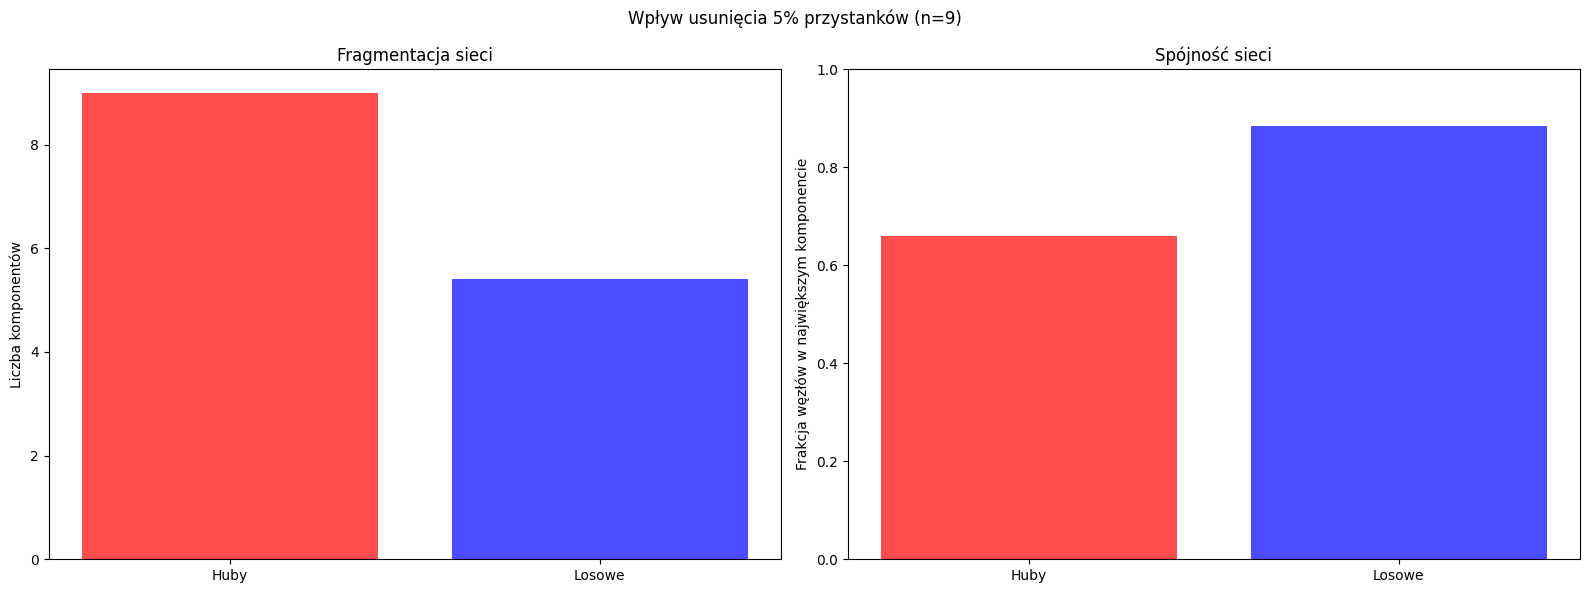

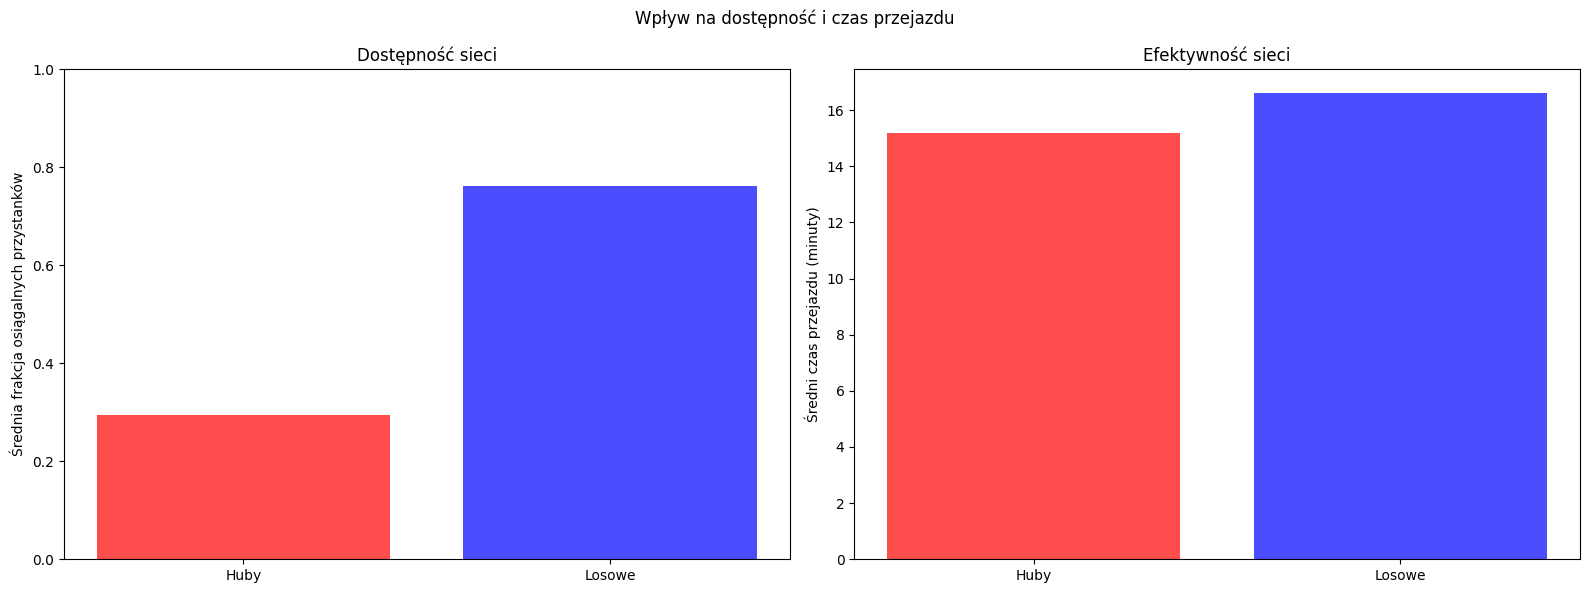

Analizuję usunięcie 19 przystanków (10% sieci)...


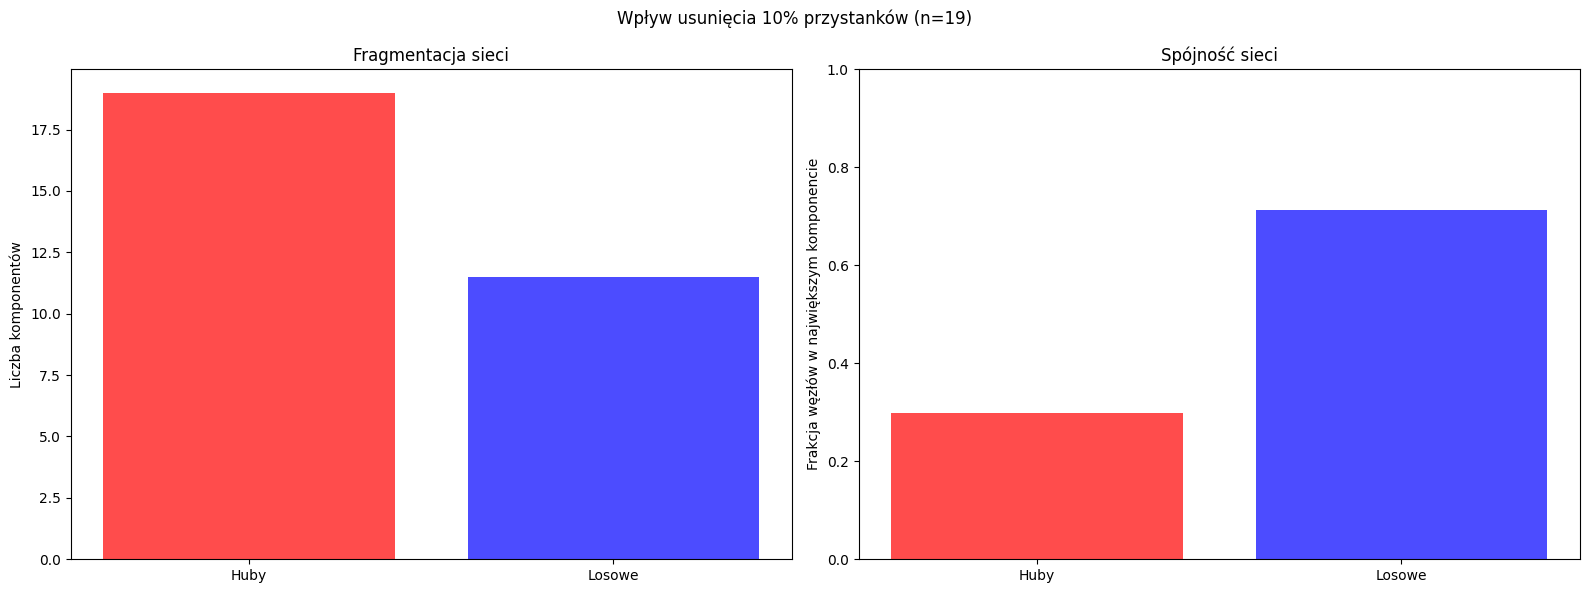

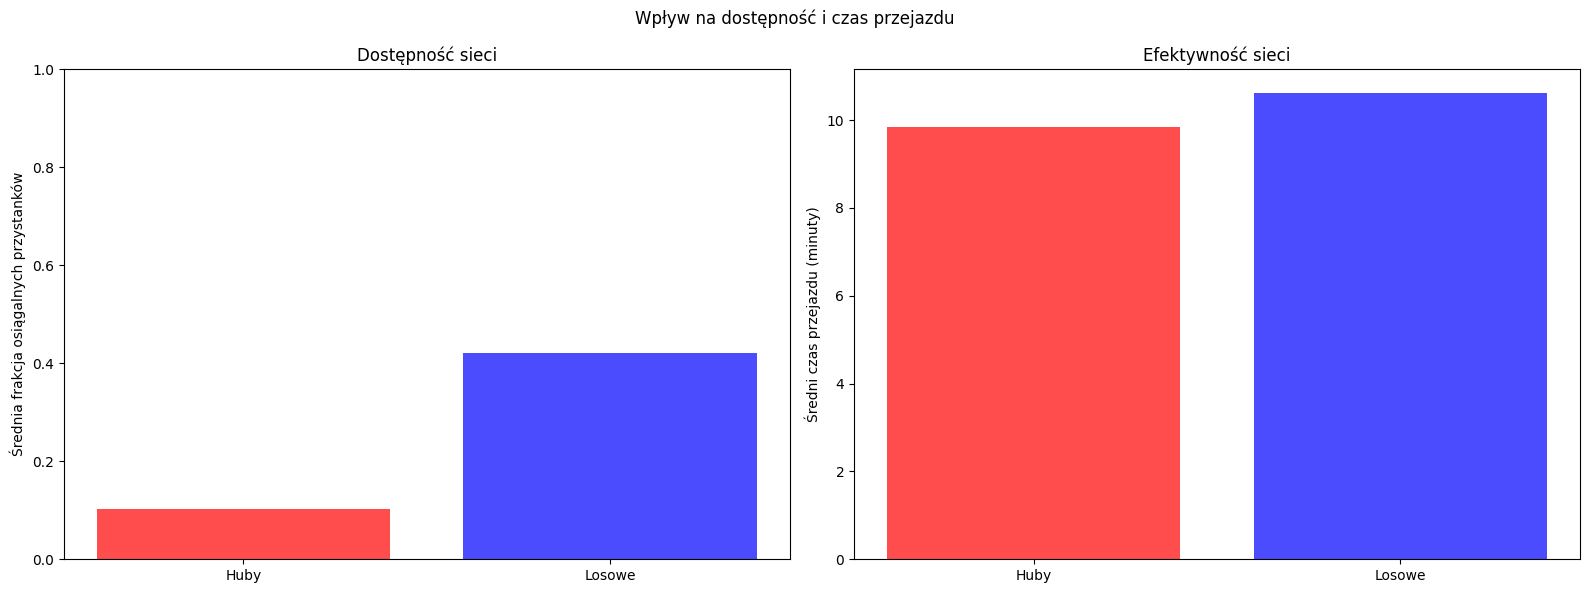

Analizuję usunięcie 29 przystanków (15% sieci)...


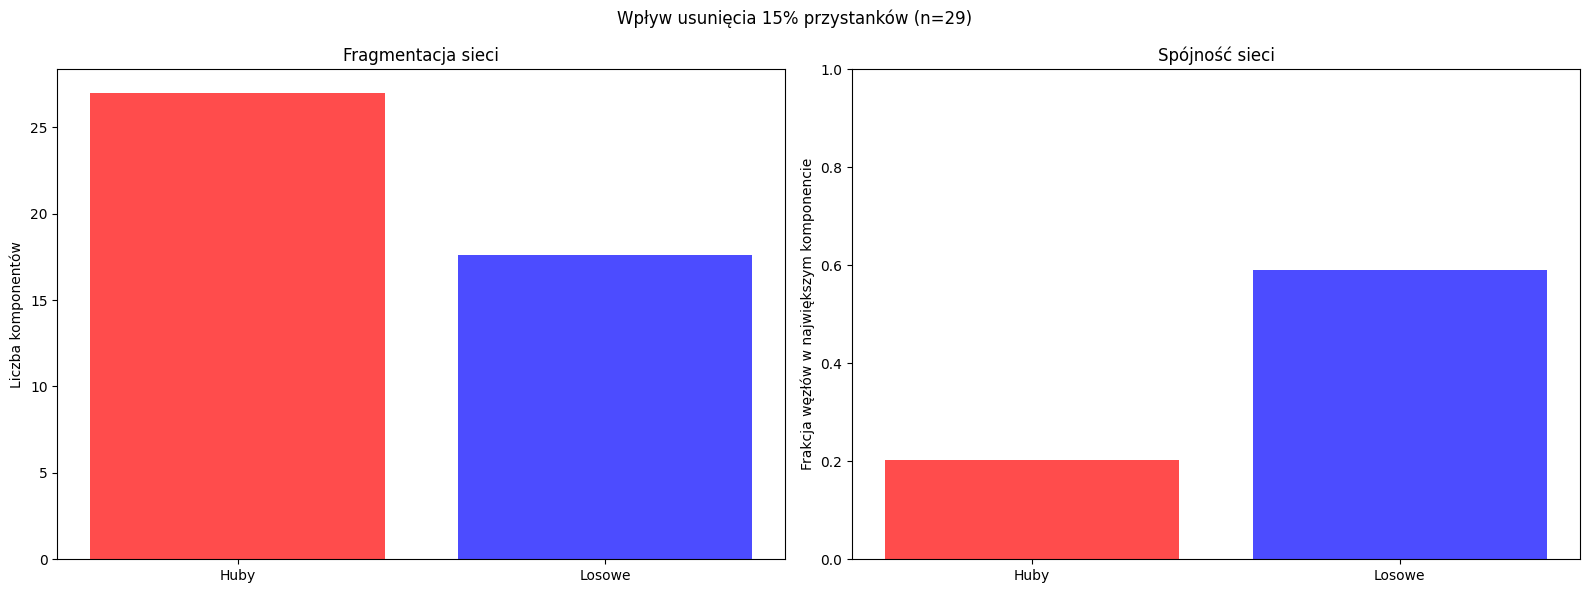

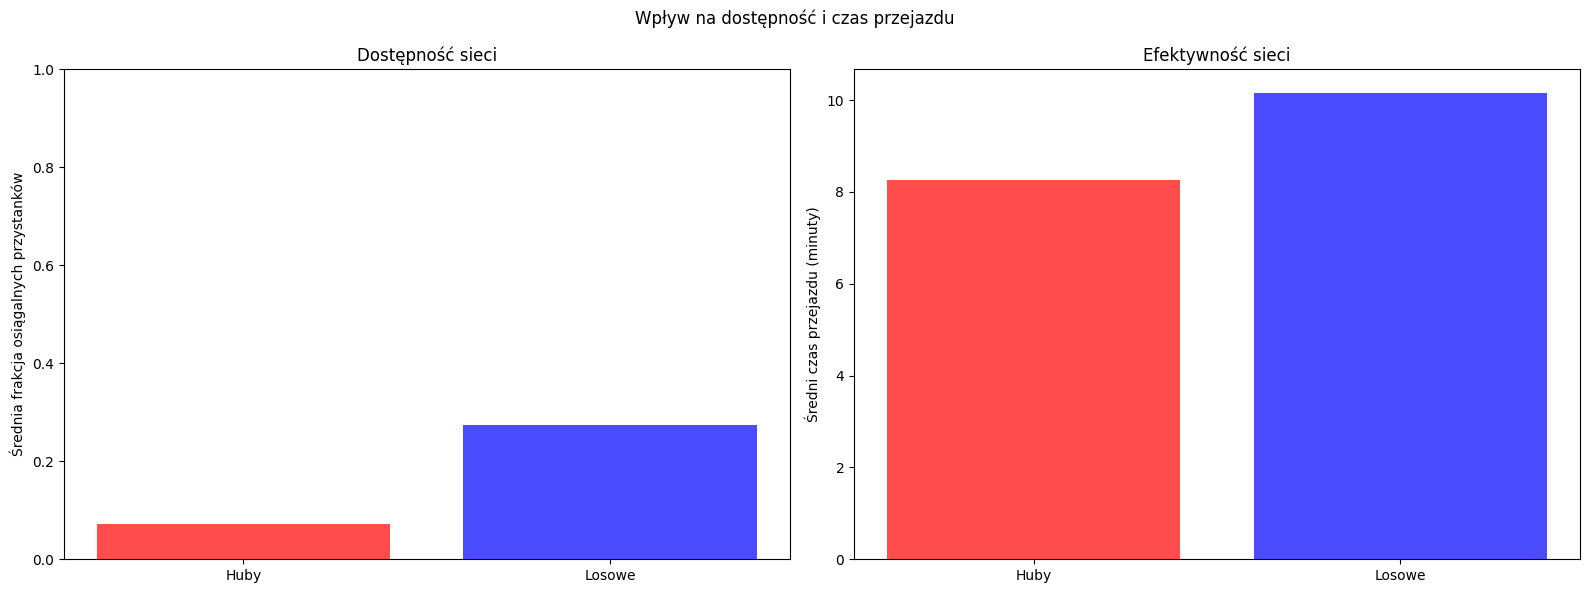

Analizuję usunięcie 39 przystanków (20% sieci)...


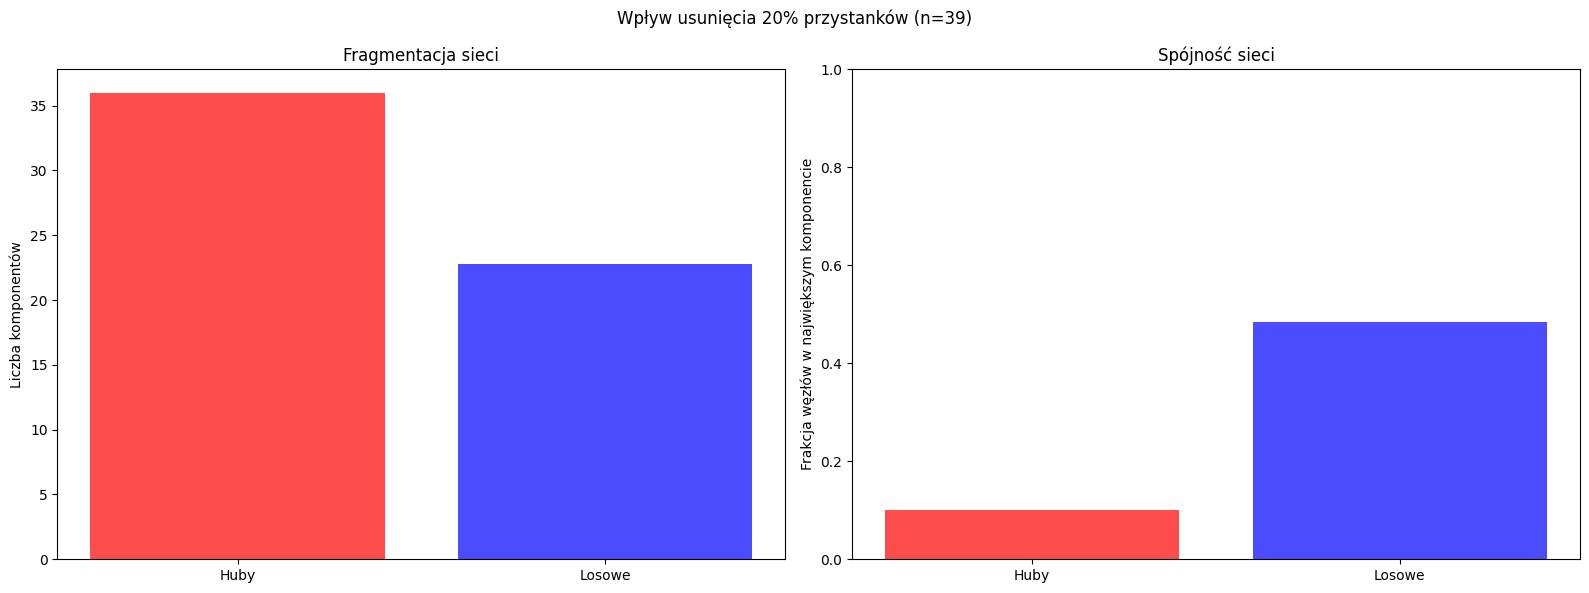

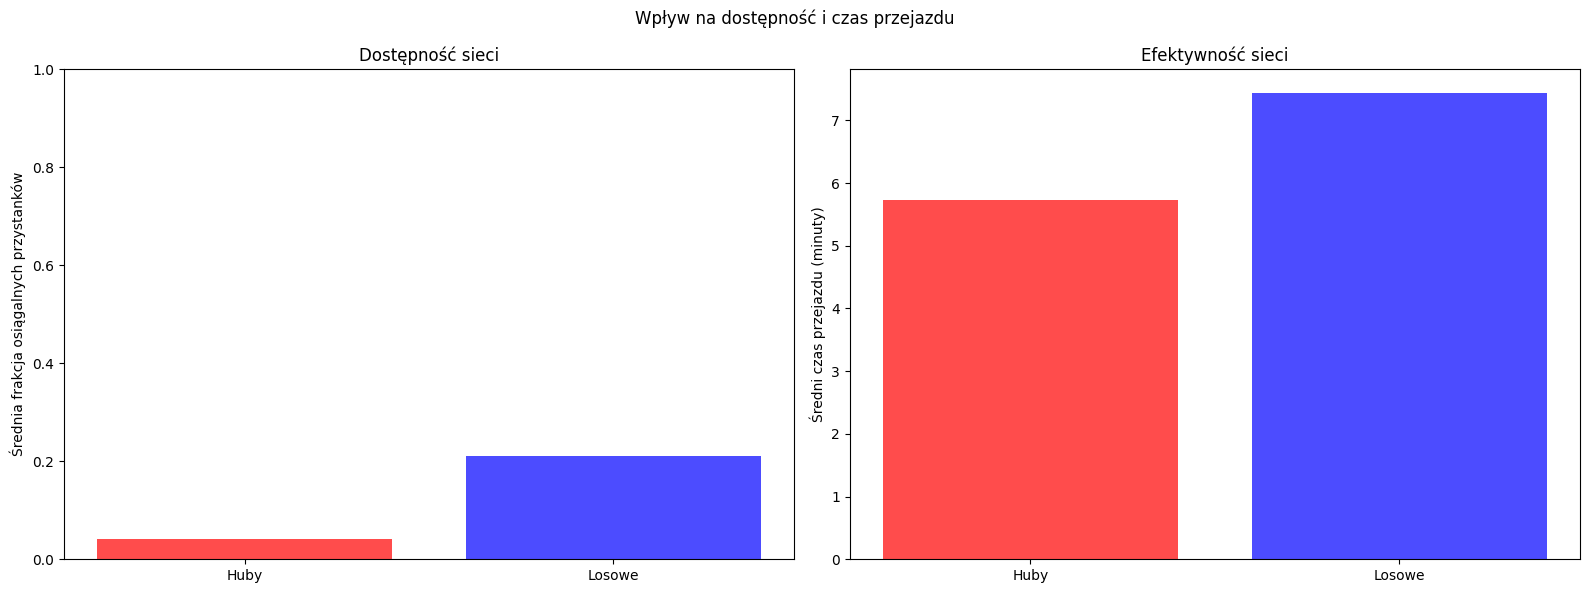

In [ ]:
removal_percentages = [5, 10, 15, 20]
results_by_percentage = {}

start_stops = ["Biskupin", "Rynek", "Kromera", "Dworzec Główny", "Leśnica", "Pilczyce", "Zamkowa"]

for percent in removal_percentages:
    num_to_remove = int(G.number_of_nodes() * percent / 100)
    
    print(f"Analizuję usunięcie {num_to_remove} przystanków ({percent}% sieci)...")
    results = compare_hub_vs_random_removal(G, degree_centrality, num_to_remove, num_trials=10, start_nodes=start_stops)
    results_by_percentage[percent] = results
    
    plot_removal_comparison(results, title=f"Wpływ usunięcia {percent}% przystanków (n={num_to_remove})")

Usunięte huby (9 przystanków, 5% sieci):
1. Pl. Grunwaldzki
2. Pl. Wróblewskiego
3. Arkady (Capitol)
4. Galeria Dominikańska
5. Rynek
6. Piastowska
7. Nowowiejska
8. Dworzec Nadodrze
9. Dworzec Główny


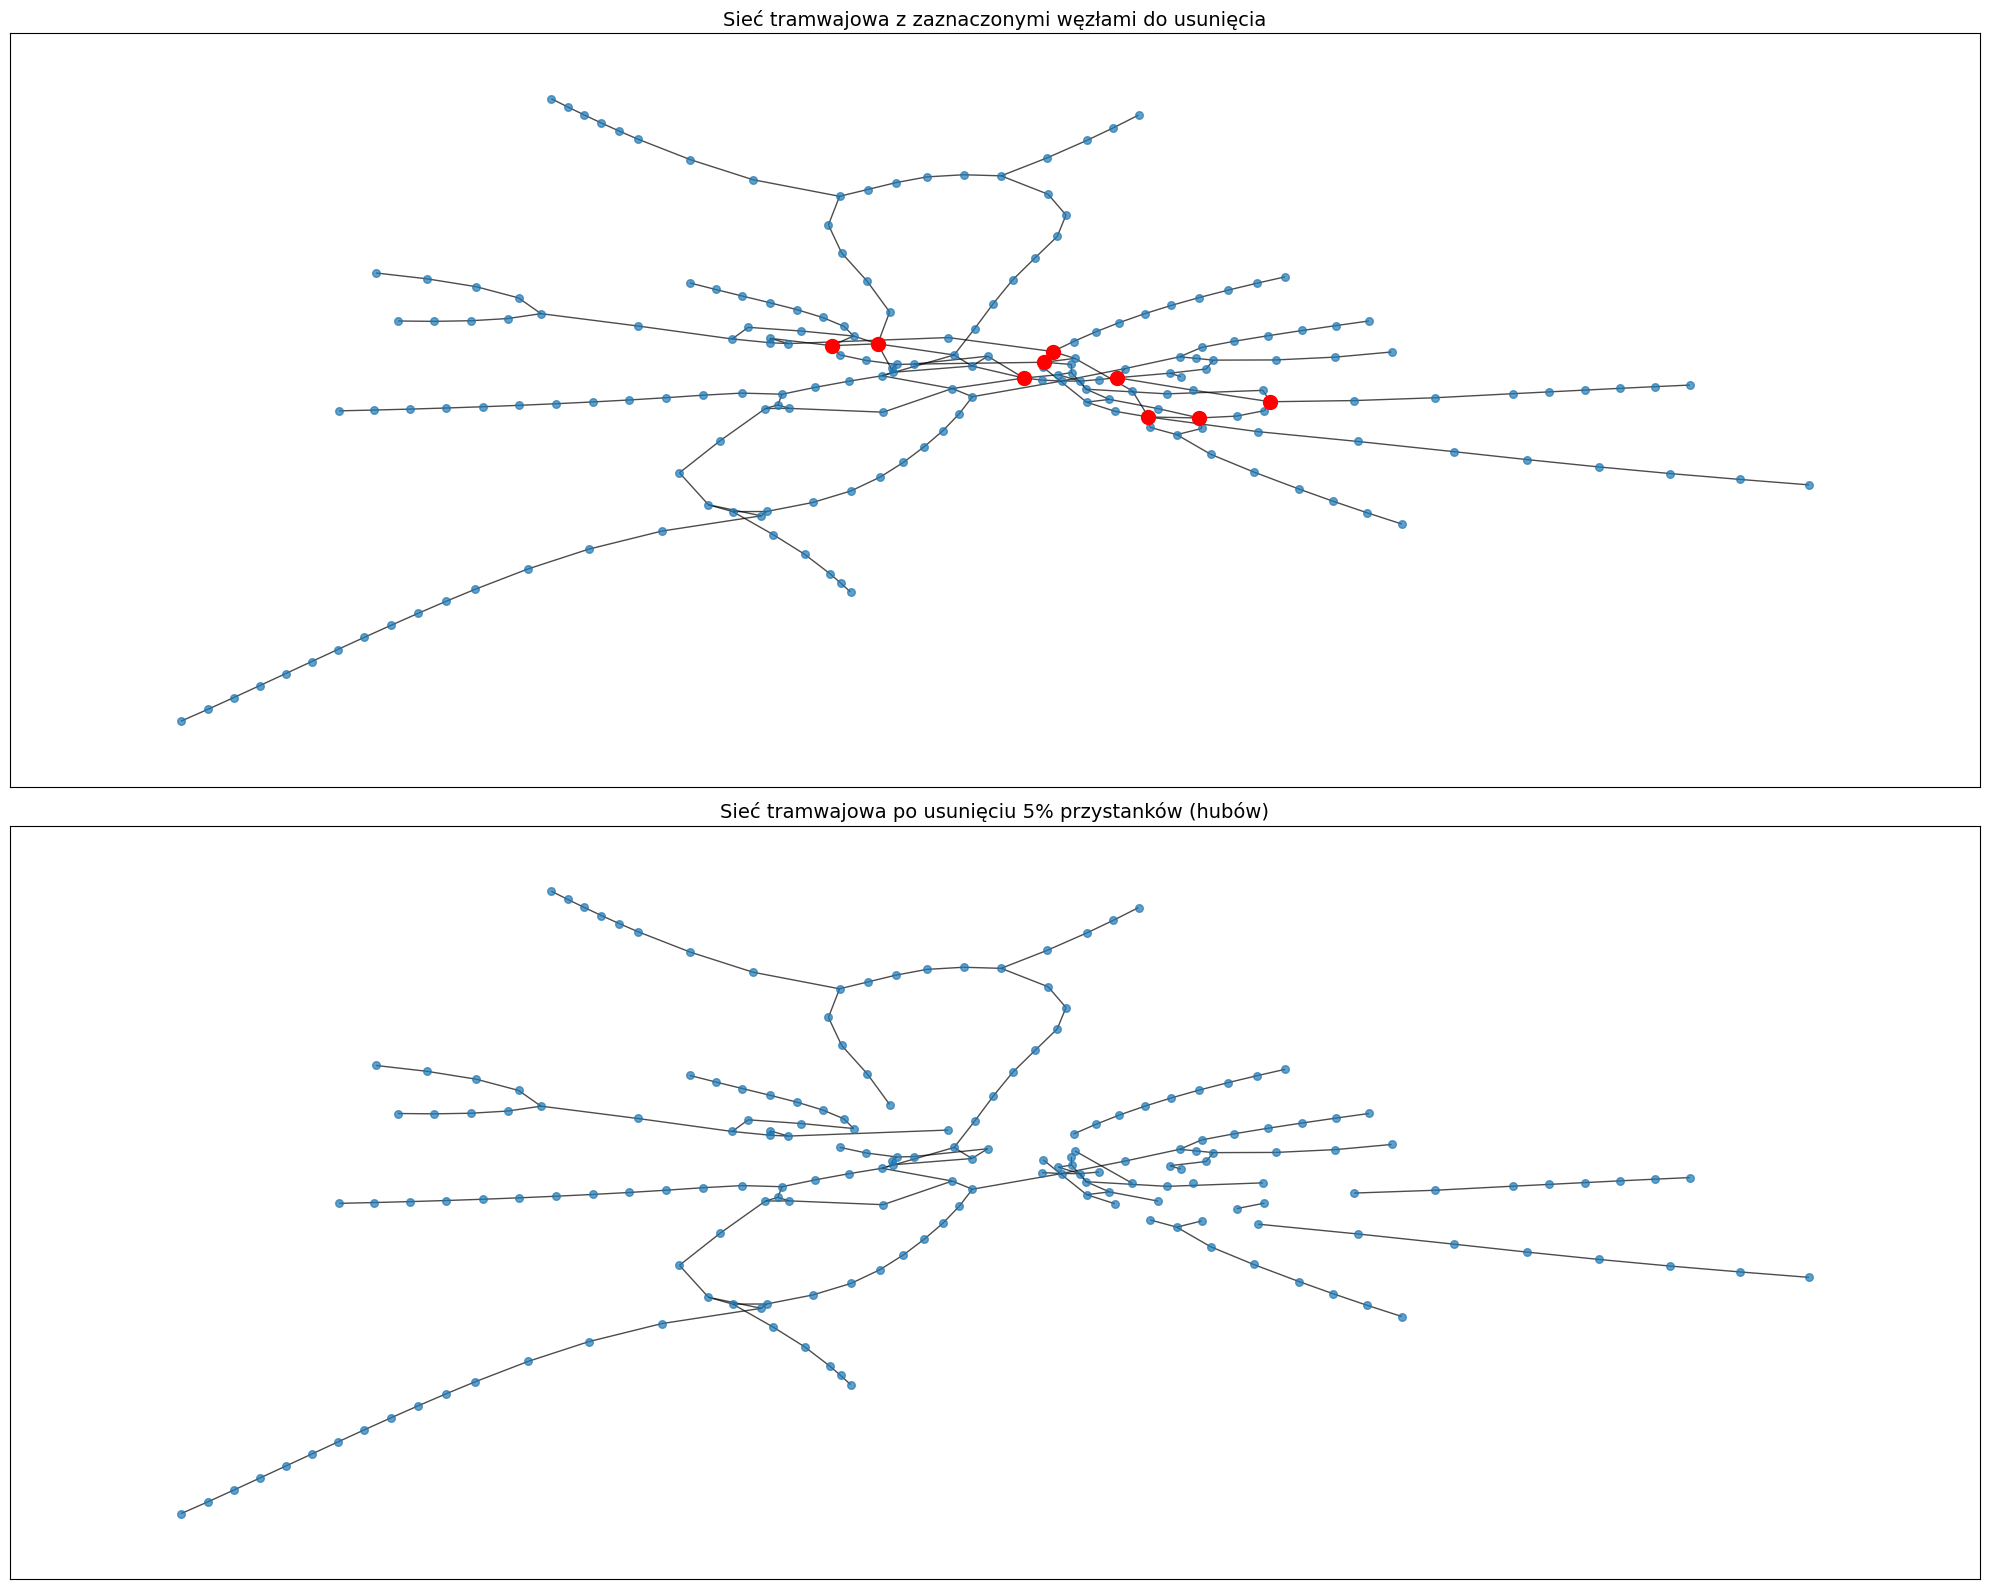

In [ ]:
percent = 5
results = results_by_percentage[percent]
num_to_remove = int(G.number_of_nodes() * percent / 100)
removed_hubs = results['removed_hubs']

print(f"Usunięte huby ({len(removed_hubs)} przystanków, {percent}% sieci):")
for i, hub in enumerate(removed_hubs):
    print(f"{i+1}. {hub}")

plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=30, alpha=0.7)
nx.draw_networkx_nodes(G, pos, nodelist=removed_hubs, node_color='red', node_size=100)
plt.title("Sieć tramwajowa z zaznaczonymi węzłami do usunięcia", fontsize=14)

plt.subplot(2, 1, 2)
G_modified = results['hub_removal']['network']['modified_graph']
nx.draw_networkx(G_modified, pos, with_labels=False, node_size=30, alpha=0.7)
plt.title(f"Sieć tramwajowa po usunięciu {percent}% przystanków (hubów)", fontsize=14)

plt.tight_layout()
plt.show()

Analizuję usunięcie wg centralności 'Stopień'...
Analizuję usunięcie wg centralności 'Pośrednictwo'...
Analizuję usunięcie wg centralności 'Bliskość'...


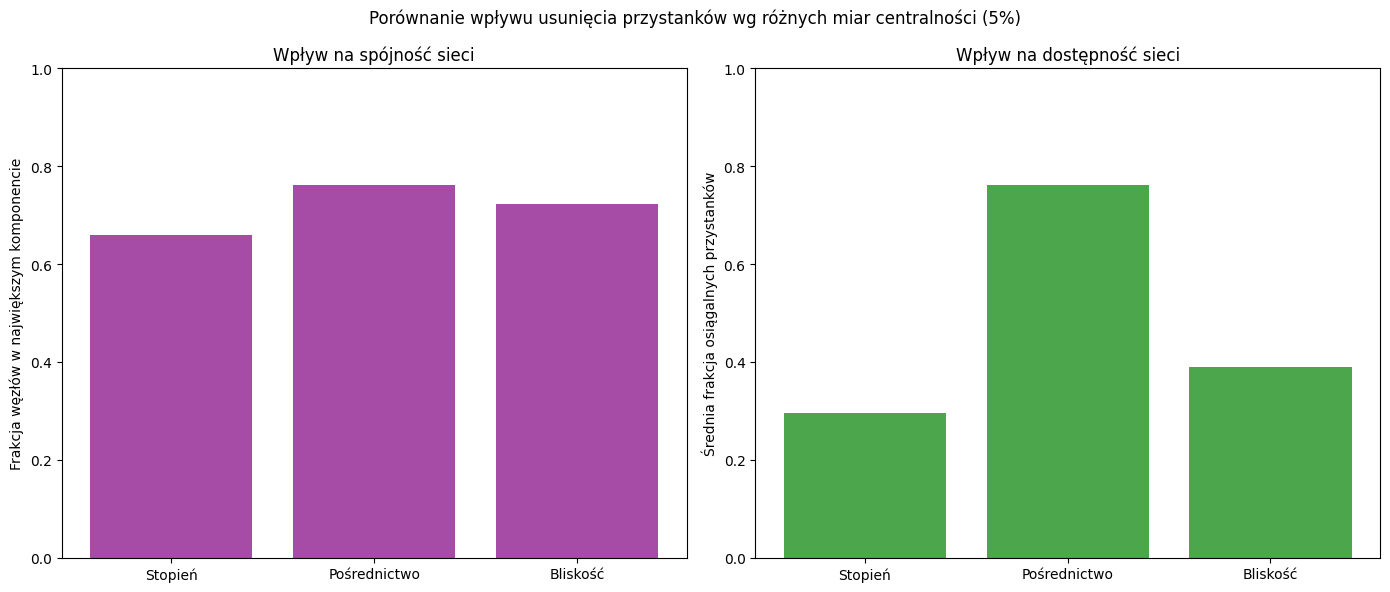

In [ ]:

percent = 5
num_to_remove = int(G.number_of_nodes() * percent / 100)

centrality_measures = {
    'Stopień': degree_centrality,
    'Pośrednictwo': betweenness_centrality,
    'Bliskość': closeness_centrality
}

results_by_centrality = {}

for name, measure in centrality_measures.items():
    print(f"Analizuję usunięcie wg centralności '{name}'...")
    results = compare_hub_vs_random_removal(G, measure, num_to_remove, num_trials=5, start_nodes=start_stops)
    results_by_centrality[name] = results

plt.figure(figsize=(14, 6))

connected_fractions = [results_by_centrality[name]['hub_removal']['network']['fraction_connected'] 
                      for name in centrality_measures.keys()]

plt.subplot(1, 2, 1)
plt.bar(centrality_measures.keys(), connected_fractions, color='purple', alpha=0.7)
plt.ylabel('Frakcja węzłów w największym komponencie')
plt.title('Wpływ na spójność sieci')
plt.ylim(0, 1)

reachable_fractions = []
for name in centrality_measures.keys():
    results = results_by_centrality[name]
    reachable = [r['reachable_fraction'] for r in results['hub_removal']['travel_times']]
    reachable_fractions.append(np.mean(reachable))

plt.subplot(1, 2, 2)
plt.bar(centrality_measures.keys(), reachable_fractions, color='green', alpha=0.7)
plt.ylabel('Średnia frakcja osiągalnych przystanków')
plt.title('Wpływ na dostępność sieci')
plt.ylim(0, 1)

plt.suptitle(f"Porównanie wpływu usunięcia przystanków wg różnych miar centralności ({percent}%)")
plt.tight_layout()
plt.show()

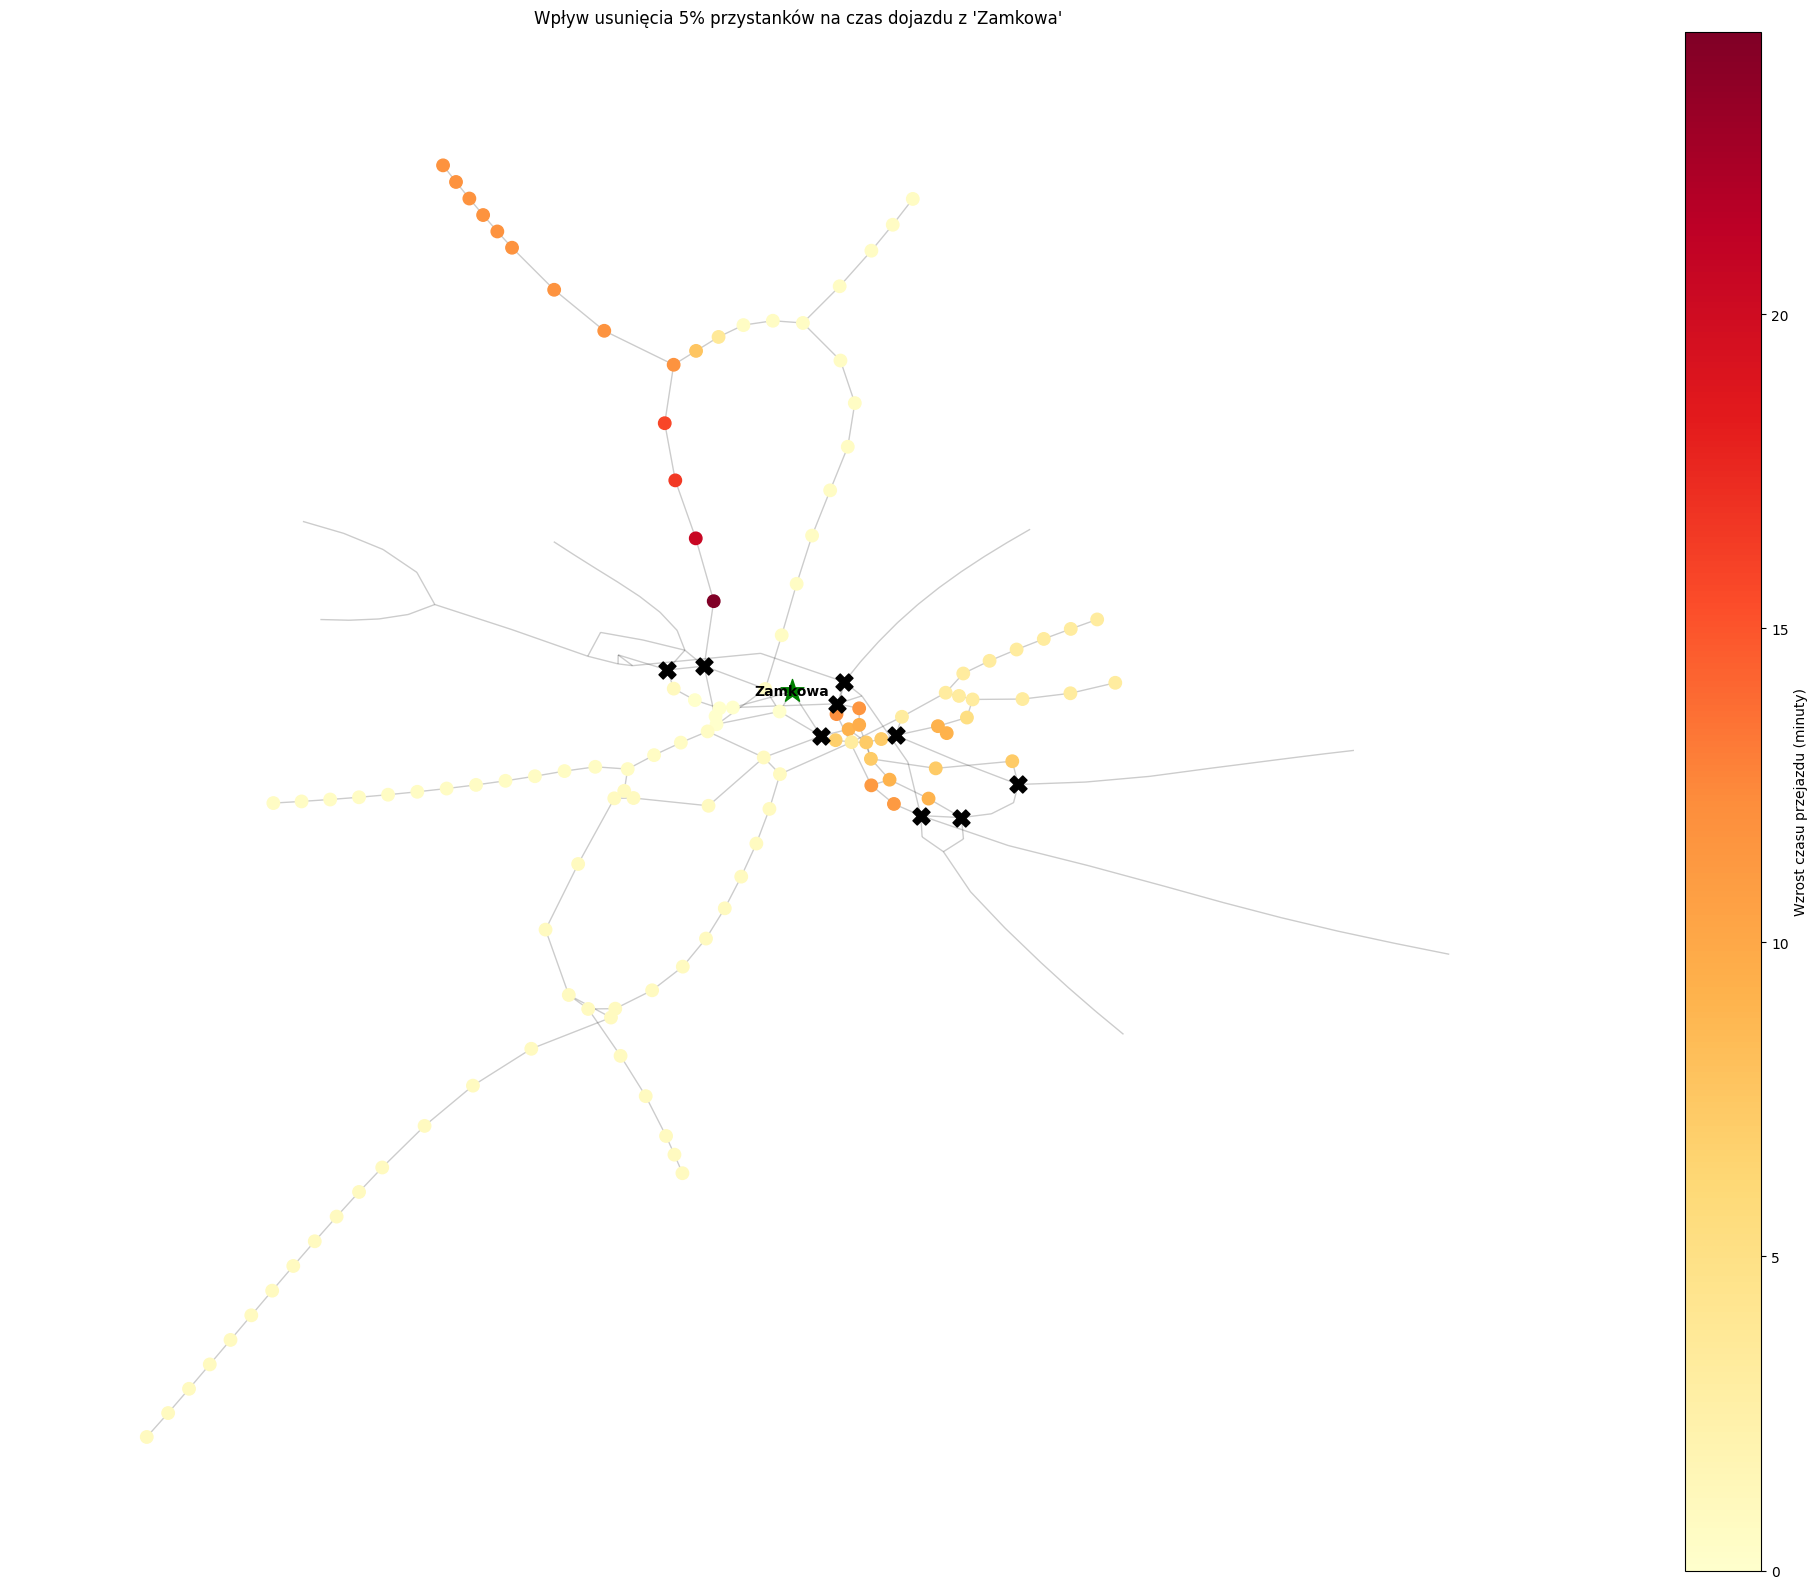

In [ ]:
start_node = "Zamkowa" 

percent = 5
hub_results = results_by_percentage[percent]
removed_hubs = hub_results['removed_hubs']

original_result = simulate_travel_time_after_removal(G, start_node, [])
original_times = original_result['times']

hub_result = simulate_travel_time_after_removal(G, start_node, removed_hubs)
hub_times = hub_result['times']

time_increases = {}
for node in G.nodes():
    if node != start_node:
        orig_time = original_times.get(node, float('inf'))
        hub_time = hub_times.get(node, float('inf'))
        
        if orig_time < float('inf') and hub_time < float('inf'):
            time_increases[node] = hub_time - orig_time
        elif orig_time < float('inf'):
            time_increases[node] = float('inf')  

plt.figure(figsize=(20, 16))
pos = nx.kamada_kawai_layout(G)

nodes_with_increase = [node for node, increase in time_increases.items() if increase < float('inf')]
increases = [time_increases[node] for node in nodes_with_increase]

nx.draw_networkx_edges(G, pos, alpha=0.2)
nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_with_increase, 
                              node_color=increases, 
                              cmap=plt.cm.YlOrRd,
                              node_size=80,
                              vmin=0, vmax=max(increases))

nx.draw_networkx_nodes(G, pos, nodelist=removed_hubs, node_color='black', node_shape='X', node_size=150)

nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_shape='*', node_size=300)

plt.colorbar(nodes, label='Wzrost czasu przejazdu (minuty)')
plt.title(f"Wpływ usunięcia {percent}% przystanków na czas dojazdu z '{start_node}'")

key_stops = [start_node] + list(sorted(time_increases.items(), key=lambda x: x[1], reverse=True))[:5]
labels = {stop: stop for stop in key_stops if stop in pos}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

plt.axis('off')
plt.tight_layout()
plt.show()

# Podsumowanie wyników
Nasza analiza pokazuje, że usunięcie kluczowych przystanków (hubów) ma znacznie większy negatywny wpływ na funkcjonowanie sieci tramwajowej niż losowe usunięcie tej samej liczby przystanków. Usunięcie hubów:

Powoduje większą fragmentację sieci (więcej oddzielnych komponentów)
Znacznie zmniejsza liczbę osiągalnych przystanków
Wydłuża średni czas przejazdu
Sprawia, że niektóre obszary miasta stają się całkowicie niedostępne
Najważniejsze huby w sieci tramwajowej Wrocławia to przystanki centralne i przesiadkowe, takie jak "Arkady (Capitol)", "Pl. Jana Pawła II", "Galeria Dominikańska" i "Pl. Grunwaldzki". Ich rola w sieci jest kluczowa dla utrzymania efektywnej komunikacji miejskiej.

Spośród badanych miar centralności, usunięcie przystanków według centralności pośrednictwa (betweenness) ma największy negatywny wpływ na spójność sieci, co potwierdza, że przystanki znajdujące się na przecięciu wielu linii są najbardziej krytyczne dla funkcjonowania całej sieci tramwajowej.



In [ ]:
percent = 5
results = results_by_percentage[percent]
removed_hubs = results['removed_hubs']

random_removal_data = results['random_removal']

random_trial_index = 0
random_removed_nodes = []
for edge_data in random_removal_data['travel_times'][0]:
    unreachable = set(G.nodes()) - set(edge_data['times'].keys())
    random_removed_nodes = list(unreachable)
    if len(random_removed_nodes) > 0:
        break

strategic_stops = [
    "Biskupin",         
    "Most Grunwaldzki",  
    "Zamkowa", 
    "Dworzec Autobusowy",   
    "Pilczyce",        
    "Leśnica",          
    "Sępolno",          
    "Krzyki",          
    "Klecina",         
    "Kowale"            
]

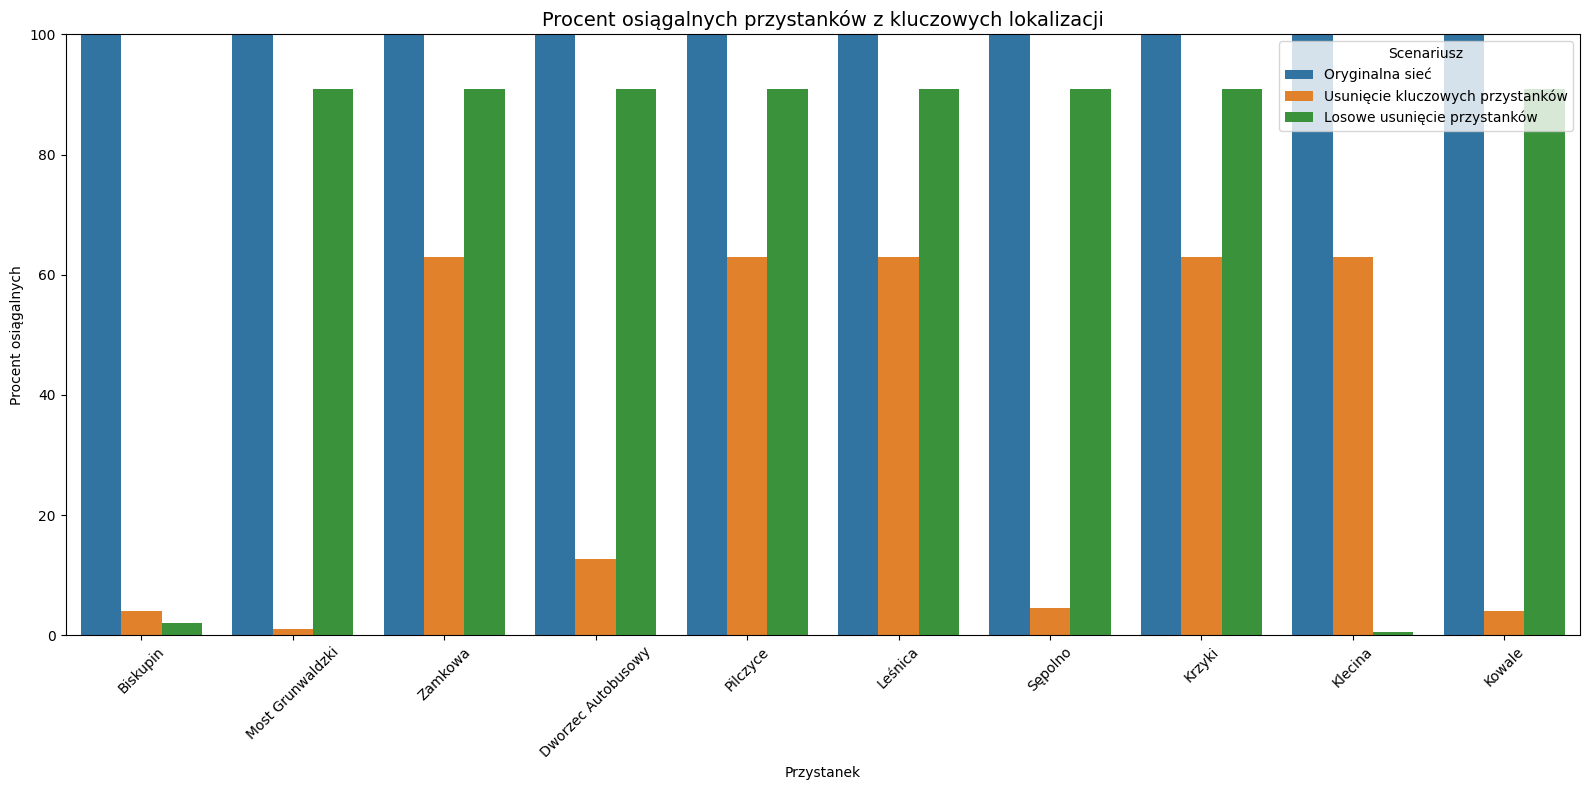

In [ ]:
import pandas as pd
import seaborn as sns

comparison_data = []

for stop in strategic_stops:
    original = simulate_travel_time_after_removal(G, stop, [])
    
    hub_removed = simulate_travel_time_after_removal(G, stop, removed_hubs)
    
    random_removed = simulate_travel_time_after_removal(G, stop, random_removed_nodes)
    
    total_nodes = G.number_of_nodes()
    reachable_original = sum(1 for t in original['times'].values() if t < float('inf'))
    reachable_hub = sum(1 for t in hub_removed['times'].values() if t < float('inf'))
    reachable_random = sum(1 for t in random_removed['times'].values() if t < float('inf'))
    
    comparison_data.append({
        'Przystanek': stop,
        'Scenariusz': 'Oryginalna sieć',
        'Procent osiągalnych': reachable_original / total_nodes * 100,
    })
    
    comparison_data.append({
        'Przystanek': stop,
        'Scenariusz': 'Usunięcie kluczowych przystanków',
        'Procent osiągalnych': reachable_hub / total_nodes * 100,
    })
    
    comparison_data.append({
        'Przystanek': stop,
        'Scenariusz': 'Losowe usunięcie przystanków',
        'Procent osiągalnych': reachable_random / total_nodes * 100,
    })

comparison_df = pd.DataFrame(comparison_data)

plt.figure(figsize=(16, 8))
sns.barplot(x='Przystanek', y='Procent osiągalnych', hue='Scenariusz', data=comparison_df)
plt.title('Procent osiągalnych przystanków z kluczowych lokalizacji', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



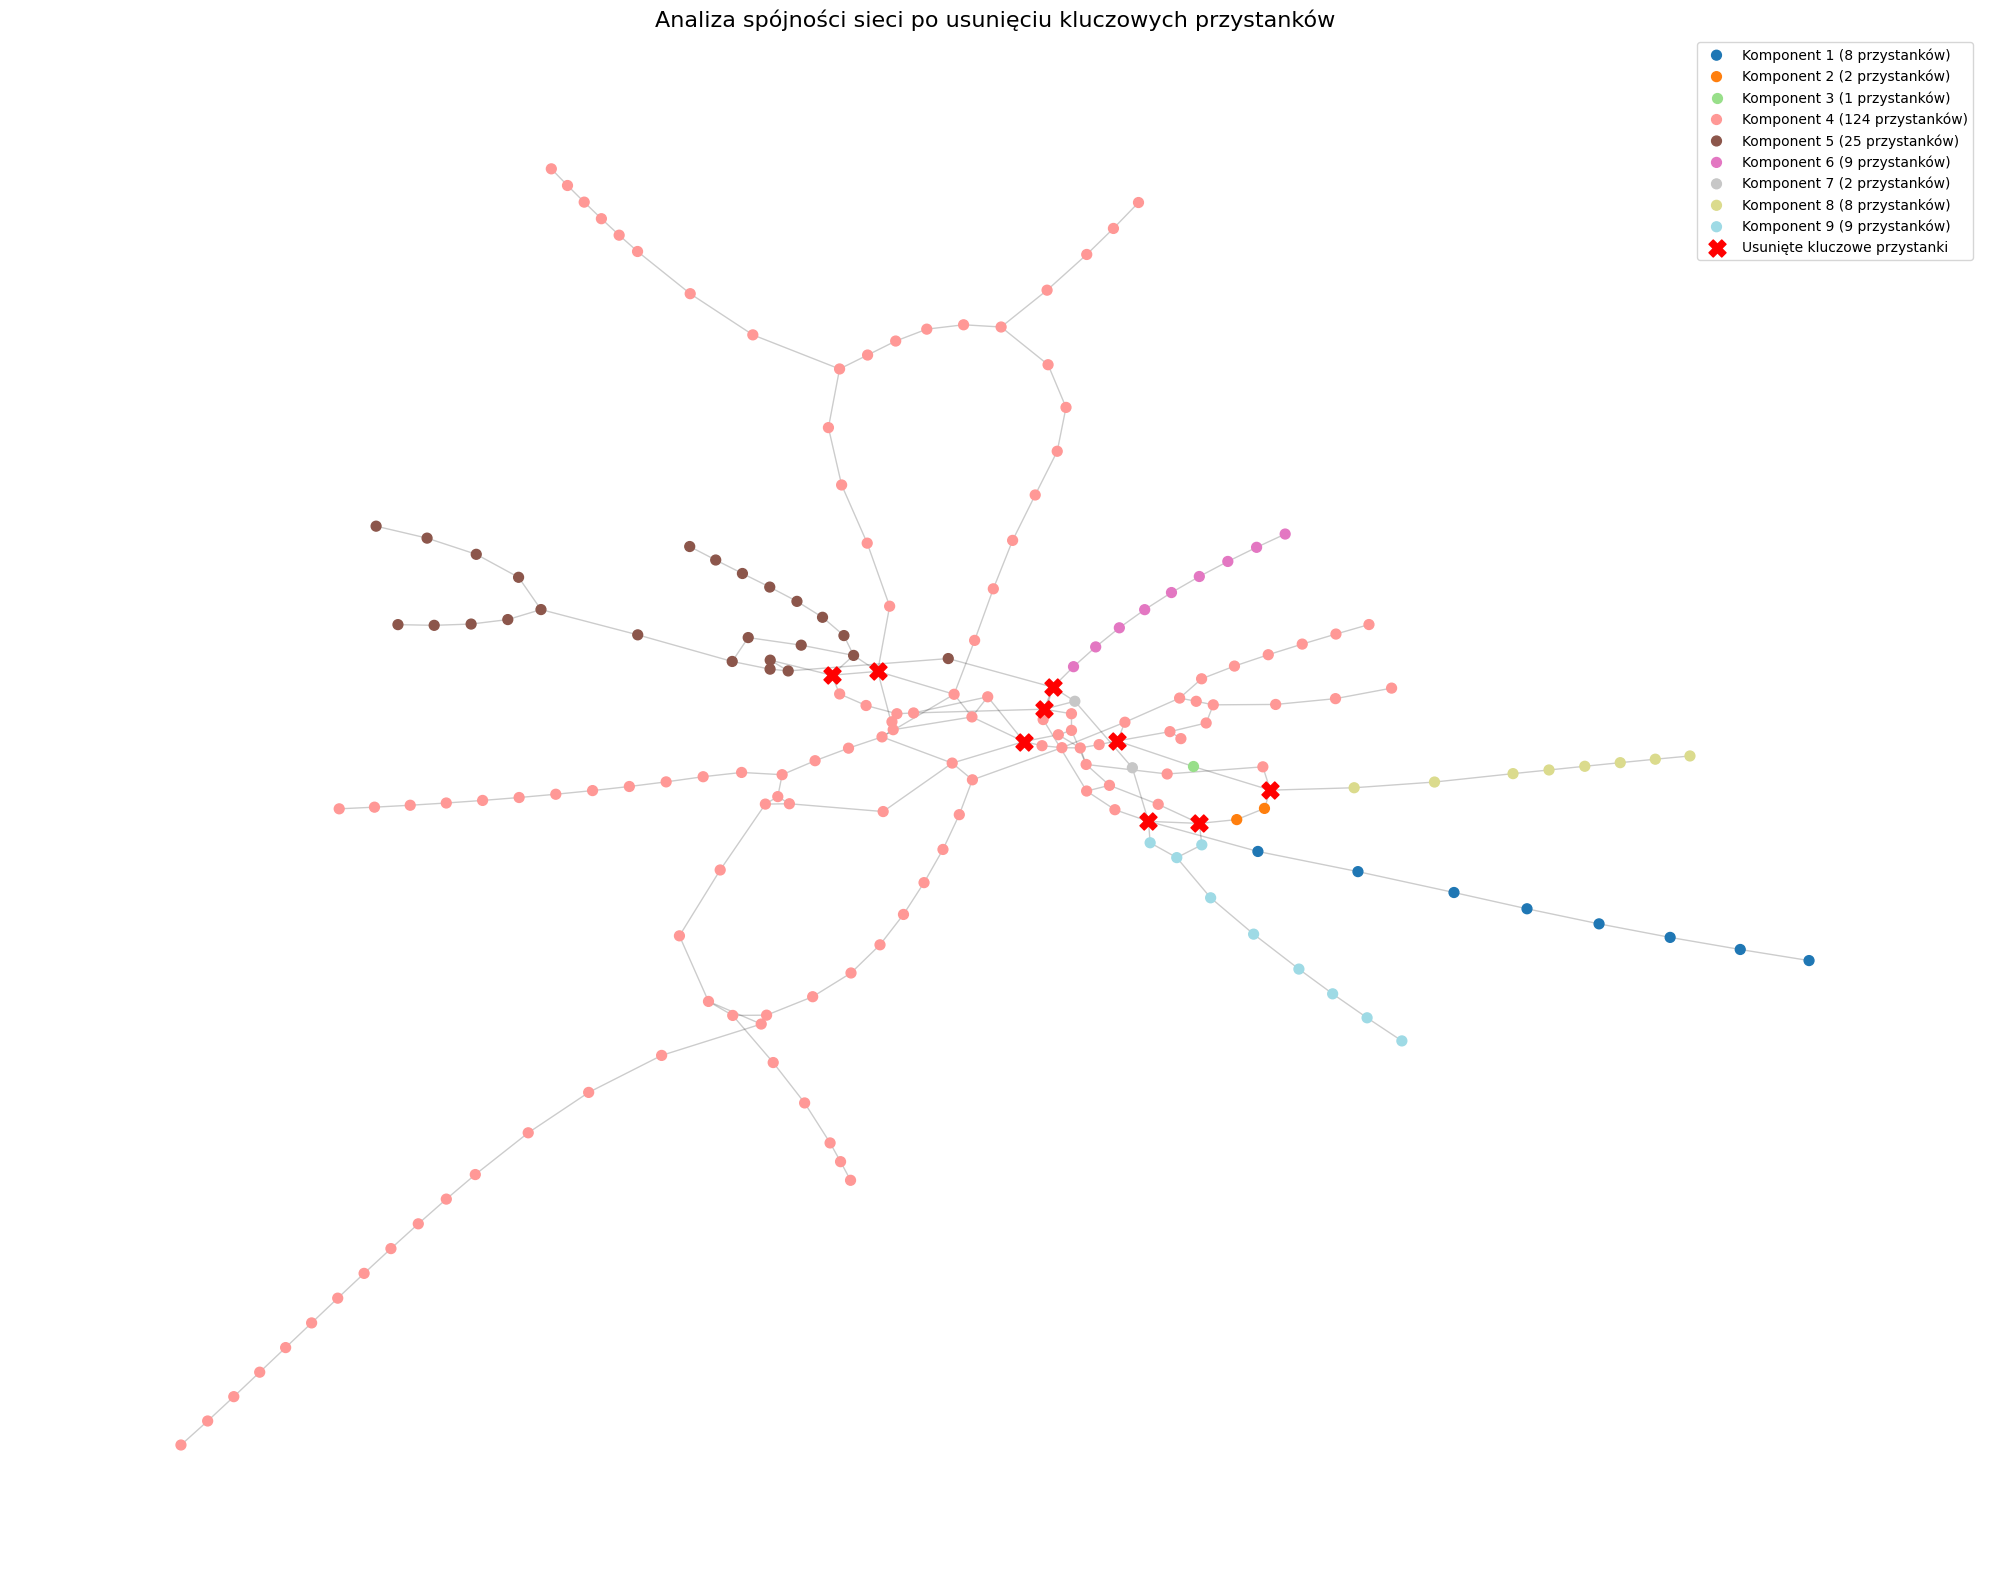

In [ ]:
G_hub_removed = G.copy()
for node in removed_hubs:
    if node in G_hub_removed:
        G_hub_removed.remove_node(node)

hub_components = list(nx.connected_components(G_hub_removed))

G_random_removed = G.copy()
for node in random_removed_nodes:
    if node in G_random_removed:
        G_random_removed.remove_node(node)

random_components = list(nx.connected_components(G_random_removed))

plt.figure(figsize=(20, 16))

pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.2)

colors = plt.cm.tab20(np.linspace(0, 1, len(hub_components)))
for i, component in enumerate(hub_components):
    nx.draw_networkx_nodes(G_hub_removed, pos, nodelist=list(component), 
                           node_color=[colors[i]] * len(component), 
                           node_size=50, label=f"Komponent {i+1} ({len(component)} przystanków)")

nx.draw_networkx_nodes(G, pos, nodelist=removed_hubs, node_color='red', 
                       node_shape='X', node_size=150, label="Usunięte kluczowe przystanki")

plt.title("Analiza spójności sieci po usunięciu kluczowych przystanków", fontsize=16)
plt.legend(loc="upper right", fontsize=10)
plt.axis("off")
plt.tight_layout()
plt.show()

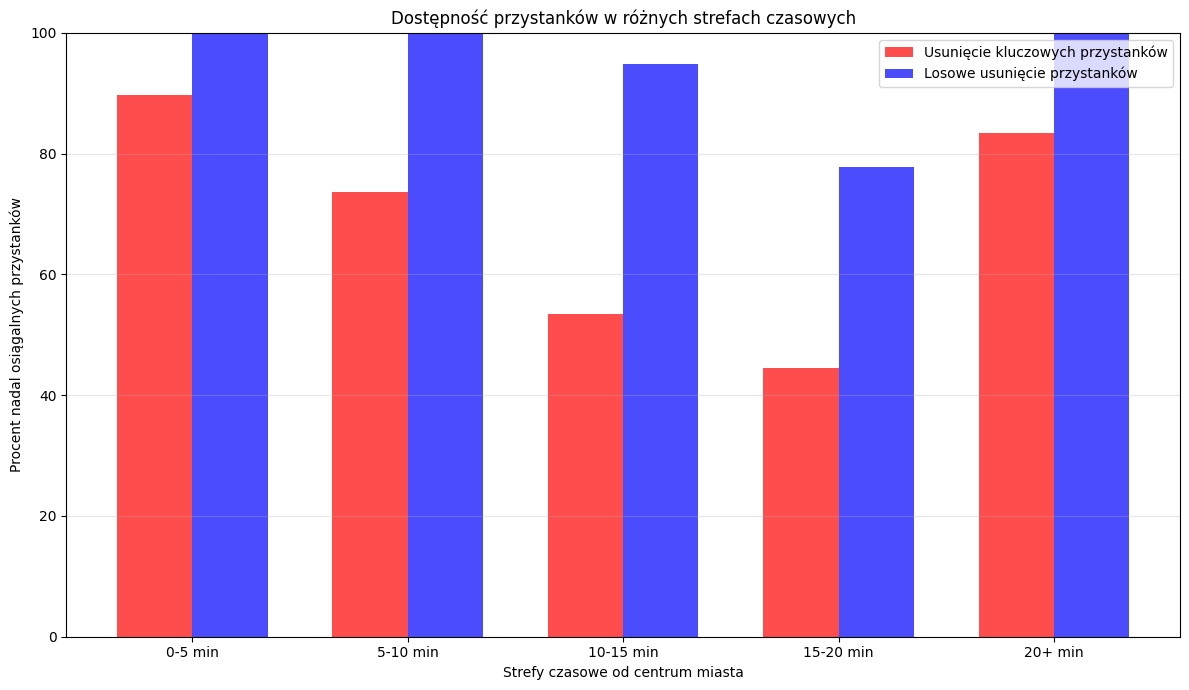

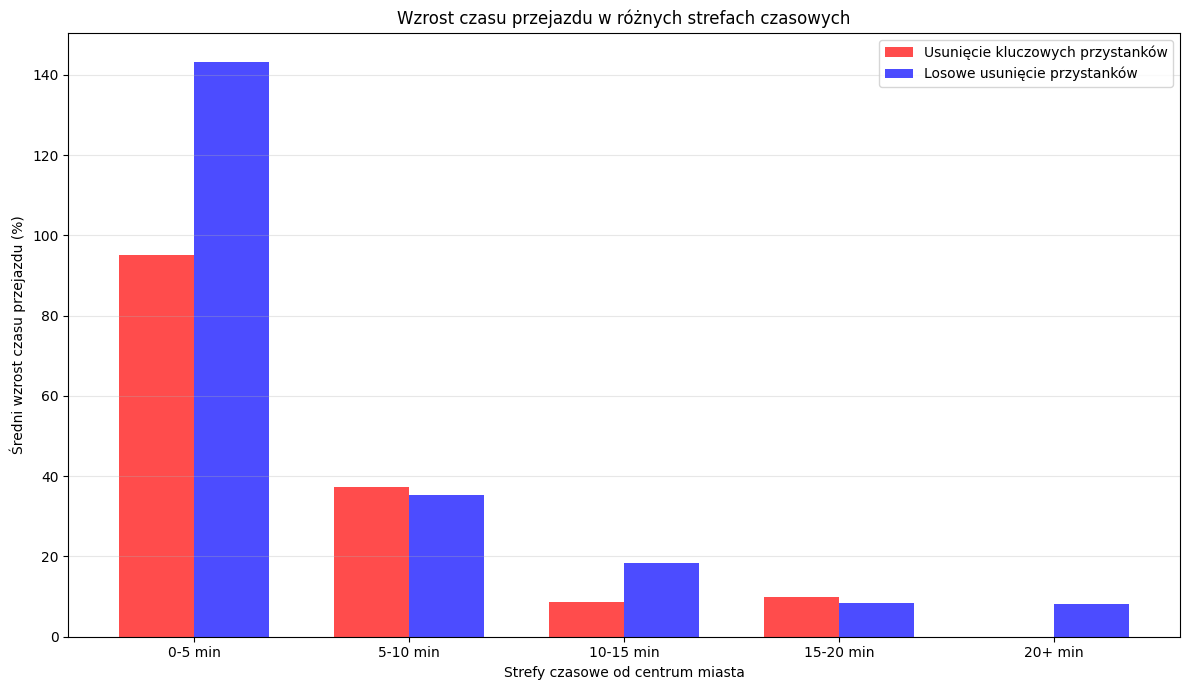

In [ ]:
travel_time_changes = []

reference_stop = "Rynek"  

if reference_stop in removed_hubs:
    alternative_stops = ["Galeria Dominikańska", "Pl. Jana Pawła II", "Dworzec Główny"]
    for alt in alternative_stops:
        if alt not in removed_hubs:
            reference_stop = alt
            break

original_times = simulate_travel_time_after_removal(G, reference_stop, [])['times']

hub_times = simulate_travel_time_after_removal(G, reference_stop, removed_hubs)['times'] 

random_times = simulate_travel_time_after_removal(G, reference_stop, random_removed_nodes)['times']

for stop in G.nodes():
    if stop != reference_stop and stop not in removed_hubs and stop not in random_removed_nodes:
        orig_time = original_times.get(stop, float('inf'))
        hub_time = hub_times.get(stop, float('inf'))
        random_time = random_times.get(stop, float('inf'))
        
        if orig_time < float('inf'):
            hub_increase = ((hub_time - orig_time) / orig_time * 100) if hub_time < float('inf') else float('inf')
            random_increase = ((random_time - orig_time) / orig_time * 100) if random_time < float('inf') else float('inf')
           
            hub_reachable = hub_time < float('inf')
            random_reachable = random_time < float('inf')
            
            travel_time_changes.append({
                'Przystanek': stop,
                'Oryginalny czas (min)': orig_time,
                'Wzrost po usunięciu kluczowych (%)': hub_increase,
                'Wzrost po losowym usunięciu (%)': random_increase,
                'Nadal osiągalny (kluczowe)': hub_reachable,
                'Nadal osiągalny (losowe)': random_reachable
            })

travel_time_changes.sort(key=lambda x: x['Oryginalny czas (min)'])

changes_df = pd.DataFrame(travel_time_changes)

reachable_data = []
for zone, stops in [
    ('0-5 min', changes_df[changes_df['Oryginalny czas (min)'] <= 5]),
    ('5-10 min', changes_df[(changes_df['Oryginalny czas (min)'] > 5) & (changes_df['Oryginalny czas (min)'] <= 10)]),
    ('10-15 min', changes_df[(changes_df['Oryginalny czas (min)'] > 10) & (changes_df['Oryginalny czas (min)'] <= 15)]),
    ('15-20 min', changes_df[(changes_df['Oryginalny czas (min)'] > 15) & (changes_df['Oryginalny czas (min)'] <= 20)]),
    ('20+ min', changes_df[changes_df['Oryginalny czas (min)'] > 20])
]:
    if not stops.empty:
        reachable_data.append({
            'Strefa czasowa': zone,
            'Usunięcie kluczowych przystanków': stops['Nadal osiągalny (kluczowe)'].mean() * 100,
            'Losowe usunięcie przystanków': stops['Nadal osiągalny (losowe)'].mean() * 100
        })

reachable_df = pd.DataFrame(reachable_data)

plt.figure(figsize=(12, 7))
bar_width = 0.35
x = np.arange(len(reachable_df['Strefa czasowa']))

plt.bar(x - bar_width/2, reachable_df['Usunięcie kluczowych przystanków'], 
        width=bar_width, color='red', alpha=0.7, label='Usunięcie kluczowych przystanków')
plt.bar(x + bar_width/2, reachable_df['Losowe usunięcie przystanków'], 
        width=bar_width, color='blue', alpha=0.7, label='Losowe usunięcie przystanków')

plt.xlabel('Strefy czasowe od centrum miasta')
plt.ylabel('Procent nadal osiągalnych przystanków')
plt.title('Dostępność przystanków w różnych strefach czasowych')
plt.xticks(x, reachable_df['Strefa czasowa'])
plt.legend()
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

increase_data = []
for zone, stops in [
    ('0-5 min', changes_df[changes_df['Oryginalny czas (min)'] <= 5]),
    ('5-10 min', changes_df[(changes_df['Oryginalny czas (min)'] > 5) & (changes_df['Oryginalny czas (min)'] <= 10)]),
    ('10-15 min', changes_df[(changes_df['Oryginalny czas (min)'] > 10) & (changes_df['Oryginalny czas (min)'] <= 15)]),
    ('15-20 min', changes_df[(changes_df['Oryginalny czas (min)'] > 15) & (changes_df['Oryginalny czas (min)'] <= 20)]),
    ('20+ min', changes_df[changes_df['Oryginalny czas (min)'] > 20])
]:
    if not stops.empty:
        hub_increases = [x for x in stops['Wzrost po usunięciu kluczowych (%)'] if x != float('inf')]
        random_increases = [x for x in stops['Wzrost po losowym usunięciu (%)'] if x != float('inf')]
        
        increase_data.append({
            'Strefa czasowa': zone,
            'Usunięcie kluczowych przystanków': np.mean(hub_increases) if hub_increases else 0,
            'Losowe usunięcie przystanków': np.mean(random_increases) if random_increases else 0
        })

increase_df = pd.DataFrame(increase_data)

plt.figure(figsize=(12, 7))
x = np.arange(len(increase_df['Strefa czasowa']))

plt.bar(x - bar_width/2, increase_df['Usunięcie kluczowych przystanków'], 
        width=bar_width, color='red', alpha=0.7, label='Usunięcie kluczowych przystanków')
plt.bar(x + bar_width/2, increase_df['Losowe usunięcie przystanków'], 
        width=bar_width, color='blue', alpha=0.7, label='Losowe usunięcie przystanków')

plt.xlabel('Strefy czasowe od centrum miasta')
plt.ylabel('Średni wzrost czasu przejazdu (%)')
plt.title('Wzrost czasu przejazdu w różnych strefach czasowych')
plt.xticks(x, increase_df['Strefa czasowa'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Przeprowadzona analiza ujawnia istotne różnice między losowym a strategicznym usunięciem przystanków tramwajowych we Wrocławiu:

Izolacja obszarów: Usunięcie kluczowych przystanków powoduje fragmentację sieci na mniejsze, odizolowane komponenty, podczas gdy losowe usunięcie rzadko prowadzi do takiego efektu.

Strefy miejskie: Centrum miasta pozostaje stosunkowo dobrze skomunikowane nawet po losowym usunięciu przystanków, ale cierpi znacznie bardziej po usunięciu kluczowych węzłów.

Peryferia: Obszary peryferyjne (np. Leśnica, Kowale, Klecina) są najbardziej dotknięte usunięciem kluczowych przystanków, stając się często całkowicie odcięte od reszty sieci.

Odporność sieci: Analiza pokazuje, że sieć tramwajowa Wrocławia jest stosunkowo odporna na losowe uszkodzenia, ale bardzo wrażliwa na celowe ataki na kluczowe węzły.

Te wyniki podkreślają znaczenie redundancji w planowaniu sieci transportowej oraz potrzeby zabezpieczenia kluczowych węzłów przesiadkowych.



# Kluczowe przystanki tramwajowe Wrocławia i ich wpływ na sieć

## Najważniejsze węzły w sieci tramwajowej

- **Główne huby przesiadkowe**: Arkady (Capitol), Pl. Jana Pawła II, Galeria Dominikańska, Pl. Grunwaldzki
- **Miary centralności**: Przystanki kluczowe wykazują wysoką centralność stopnia (liczba połączeń), pośrednictwa (występowanie na najkrótszych ścieżkach) i bliskości (odległość do innych węzłów)
- **Rozkład**: Kluczowe węzły koncentrują się w centrum miasta, tworząc rdzeń sieci połączeń

## Wpływ usunięcia przystanków na strukturę sieci

### Usunięcie kluczowych przystanków vs. losowe usunięcie

| Aspekt | Usunięcie kluczowych węzłów | Losowe usunięcie |
|--------|------------------------------|------------------|
| **Fragmentacja sieci** | Wysoka (powstaje więcej izolowanych komponentów) | Niska (sieć pozostaje głównie spójna) |
| **Spójność sieci** | Znacząco obniżona | Minimalnie obniżona |
| **Dostępność przystanków** | Drastycznie zmniejszona | Nieznacznie zmniejszona |
| **Czas przejazdu** | Znacznie wydłużony | Nieznacznie wydłużony |

## Przestrzenne różnice w odporności sieci

- **Peryferia miasta** (Leśnica, Kowale, Klecina): najbardziej narażone na odcięcie przy usunięciu kluczowych przystanków
- **Centrum miasta**: względnie odporne, ale odczuwa zwiększenie czasu przejazdu
- **Obszary mieszkalne**: zróżnicowany wpływ zależny od połączenia z kluczowymi węzłami

## Dostępność w strefach czasowych od centrum

- **Bliskie centrum** (0-5 min): najmniejszy spadek osiągalności przystanków
- **Średnio oddalone** (5-15 min): umiarkowany spadek osiągalności
- **Odległe obszary** (15+ min): największy spadek osiągalności, potencjalne całkowite odcięcie

## Wnioski dla planowania transportu miejskiego

1. **Odporność sieci**: Sieć tramwajowa Wrocławia wykazuje cechy sieci odpornej na losowe awarie, ale wrażliwej na celowe uszkodzenia kluczowych węzłów
2. **Redundancja połączeń**: Warto zwiększyć alternatywne połączenia dla kluczowych węzłów
3. **Zabezpieczenie kluczowych przystanków**: Szczególna dbałość o infrastrukturę najbardziej centralnych węzłów
4. **Równomierny rozwój**: Rozbudowa sieci powinna dążyć do bardziej równomiernego rozłożenia centralności węzłów

## Przyszłe kierunki rozwoju sieci

- Wprowadzenie dodatkowych połączeń pomiędzy peryferyjnymi częściami miasta
- Tworzenie alternatywnych tras dla najbardziej obciążonych linii
- Rozważenie nowych węzłów przesiadkowych poza ścisłym centrum